# The Sparks Foundation
### October 2022 batch
### Computer Vision and IoT Internship
### Task5: Implement Real Time Traffic Sign Recognition (Level - Intermediate)
### Intern Name: Emad Addeen Adeeb

####

#### Importing Dependencies

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [4]:
import os

#### let's go to our workshop directory

In [5]:
os.chdir("C:/Users/Adeeb/Documents/The Sparks Foundation Tasks/task5/data/")

cur_path = os.getcwd()

In [6]:
cur_path

'C:\\Users\\Adeeb\\Documents\\The Sparks Foundation Tasks\\task5\\data'

#### Image Processing 

In [7]:
data = []
labels = []
# We have 43 Classes
classes = 43

In [10]:
for i in range(classes):
    path = os.path.join(cur_path,'Train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            print(a,"done")
            image = image.resize((30,30))
            print(a,"done_resizing")
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except Exception as e:
            print(e)

00000_00000_00000.png done
00000_00000_00000.png done_resizing
00000_00000_00001.png done
00000_00000_00001.png done_resizing
00000_00000_00002.png done
00000_00000_00002.png done_resizing
00000_00000_00003.png done
00000_00000_00003.png done_resizing
00000_00000_00004.png done
00000_00000_00004.png done_resizing
00000_00000_00005.png done
00000_00000_00005.png done_resizing
00000_00000_00006.png done
00000_00000_00006.png done_resizing
00000_00000_00007.png done
00000_00000_00007.png done_resizing
00000_00000_00008.png done
00000_00000_00008.png done_resizing
00000_00000_00009.png done
00000_00000_00009.png done_resizing
00000_00000_00010.png done
00000_00000_00010.png done_resizing
00000_00000_00011.png done
00000_00000_00011.png done_resizing
00000_00000_00012.png done
00000_00000_00012.png done_resizing
00000_00000_00013.png done
00000_00000_00013.png done_resizing
00000_00000_00014.png done
00000_00000_00014.png done_resizing
00000_00000_00015.png done
00000_00000_00015.png done_r

00000_00005_00026.png done_resizing
00000_00005_00027.png done
00000_00005_00027.png done_resizing
00000_00005_00028.png done
00000_00005_00028.png done_resizing
00000_00005_00029.png done
00000_00005_00029.png done_resizing
00000_00006_00000.png done
00000_00006_00000.png done_resizing
00000_00006_00001.png done
00000_00006_00001.png done_resizing
00000_00006_00002.png done
00000_00006_00002.png done_resizing
00000_00006_00003.png done
00000_00006_00003.png done_resizing
00000_00006_00004.png done
00000_00006_00004.png done_resizing
00000_00006_00005.png done
00000_00006_00005.png done_resizing
00000_00006_00006.png done
00000_00006_00006.png done_resizing
00000_00006_00007.png done
00000_00006_00007.png done_resizing
00000_00006_00008.png done
00000_00006_00008.png done_resizing
00000_00006_00009.png done
00000_00006_00009.png done_resizing
00000_00006_00010.png done
00000_00006_00010.png done_resizing
00000_00006_00011.png done
00000_00006_00011.png done_resizing
00000_00006_00012.p

00001_00004_00014.png done
00001_00004_00014.png done_resizing
00001_00004_00015.png done
00001_00004_00015.png done_resizing
00001_00004_00016.png done
00001_00004_00016.png done_resizing
00001_00004_00017.png done
00001_00004_00017.png done_resizing
00001_00004_00018.png done
00001_00004_00018.png done_resizing
00001_00004_00019.png done
00001_00004_00019.png done_resizing
00001_00004_00020.png done
00001_00004_00020.png done_resizing
00001_00004_00021.png done
00001_00004_00021.png done_resizing
00001_00004_00022.png done
00001_00004_00022.png done_resizing
00001_00004_00023.png done
00001_00004_00023.png done_resizing
00001_00004_00024.png done
00001_00004_00024.png done_resizing
00001_00004_00025.png done
00001_00004_00025.png done_resizing
00001_00004_00026.png done
00001_00004_00026.png done_resizing
00001_00004_00027.png done
00001_00004_00027.png done_resizing
00001_00004_00028.png done
00001_00004_00028.png done_resizing
00001_00004_00029.png done
00001_00004_00029.png done_r

00001_00010_00019.png done_resizing
00001_00010_00020.png done
00001_00010_00020.png done_resizing
00001_00010_00021.png done
00001_00010_00021.png done_resizing
00001_00010_00022.png done
00001_00010_00022.png done_resizing
00001_00010_00023.png done
00001_00010_00023.png done_resizing
00001_00010_00024.png done
00001_00010_00024.png done_resizing
00001_00010_00025.png done
00001_00010_00025.png done_resizing
00001_00010_00026.png done
00001_00010_00026.png done_resizing
00001_00010_00027.png done
00001_00010_00027.png done_resizing
00001_00010_00028.png done
00001_00010_00028.png done_resizing
00001_00010_00029.png done
00001_00010_00029.png done_resizing
00001_00011_00000.png done
00001_00011_00000.png done_resizing
00001_00011_00001.png done
00001_00011_00001.png done_resizing
00001_00011_00002.png done
00001_00011_00002.png done_resizing
00001_00011_00003.png done
00001_00011_00003.png done_resizing
00001_00011_00004.png done
00001_00011_00004.png done_resizing
00001_00011_00005.p

00001_00016_00015.png done
00001_00016_00015.png done_resizing
00001_00016_00016.png done
00001_00016_00016.png done_resizing
00001_00016_00017.png done
00001_00016_00017.png done_resizing
00001_00016_00018.png done
00001_00016_00018.png done_resizing
00001_00016_00019.png done
00001_00016_00019.png done_resizing
00001_00016_00020.png done
00001_00016_00020.png done_resizing
00001_00016_00021.png done
00001_00016_00021.png done_resizing
00001_00016_00022.png done
00001_00016_00022.png done_resizing
00001_00016_00023.png done
00001_00016_00023.png done_resizing
00001_00016_00024.png done
00001_00016_00024.png done_resizing
00001_00016_00025.png done
00001_00016_00025.png done_resizing
00001_00016_00026.png done
00001_00016_00026.png done_resizing
00001_00016_00027.png done
00001_00016_00027.png done_resizing
00001_00016_00028.png done
00001_00016_00028.png done_resizing
00001_00016_00029.png done
00001_00016_00029.png done_resizing
00001_00017_00000.png done
00001_00017_00000.png done_r

00001_00022_00008.png done
00001_00022_00008.png done_resizing
00001_00022_00009.png done
00001_00022_00009.png done_resizing
00001_00022_00010.png done
00001_00022_00010.png done_resizing
00001_00022_00011.png done
00001_00022_00011.png done_resizing
00001_00022_00012.png done
00001_00022_00012.png done_resizing
00001_00022_00013.png done
00001_00022_00013.png done_resizing
00001_00022_00014.png done
00001_00022_00014.png done_resizing
00001_00022_00015.png done
00001_00022_00015.png done_resizing
00001_00022_00016.png done
00001_00022_00016.png done_resizing
00001_00022_00017.png done
00001_00022_00017.png done_resizing
00001_00022_00018.png done
00001_00022_00018.png done_resizing
00001_00022_00019.png done
00001_00022_00019.png done_resizing
00001_00022_00020.png done
00001_00022_00020.png done_resizing
00001_00022_00021.png done
00001_00022_00021.png done_resizing
00001_00022_00022.png done
00001_00022_00022.png done_resizing
00001_00022_00023.png done
00001_00022_00023.png done_r

00001_00027_00024.png done
00001_00027_00024.png done_resizing
00001_00027_00025.png done
00001_00027_00025.png done_resizing
00001_00027_00026.png done
00001_00027_00026.png done_resizing
00001_00027_00027.png done
00001_00027_00027.png done_resizing
00001_00027_00028.png done
00001_00027_00028.png done_resizing
00001_00027_00029.png done
00001_00027_00029.png done_resizing
00001_00028_00000.png done
00001_00028_00000.png done_resizing
00001_00028_00001.png done
00001_00028_00001.png done_resizing
00001_00028_00002.png done
00001_00028_00002.png done_resizing
00001_00028_00003.png done
00001_00028_00003.png done_resizing
00001_00028_00004.png done
00001_00028_00004.png done_resizing
00001_00028_00005.png done
00001_00028_00005.png done_resizing
00001_00028_00006.png done
00001_00028_00006.png done_resizing
00001_00028_00007.png done
00001_00028_00007.png done_resizing
00001_00028_00008.png done
00001_00028_00008.png done_resizing
00001_00028_00009.png done
00001_00028_00009.png done_r

00001_00033_00026.png done_resizing
00001_00033_00027.png done
00001_00033_00027.png done_resizing
00001_00033_00028.png done
00001_00033_00028.png done_resizing
00001_00033_00029.png done
00001_00033_00029.png done_resizing
00001_00034_00000.png done
00001_00034_00000.png done_resizing
00001_00034_00001.png done
00001_00034_00001.png done_resizing
00001_00034_00002.png done
00001_00034_00002.png done_resizing
00001_00034_00003.png done
00001_00034_00003.png done_resizing
00001_00034_00004.png done
00001_00034_00004.png done_resizing
00001_00034_00005.png done
00001_00034_00005.png done_resizing
00001_00034_00006.png done
00001_00034_00006.png done_resizing
00001_00034_00007.png done
00001_00034_00007.png done_resizing
00001_00034_00008.png done
00001_00034_00008.png done_resizing
00001_00034_00009.png done
00001_00034_00009.png done_resizing
00001_00034_00010.png done
00001_00034_00010.png done_resizing
00001_00034_00011.png done
00001_00034_00011.png done_resizing
00001_00034_00012.p

00001_00040_00009.png done_resizing
00001_00040_00010.png done
00001_00040_00010.png done_resizing
00001_00040_00011.png done
00001_00040_00011.png done_resizing
00001_00040_00012.png done
00001_00040_00012.png done_resizing
00001_00040_00013.png done
00001_00040_00013.png done_resizing
00001_00040_00014.png done
00001_00040_00014.png done_resizing
00001_00040_00015.png done
00001_00040_00015.png done_resizing
00001_00040_00016.png done
00001_00040_00016.png done_resizing
00001_00040_00017.png done
00001_00040_00017.png done_resizing
00001_00040_00018.png done
00001_00040_00018.png done_resizing
00001_00040_00019.png done
00001_00040_00019.png done_resizing
00001_00040_00020.png done
00001_00040_00020.png done_resizing
00001_00040_00021.png done
00001_00040_00021.png done_resizing
00001_00040_00022.png done
00001_00040_00022.png done_resizing
00001_00040_00023.png done
00001_00040_00023.png done_resizing
00001_00040_00024.png done
00001_00040_00024.png done_resizing
00001_00040_00025.p

00001_00046_00005.png done
00001_00046_00005.png done_resizing
00001_00046_00006.png done
00001_00046_00006.png done_resizing
00001_00046_00007.png done
00001_00046_00007.png done_resizing
00001_00046_00008.png done
00001_00046_00008.png done_resizing
00001_00046_00009.png done
00001_00046_00009.png done_resizing
00001_00046_00010.png done
00001_00046_00010.png done_resizing
00001_00046_00011.png done
00001_00046_00011.png done_resizing
00001_00046_00012.png done
00001_00046_00012.png done_resizing
00001_00046_00013.png done
00001_00046_00013.png done_resizing
00001_00046_00014.png done
00001_00046_00014.png done_resizing
00001_00046_00015.png done
00001_00046_00015.png done_resizing
00001_00046_00016.png done
00001_00046_00016.png done_resizing
00001_00046_00017.png done
00001_00046_00017.png done_resizing
00001_00046_00018.png done
00001_00046_00018.png done_resizing
00001_00046_00019.png done
00001_00046_00019.png done_resizing
00001_00046_00020.png done
00001_00046_00020.png done_r

00001_00051_00000.png done
00001_00051_00000.png done_resizing
00001_00051_00001.png done
00001_00051_00001.png done_resizing
00001_00051_00002.png done
00001_00051_00002.png done_resizing
00001_00051_00003.png done
00001_00051_00003.png done_resizing
00001_00051_00004.png done
00001_00051_00004.png done_resizing
00001_00051_00005.png done
00001_00051_00005.png done_resizing
00001_00051_00006.png done
00001_00051_00006.png done_resizing
00001_00051_00007.png done
00001_00051_00007.png done_resizing
00001_00051_00008.png done
00001_00051_00008.png done_resizing
00001_00051_00009.png done
00001_00051_00009.png done_resizing
00001_00051_00010.png done
00001_00051_00010.png done_resizing
00001_00051_00011.png done
00001_00051_00011.png done_resizing
00001_00051_00012.png done
00001_00051_00012.png done_resizing
00001_00051_00013.png done
00001_00051_00013.png done_resizing
00001_00051_00014.png done
00001_00051_00014.png done_resizing
00001_00051_00015.png done
00001_00051_00015.png done_r

00001_00055_00012.png done
00001_00055_00012.png done_resizing
00001_00055_00013.png done
00001_00055_00013.png done_resizing
00001_00055_00014.png done
00001_00055_00014.png done_resizing
00001_00055_00015.png done
00001_00055_00015.png done_resizing
00001_00055_00016.png done
00001_00055_00016.png done_resizing
00001_00055_00017.png done
00001_00055_00017.png done_resizing
00001_00055_00018.png done
00001_00055_00018.png done_resizing
00001_00055_00019.png done
00001_00055_00019.png done_resizing
00001_00055_00020.png done
00001_00055_00020.png done_resizing
00001_00055_00021.png done
00001_00055_00021.png done_resizing
00001_00055_00022.png done
00001_00055_00022.png done_resizing
00001_00055_00023.png done
00001_00055_00023.png done_resizing
00001_00055_00024.png done
00001_00055_00024.png done_resizing
00001_00055_00025.png done
00001_00055_00025.png done_resizing
00001_00055_00026.png done
00001_00055_00026.png done_resizing
00001_00055_00027.png done
00001_00055_00027.png done_r

00001_00060_00016.png done
00001_00060_00016.png done_resizing
00001_00060_00017.png done
00001_00060_00017.png done_resizing
00001_00060_00018.png done
00001_00060_00018.png done_resizing
00001_00060_00019.png done
00001_00060_00019.png done_resizing
00001_00060_00020.png done
00001_00060_00020.png done_resizing
00001_00060_00021.png done
00001_00060_00021.png done_resizing
00001_00060_00022.png done
00001_00060_00022.png done_resizing
00001_00060_00023.png done
00001_00060_00023.png done_resizing
00001_00060_00024.png done
00001_00060_00024.png done_resizing
00001_00060_00025.png done
00001_00060_00025.png done_resizing
00001_00060_00026.png done
00001_00060_00026.png done_resizing
00001_00060_00027.png done
00001_00060_00027.png done_resizing
00001_00060_00028.png done
00001_00060_00028.png done_resizing
00001_00060_00029.png done
00001_00060_00029.png done_resizing
00001_00061_00000.png done
00001_00061_00000.png done_resizing
00001_00061_00001.png done
00001_00061_00001.png done_r

00001_00066_00002.png done
00001_00066_00002.png done_resizing
00001_00066_00003.png done
00001_00066_00003.png done_resizing
00001_00066_00004.png done
00001_00066_00004.png done_resizing
00001_00066_00005.png done
00001_00066_00005.png done_resizing
00001_00066_00006.png done
00001_00066_00006.png done_resizing
00001_00066_00007.png done
00001_00066_00007.png done_resizing
00001_00066_00008.png done
00001_00066_00008.png done_resizing
00001_00066_00009.png done
00001_00066_00009.png done_resizing
00001_00066_00010.png done
00001_00066_00010.png done_resizing
00001_00066_00011.png done
00001_00066_00011.png done_resizing
00001_00066_00012.png done
00001_00066_00012.png done_resizing
00001_00066_00013.png done
00001_00066_00013.png done_resizing
00001_00066_00014.png done
00001_00066_00014.png done_resizing
00001_00066_00015.png done
00001_00066_00015.png done_resizing
00001_00066_00016.png done
00001_00066_00016.png done_resizing
00001_00066_00017.png done
00001_00066_00017.png done_r

00001_00071_00002.png done
00001_00071_00002.png done_resizing
00001_00071_00003.png done
00001_00071_00003.png done_resizing
00001_00071_00004.png done
00001_00071_00004.png done_resizing
00001_00071_00005.png done
00001_00071_00005.png done_resizing
00001_00071_00006.png done
00001_00071_00006.png done_resizing
00001_00071_00007.png done
00001_00071_00007.png done_resizing
00001_00071_00008.png done
00001_00071_00008.png done_resizing
00001_00071_00009.png done
00001_00071_00009.png done_resizing
00001_00071_00010.png done
00001_00071_00010.png done_resizing
00001_00071_00011.png done
00001_00071_00011.png done_resizing
00001_00071_00012.png done
00001_00071_00012.png done_resizing
00001_00071_00013.png done
00001_00071_00013.png done_resizing
00001_00071_00014.png done
00001_00071_00014.png done_resizing
00001_00071_00015.png done
00001_00071_00015.png done_resizing
00001_00071_00016.png done
00001_00071_00016.png done_resizing
00001_00071_00017.png done
00001_00071_00017.png done_r

00002_00001_00027.png done
00002_00001_00027.png done_resizing
00002_00001_00028.png done
00002_00001_00028.png done_resizing
00002_00001_00029.png done
00002_00001_00029.png done_resizing
00002_00002_00000.png done
00002_00002_00000.png done_resizing
00002_00002_00001.png done
00002_00002_00001.png done_resizing
00002_00002_00002.png done
00002_00002_00002.png done_resizing
00002_00002_00003.png done
00002_00002_00003.png done_resizing
00002_00002_00004.png done
00002_00002_00004.png done_resizing
00002_00002_00005.png done
00002_00002_00005.png done_resizing
00002_00002_00006.png done
00002_00002_00006.png done_resizing
00002_00002_00007.png done
00002_00002_00007.png done_resizing
00002_00002_00008.png done
00002_00002_00008.png done_resizing
00002_00002_00009.png done
00002_00002_00009.png done_resizing
00002_00002_00010.png done
00002_00002_00010.png done_resizing
00002_00002_00011.png done
00002_00002_00011.png done_resizing
00002_00002_00012.png done
00002_00002_00012.png done_r

00002_00007_00005.png done
00002_00007_00005.png done_resizing
00002_00007_00006.png done
00002_00007_00006.png done_resizing
00002_00007_00007.png done
00002_00007_00007.png done_resizing
00002_00007_00008.png done
00002_00007_00008.png done_resizing
00002_00007_00009.png done
00002_00007_00009.png done_resizing
00002_00007_00010.png done
00002_00007_00010.png done_resizing
00002_00007_00011.png done
00002_00007_00011.png done_resizing
00002_00007_00012.png done
00002_00007_00012.png done_resizing
00002_00007_00013.png done
00002_00007_00013.png done_resizing
00002_00007_00014.png done
00002_00007_00014.png done_resizing
00002_00007_00015.png done
00002_00007_00015.png done_resizing
00002_00007_00016.png done
00002_00007_00016.png done_resizing
00002_00007_00017.png done
00002_00007_00017.png done_resizing
00002_00007_00018.png done
00002_00007_00018.png done_resizing
00002_00007_00019.png done
00002_00007_00019.png done_resizing
00002_00007_00020.png done
00002_00007_00020.png done_r

00002_00012_00014.png done_resizing
00002_00012_00015.png done
00002_00012_00015.png done_resizing
00002_00012_00016.png done
00002_00012_00016.png done_resizing
00002_00012_00017.png done
00002_00012_00017.png done_resizing
00002_00012_00018.png done
00002_00012_00018.png done_resizing
00002_00012_00019.png done
00002_00012_00019.png done_resizing
00002_00012_00020.png done
00002_00012_00020.png done_resizing
00002_00012_00021.png done
00002_00012_00021.png done_resizing
00002_00012_00022.png done
00002_00012_00022.png done_resizing
00002_00012_00023.png done
00002_00012_00023.png done_resizing
00002_00012_00024.png done
00002_00012_00024.png done_resizing
00002_00012_00025.png done
00002_00012_00025.png done_resizing
00002_00012_00026.png done
00002_00012_00026.png done_resizing
00002_00012_00027.png done
00002_00012_00027.png done_resizing
00002_00012_00028.png done
00002_00012_00028.png done_resizing
00002_00012_00029.png done
00002_00012_00029.png done_resizing
00002_00013_00000.p

00002_00018_00003.png done
00002_00018_00003.png done_resizing
00002_00018_00004.png done
00002_00018_00004.png done_resizing
00002_00018_00005.png done
00002_00018_00005.png done_resizing
00002_00018_00006.png done
00002_00018_00006.png done_resizing
00002_00018_00007.png done
00002_00018_00007.png done_resizing
00002_00018_00008.png done
00002_00018_00008.png done_resizing
00002_00018_00009.png done
00002_00018_00009.png done_resizing
00002_00018_00010.png done
00002_00018_00010.png done_resizing
00002_00018_00011.png done
00002_00018_00011.png done_resizing
00002_00018_00012.png done
00002_00018_00012.png done_resizing
00002_00018_00013.png done
00002_00018_00013.png done_resizing
00002_00018_00014.png done
00002_00018_00014.png done_resizing
00002_00018_00015.png done
00002_00018_00015.png done_resizing
00002_00018_00016.png done
00002_00018_00016.png done_resizing
00002_00018_00017.png done
00002_00018_00017.png done_resizing
00002_00018_00018.png done
00002_00018_00018.png done_r

00002_00023_00028.png done_resizing
00002_00023_00029.png done
00002_00023_00029.png done_resizing
00002_00024_00000.png done
00002_00024_00000.png done_resizing
00002_00024_00001.png done
00002_00024_00001.png done_resizing
00002_00024_00002.png done
00002_00024_00002.png done_resizing
00002_00024_00003.png done
00002_00024_00003.png done_resizing
00002_00024_00004.png done
00002_00024_00004.png done_resizing
00002_00024_00005.png done
00002_00024_00005.png done_resizing
00002_00024_00006.png done
00002_00024_00006.png done_resizing
00002_00024_00007.png done
00002_00024_00007.png done_resizing
00002_00024_00008.png done
00002_00024_00008.png done_resizing
00002_00024_00009.png done
00002_00024_00009.png done_resizing
00002_00024_00010.png done
00002_00024_00010.png done_resizing
00002_00024_00011.png done
00002_00024_00011.png done_resizing
00002_00024_00012.png done
00002_00024_00012.png done_resizing
00002_00024_00013.png done
00002_00024_00013.png done_resizing
00002_00024_00014.p

00002_00030_00012.png done_resizing
00002_00030_00013.png done
00002_00030_00013.png done_resizing
00002_00030_00014.png done
00002_00030_00014.png done_resizing
00002_00030_00015.png done
00002_00030_00015.png done_resizing
00002_00030_00016.png done
00002_00030_00016.png done_resizing
00002_00030_00017.png done
00002_00030_00017.png done_resizing
00002_00030_00018.png done
00002_00030_00018.png done_resizing
00002_00030_00019.png done
00002_00030_00019.png done_resizing
00002_00030_00020.png done
00002_00030_00020.png done_resizing
00002_00030_00021.png done
00002_00030_00021.png done_resizing
00002_00030_00022.png done
00002_00030_00022.png done_resizing
00002_00030_00023.png done
00002_00030_00023.png done_resizing
00002_00030_00024.png done
00002_00030_00024.png done_resizing
00002_00030_00025.png done
00002_00030_00025.png done_resizing
00002_00030_00026.png done
00002_00030_00026.png done_resizing
00002_00030_00027.png done
00002_00030_00027.png done_resizing
00002_00030_00028.p

00002_00035_00017.png done_resizing
00002_00035_00018.png done
00002_00035_00018.png done_resizing
00002_00035_00019.png done
00002_00035_00019.png done_resizing
00002_00035_00020.png done
00002_00035_00020.png done_resizing
00002_00035_00021.png done
00002_00035_00021.png done_resizing
00002_00035_00022.png done
00002_00035_00022.png done_resizing
00002_00035_00023.png done
00002_00035_00023.png done_resizing
00002_00035_00024.png done
00002_00035_00024.png done_resizing
00002_00035_00025.png done
00002_00035_00025.png done_resizing
00002_00035_00026.png done
00002_00035_00026.png done_resizing
00002_00035_00027.png done
00002_00035_00027.png done_resizing
00002_00035_00028.png done
00002_00035_00028.png done_resizing
00002_00035_00029.png done
00002_00035_00029.png done_resizing
00002_00036_00000.png done
00002_00036_00000.png done_resizing
00002_00036_00001.png done
00002_00036_00001.png done_resizing
00002_00036_00002.png done
00002_00036_00002.png done_resizing
00002_00036_00003.p

00002_00043_00000.png done
00002_00043_00000.png done_resizing
00002_00043_00001.png done
00002_00043_00001.png done_resizing
00002_00043_00002.png done
00002_00043_00002.png done_resizing
00002_00043_00003.png done
00002_00043_00003.png done_resizing
00002_00043_00004.png done
00002_00043_00004.png done_resizing
00002_00043_00005.png done
00002_00043_00005.png done_resizing
00002_00043_00006.png done
00002_00043_00006.png done_resizing
00002_00043_00007.png done
00002_00043_00007.png done_resizing
00002_00043_00008.png done
00002_00043_00008.png done_resizing
00002_00043_00009.png done
00002_00043_00009.png done_resizing
00002_00043_00010.png done
00002_00043_00010.png done_resizing
00002_00043_00011.png done
00002_00043_00011.png done_resizing
00002_00043_00012.png done
00002_00043_00012.png done_resizing
00002_00043_00013.png done
00002_00043_00013.png done_resizing
00002_00043_00014.png done
00002_00043_00014.png done_resizing
00002_00043_00015.png done
00002_00043_00015.png done_r

00002_00049_00023.png done
00002_00049_00023.png done_resizing
00002_00049_00024.png done
00002_00049_00024.png done_resizing
00002_00049_00025.png done
00002_00049_00025.png done_resizing
00002_00049_00026.png done
00002_00049_00026.png done_resizing
00002_00049_00027.png done
00002_00049_00027.png done_resizing
00002_00049_00028.png done
00002_00049_00028.png done_resizing
00002_00049_00029.png done
00002_00049_00029.png done_resizing
00002_00050_00000.png done
00002_00050_00000.png done_resizing
00002_00050_00001.png done
00002_00050_00001.png done_resizing
00002_00050_00002.png done
00002_00050_00002.png done_resizing
00002_00050_00003.png done
00002_00050_00003.png done_resizing
00002_00050_00004.png done
00002_00050_00004.png done_resizing
00002_00050_00005.png done
00002_00050_00005.png done_resizing
00002_00050_00006.png done
00002_00050_00006.png done_resizing
00002_00050_00007.png done
00002_00050_00007.png done_resizing
00002_00050_00008.png done
00002_00050_00008.png done_r

00002_00055_00022.png done
00002_00055_00022.png done_resizing
00002_00055_00023.png done
00002_00055_00023.png done_resizing
00002_00055_00024.png done
00002_00055_00024.png done_resizing
00002_00055_00025.png done
00002_00055_00025.png done_resizing
00002_00055_00026.png done
00002_00055_00026.png done_resizing
00002_00055_00027.png done
00002_00055_00027.png done_resizing
00002_00055_00028.png done
00002_00055_00028.png done_resizing
00002_00055_00029.png done
00002_00055_00029.png done_resizing
00002_00056_00000.png done
00002_00056_00000.png done_resizing
00002_00056_00001.png done
00002_00056_00001.png done_resizing
00002_00056_00002.png done
00002_00056_00002.png done_resizing
00002_00056_00003.png done
00002_00056_00003.png done_resizing
00002_00056_00004.png done
00002_00056_00004.png done_resizing
00002_00056_00005.png done
00002_00056_00005.png done_resizing
00002_00056_00006.png done
00002_00056_00006.png done_resizing
00002_00056_00007.png done
00002_00056_00007.png done_r

00002_00061_00014.png done
00002_00061_00014.png done_resizing
00002_00061_00015.png done
00002_00061_00015.png done_resizing
00002_00061_00016.png done
00002_00061_00016.png done_resizing
00002_00061_00017.png done
00002_00061_00017.png done_resizing
00002_00061_00018.png done
00002_00061_00018.png done_resizing
00002_00061_00019.png done
00002_00061_00019.png done_resizing
00002_00061_00020.png done
00002_00061_00020.png done_resizing
00002_00061_00021.png done
00002_00061_00021.png done_resizing
00002_00061_00022.png done
00002_00061_00022.png done_resizing
00002_00061_00023.png done
00002_00061_00023.png done_resizing
00002_00061_00024.png done
00002_00061_00024.png done_resizing
00002_00061_00025.png done
00002_00061_00025.png done_resizing
00002_00061_00026.png done
00002_00061_00026.png done_resizing
00002_00061_00027.png done
00002_00061_00027.png done_resizing
00002_00061_00028.png done
00002_00061_00028.png done_resizing
00002_00061_00029.png done
00002_00061_00029.png done_r

00002_00068_00006.png done_resizing
00002_00068_00007.png done
00002_00068_00007.png done_resizing
00002_00068_00008.png done
00002_00068_00008.png done_resizing
00002_00068_00009.png done
00002_00068_00009.png done_resizing
00002_00068_00010.png done
00002_00068_00010.png done_resizing
00002_00068_00011.png done
00002_00068_00011.png done_resizing
00002_00068_00012.png done
00002_00068_00012.png done_resizing
00002_00068_00013.png done
00002_00068_00013.png done_resizing
00002_00068_00014.png done
00002_00068_00014.png done_resizing
00002_00068_00015.png done
00002_00068_00015.png done_resizing
00002_00068_00016.png done
00002_00068_00016.png done_resizing
00002_00068_00017.png done
00002_00068_00017.png done_resizing
00002_00068_00018.png done
00002_00068_00018.png done_resizing
00002_00068_00019.png done
00002_00068_00019.png done_resizing
00002_00068_00020.png done
00002_00068_00020.png done_resizing
00002_00068_00021.png done
00002_00068_00021.png done_resizing
00002_00068_00022.p

00002_00074_00021.png done
00002_00074_00021.png done_resizing
00002_00074_00022.png done
00002_00074_00022.png done_resizing
00002_00074_00023.png done
00002_00074_00023.png done_resizing
00002_00074_00024.png done
00002_00074_00024.png done_resizing
00002_00074_00025.png done
00002_00074_00025.png done_resizing
00002_00074_00026.png done
00002_00074_00026.png done_resizing
00002_00074_00027.png done
00002_00074_00027.png done_resizing
00002_00074_00028.png done
00002_00074_00028.png done_resizing
00002_00074_00029.png done
00002_00074_00029.png done_resizing
00003_00000_00000.png done
00003_00000_00000.png done_resizing
00003_00000_00001.png done
00003_00000_00001.png done_resizing
00003_00000_00002.png done
00003_00000_00002.png done_resizing
00003_00000_00003.png done
00003_00000_00003.png done_resizing
00003_00000_00004.png done
00003_00000_00004.png done_resizing
00003_00000_00005.png done
00003_00000_00005.png done_resizing
00003_00000_00006.png done
00003_00000_00006.png done_r

00003_00006_00025.png done
00003_00006_00025.png done_resizing
00003_00006_00026.png done
00003_00006_00026.png done_resizing
00003_00006_00027.png done
00003_00006_00027.png done_resizing
00003_00006_00028.png done
00003_00006_00028.png done_resizing
00003_00006_00029.png done
00003_00006_00029.png done_resizing
00003_00007_00000.png done
00003_00007_00000.png done_resizing
00003_00007_00001.png done
00003_00007_00001.png done_resizing
00003_00007_00002.png done
00003_00007_00002.png done_resizing
00003_00007_00003.png done
00003_00007_00003.png done_resizing
00003_00007_00004.png done
00003_00007_00004.png done_resizing
00003_00007_00005.png done
00003_00007_00005.png done_resizing
00003_00007_00006.png done
00003_00007_00006.png done_resizing
00003_00007_00007.png done
00003_00007_00007.png done_resizing
00003_00007_00008.png done
00003_00007_00008.png done_resizing
00003_00007_00009.png done
00003_00007_00009.png done_resizing
00003_00007_00010.png done
00003_00007_00010.png done_r

00003_00013_00022.png done
00003_00013_00022.png done_resizing
00003_00013_00023.png done
00003_00013_00023.png done_resizing
00003_00013_00024.png done
00003_00013_00024.png done_resizing
00003_00013_00025.png done
00003_00013_00025.png done_resizing
00003_00013_00026.png done
00003_00013_00026.png done_resizing
00003_00013_00027.png done
00003_00013_00027.png done_resizing
00003_00013_00028.png done
00003_00013_00028.png done_resizing
00003_00013_00029.png done
00003_00013_00029.png done_resizing
00003_00014_00000.png done
00003_00014_00000.png done_resizing
00003_00014_00001.png done
00003_00014_00001.png done_resizing
00003_00014_00002.png done
00003_00014_00002.png done_resizing
00003_00014_00003.png done
00003_00014_00003.png done_resizing
00003_00014_00004.png done
00003_00014_00004.png done_resizing
00003_00014_00005.png done
00003_00014_00005.png done_resizing
00003_00014_00006.png done
00003_00014_00006.png done_resizing
00003_00014_00007.png done
00003_00014_00007.png done_r

00003_00019_00000.png done
00003_00019_00000.png done_resizing
00003_00019_00001.png done
00003_00019_00001.png done_resizing
00003_00019_00002.png done
00003_00019_00002.png done_resizing
00003_00019_00003.png done
00003_00019_00003.png done_resizing
00003_00019_00004.png done
00003_00019_00004.png done_resizing
00003_00019_00005.png done
00003_00019_00005.png done_resizing
00003_00019_00006.png done
00003_00019_00006.png done_resizing
00003_00019_00007.png done
00003_00019_00007.png done_resizing
00003_00019_00008.png done
00003_00019_00008.png done_resizing
00003_00019_00009.png done
00003_00019_00009.png done_resizing
00003_00019_00010.png done
00003_00019_00010.png done_resizing
00003_00019_00011.png done
00003_00019_00011.png done_resizing
00003_00019_00012.png done
00003_00019_00012.png done_resizing
00003_00019_00013.png done
00003_00019_00013.png done_resizing
00003_00019_00014.png done
00003_00019_00014.png done_resizing
00003_00019_00015.png done
00003_00019_00015.png done_r

00003_00025_00000.png done
00003_00025_00000.png done_resizing
00003_00025_00001.png done
00003_00025_00001.png done_resizing
00003_00025_00002.png done
00003_00025_00002.png done_resizing
00003_00025_00003.png done
00003_00025_00003.png done_resizing
00003_00025_00004.png done
00003_00025_00004.png done_resizing
00003_00025_00005.png done
00003_00025_00005.png done_resizing
00003_00025_00006.png done
00003_00025_00006.png done_resizing
00003_00025_00007.png done
00003_00025_00007.png done_resizing
00003_00025_00008.png done
00003_00025_00008.png done_resizing
00003_00025_00009.png done
00003_00025_00009.png done_resizing
00003_00025_00010.png done
00003_00025_00010.png done_resizing
00003_00025_00011.png done
00003_00025_00011.png done_resizing
00003_00025_00012.png done
00003_00025_00012.png done_resizing
00003_00025_00013.png done
00003_00025_00013.png done_resizing
00003_00025_00014.png done
00003_00025_00014.png done_resizing
00003_00025_00015.png done
00003_00025_00015.png done_r

00003_00030_00015.png done
00003_00030_00015.png done_resizing
00003_00030_00016.png done
00003_00030_00016.png done_resizing
00003_00030_00017.png done
00003_00030_00017.png done_resizing
00003_00030_00018.png done
00003_00030_00018.png done_resizing
00003_00030_00019.png done
00003_00030_00019.png done_resizing
00003_00030_00020.png done
00003_00030_00020.png done_resizing
00003_00030_00021.png done
00003_00030_00021.png done_resizing
00003_00030_00022.png done
00003_00030_00022.png done_resizing
00003_00030_00023.png done
00003_00030_00023.png done_resizing
00003_00030_00024.png done
00003_00030_00024.png done_resizing
00003_00030_00025.png done
00003_00030_00025.png done_resizing
00003_00030_00026.png done
00003_00030_00026.png done_resizing
00003_00030_00027.png done
00003_00030_00027.png done_resizing
00003_00030_00028.png done
00003_00030_00028.png done_resizing
00003_00030_00029.png done
00003_00030_00029.png done_resizing
00003_00031_00000.png done
00003_00031_00000.png done_r

00003_00036_00004.png done
00003_00036_00004.png done_resizing
00003_00036_00005.png done
00003_00036_00005.png done_resizing
00003_00036_00006.png done
00003_00036_00006.png done_resizing
00003_00036_00007.png done
00003_00036_00007.png done_resizing
00003_00036_00008.png done
00003_00036_00008.png done_resizing
00003_00036_00009.png done
00003_00036_00009.png done_resizing
00003_00036_00010.png done
00003_00036_00010.png done_resizing
00003_00036_00011.png done
00003_00036_00011.png done_resizing
00003_00036_00012.png done
00003_00036_00012.png done_resizing
00003_00036_00013.png done
00003_00036_00013.png done_resizing
00003_00036_00014.png done
00003_00036_00014.png done_resizing
00003_00036_00015.png done
00003_00036_00015.png done_resizing
00003_00036_00016.png done
00003_00036_00016.png done_resizing
00003_00036_00017.png done
00003_00036_00017.png done_resizing
00003_00036_00018.png done
00003_00036_00018.png done_resizing
00003_00036_00019.png done
00003_00036_00019.png done_r

00003_00041_00013.png done_resizing
00003_00041_00014.png done
00003_00041_00014.png done_resizing
00003_00041_00015.png done
00003_00041_00015.png done_resizing
00003_00041_00016.png done
00003_00041_00016.png done_resizing
00003_00041_00017.png done
00003_00041_00017.png done_resizing
00003_00041_00018.png done
00003_00041_00018.png done_resizing
00003_00041_00019.png done
00003_00041_00019.png done_resizing
00003_00041_00020.png done
00003_00041_00020.png done_resizing
00003_00041_00021.png done
00003_00041_00021.png done_resizing
00003_00041_00022.png done
00003_00041_00022.png done_resizing
00003_00041_00023.png done
00003_00041_00023.png done_resizing
00003_00041_00024.png done
00003_00041_00024.png done_resizing
00003_00041_00025.png done
00003_00041_00025.png done_resizing
00003_00041_00026.png done
00003_00041_00026.png done_resizing
00003_00041_00027.png done
00003_00041_00027.png done_resizing
00003_00041_00028.png done
00003_00041_00028.png done_resizing
00003_00041_00029.p

00004_00000_00000.png done_resizing
00004_00000_00001.png done
00004_00000_00001.png done_resizing
00004_00000_00002.png done
00004_00000_00002.png done_resizing
00004_00000_00003.png done
00004_00000_00003.png done_resizing
00004_00000_00004.png done
00004_00000_00004.png done_resizing
00004_00000_00005.png done
00004_00000_00005.png done_resizing
00004_00000_00006.png done
00004_00000_00006.png done_resizing
00004_00000_00007.png done
00004_00000_00007.png done_resizing
00004_00000_00008.png done
00004_00000_00008.png done_resizing
00004_00000_00009.png done
00004_00000_00009.png done_resizing
00004_00000_00010.png done
00004_00000_00010.png done_resizing
00004_00000_00011.png done
00004_00000_00011.png done_resizing
00004_00000_00012.png done
00004_00000_00012.png done_resizing
00004_00000_00013.png done
00004_00000_00013.png done_resizing
00004_00000_00014.png done
00004_00000_00014.png done_resizing
00004_00000_00015.png done
00004_00000_00015.png done_resizing
00004_00000_00016.p

00004_00005_00009.png done
00004_00005_00009.png done_resizing
00004_00005_00010.png done
00004_00005_00010.png done_resizing
00004_00005_00011.png done
00004_00005_00011.png done_resizing
00004_00005_00012.png done
00004_00005_00012.png done_resizing
00004_00005_00013.png done
00004_00005_00013.png done_resizing
00004_00005_00014.png done
00004_00005_00014.png done_resizing
00004_00005_00015.png done
00004_00005_00015.png done_resizing
00004_00005_00016.png done
00004_00005_00016.png done_resizing
00004_00005_00017.png done
00004_00005_00017.png done_resizing
00004_00005_00018.png done
00004_00005_00018.png done_resizing
00004_00005_00019.png done
00004_00005_00019.png done_resizing
00004_00005_00020.png done
00004_00005_00020.png done_resizing
00004_00005_00021.png done
00004_00005_00021.png done_resizing
00004_00005_00022.png done
00004_00005_00022.png done_resizing
00004_00005_00023.png done
00004_00005_00023.png done_resizing
00004_00005_00024.png done
00004_00005_00024.png done_r

00004_00010_00028.png done
00004_00010_00028.png done_resizing
00004_00010_00029.png done
00004_00010_00029.png done_resizing
00004_00011_00000.png done
00004_00011_00000.png done_resizing
00004_00011_00001.png done
00004_00011_00001.png done_resizing
00004_00011_00002.png done
00004_00011_00002.png done_resizing
00004_00011_00003.png done
00004_00011_00003.png done_resizing
00004_00011_00004.png done
00004_00011_00004.png done_resizing
00004_00011_00005.png done
00004_00011_00005.png done_resizing
00004_00011_00006.png done
00004_00011_00006.png done_resizing
00004_00011_00007.png done
00004_00011_00007.png done_resizing
00004_00011_00008.png done
00004_00011_00008.png done_resizing
00004_00011_00009.png done
00004_00011_00009.png done_resizing
00004_00011_00010.png done
00004_00011_00010.png done_resizing
00004_00011_00011.png done
00004_00011_00011.png done_resizing
00004_00011_00012.png done
00004_00011_00012.png done_resizing
00004_00011_00013.png done
00004_00011_00013.png done_r

00004_00016_00018.png done
00004_00016_00018.png done_resizing
00004_00016_00019.png done
00004_00016_00019.png done_resizing
00004_00016_00020.png done
00004_00016_00020.png done_resizing
00004_00016_00021.png done
00004_00016_00021.png done_resizing
00004_00016_00022.png done
00004_00016_00022.png done_resizing
00004_00016_00023.png done
00004_00016_00023.png done_resizing
00004_00016_00024.png done
00004_00016_00024.png done_resizing
00004_00016_00025.png done
00004_00016_00025.png done_resizing
00004_00016_00026.png done
00004_00016_00026.png done_resizing
00004_00016_00027.png done
00004_00016_00027.png done_resizing
00004_00016_00028.png done
00004_00016_00028.png done_resizing
00004_00016_00029.png done
00004_00016_00029.png done_resizing
00004_00017_00000.png done
00004_00017_00000.png done_resizing
00004_00017_00001.png done
00004_00017_00001.png done_resizing
00004_00017_00002.png done
00004_00017_00002.png done_resizing
00004_00017_00003.png done
00004_00017_00003.png done_r

00004_00022_00010.png done_resizing
00004_00022_00011.png done
00004_00022_00011.png done_resizing
00004_00022_00012.png done
00004_00022_00012.png done_resizing
00004_00022_00013.png done
00004_00022_00013.png done_resizing
00004_00022_00014.png done
00004_00022_00014.png done_resizing
00004_00022_00015.png done
00004_00022_00015.png done_resizing
00004_00022_00016.png done
00004_00022_00016.png done_resizing
00004_00022_00017.png done
00004_00022_00017.png done_resizing
00004_00022_00018.png done
00004_00022_00018.png done_resizing
00004_00022_00019.png done
00004_00022_00019.png done_resizing
00004_00022_00020.png done
00004_00022_00020.png done_resizing
00004_00022_00021.png done
00004_00022_00021.png done_resizing
00004_00022_00022.png done
00004_00022_00022.png done_resizing
00004_00022_00023.png done
00004_00022_00023.png done_resizing
00004_00022_00024.png done
00004_00022_00024.png done_resizing
00004_00022_00025.png done
00004_00022_00025.png done_resizing
00004_00022_00026.p

00004_00028_00012.png done_resizing
00004_00028_00013.png done
00004_00028_00013.png done_resizing
00004_00028_00014.png done
00004_00028_00014.png done_resizing
00004_00028_00015.png done
00004_00028_00015.png done_resizing
00004_00028_00016.png done
00004_00028_00016.png done_resizing
00004_00028_00017.png done
00004_00028_00017.png done_resizing
00004_00028_00018.png done
00004_00028_00018.png done_resizing
00004_00028_00019.png done
00004_00028_00019.png done_resizing
00004_00028_00020.png done
00004_00028_00020.png done_resizing
00004_00028_00021.png done
00004_00028_00021.png done_resizing
00004_00028_00022.png done
00004_00028_00022.png done_resizing
00004_00028_00023.png done
00004_00028_00023.png done_resizing
00004_00028_00024.png done
00004_00028_00024.png done_resizing
00004_00028_00025.png done
00004_00028_00025.png done_resizing
00004_00028_00026.png done
00004_00028_00026.png done_resizing
00004_00028_00027.png done
00004_00028_00027.png done_resizing
00004_00028_00028.p

00004_00035_00004.png done
00004_00035_00004.png done_resizing
00004_00035_00005.png done
00004_00035_00005.png done_resizing
00004_00035_00006.png done
00004_00035_00006.png done_resizing
00004_00035_00007.png done
00004_00035_00007.png done_resizing
00004_00035_00008.png done
00004_00035_00008.png done_resizing
00004_00035_00009.png done
00004_00035_00009.png done_resizing
00004_00035_00010.png done
00004_00035_00010.png done_resizing
00004_00035_00011.png done
00004_00035_00011.png done_resizing
00004_00035_00012.png done
00004_00035_00012.png done_resizing
00004_00035_00013.png done
00004_00035_00013.png done_resizing
00004_00035_00014.png done
00004_00035_00014.png done_resizing
00004_00035_00015.png done
00004_00035_00015.png done_resizing
00004_00035_00016.png done
00004_00035_00016.png done_resizing
00004_00035_00017.png done
00004_00035_00017.png done_resizing
00004_00035_00018.png done
00004_00035_00018.png done_resizing
00004_00035_00019.png done
00004_00035_00019.png done_r

00004_00040_00015.png done
00004_00040_00015.png done_resizing
00004_00040_00016.png done
00004_00040_00016.png done_resizing
00004_00040_00017.png done
00004_00040_00017.png done_resizing
00004_00040_00018.png done
00004_00040_00018.png done_resizing
00004_00040_00019.png done
00004_00040_00019.png done_resizing
00004_00040_00020.png done
00004_00040_00020.png done_resizing
00004_00040_00021.png done
00004_00040_00021.png done_resizing
00004_00040_00022.png done
00004_00040_00022.png done_resizing
00004_00040_00023.png done
00004_00040_00023.png done_resizing
00004_00040_00024.png done
00004_00040_00024.png done_resizing
00004_00040_00025.png done
00004_00040_00025.png done_resizing
00004_00040_00026.png done
00004_00040_00026.png done_resizing
00004_00040_00027.png done
00004_00040_00027.png done_resizing
00004_00040_00028.png done
00004_00040_00028.png done_resizing
00004_00040_00029.png done
00004_00040_00029.png done_resizing
00004_00041_00000.png done
00004_00041_00000.png done_r

00004_00046_00004.png done
00004_00046_00004.png done_resizing
00004_00046_00005.png done
00004_00046_00005.png done_resizing
00004_00046_00006.png done
00004_00046_00006.png done_resizing
00004_00046_00007.png done
00004_00046_00007.png done_resizing
00004_00046_00008.png done
00004_00046_00008.png done_resizing
00004_00046_00009.png done
00004_00046_00009.png done_resizing
00004_00046_00010.png done
00004_00046_00010.png done_resizing
00004_00046_00011.png done
00004_00046_00011.png done_resizing
00004_00046_00012.png done
00004_00046_00012.png done_resizing
00004_00046_00013.png done
00004_00046_00013.png done_resizing
00004_00046_00014.png done
00004_00046_00014.png done_resizing
00004_00046_00015.png done
00004_00046_00015.png done_resizing
00004_00046_00016.png done
00004_00046_00016.png done_resizing
00004_00046_00017.png done
00004_00046_00017.png done_resizing
00004_00046_00018.png done
00004_00046_00018.png done_resizing
00004_00046_00019.png done
00004_00046_00019.png done_r

00004_00052_00004.png done_resizing
00004_00052_00005.png done
00004_00052_00005.png done_resizing
00004_00052_00006.png done
00004_00052_00006.png done_resizing
00004_00052_00007.png done
00004_00052_00007.png done_resizing
00004_00052_00008.png done
00004_00052_00008.png done_resizing
00004_00052_00009.png done
00004_00052_00009.png done_resizing
00004_00052_00010.png done
00004_00052_00010.png done_resizing
00004_00052_00011.png done
00004_00052_00011.png done_resizing
00004_00052_00012.png done
00004_00052_00012.png done_resizing
00004_00052_00013.png done
00004_00052_00013.png done_resizing
00004_00052_00014.png done
00004_00052_00014.png done_resizing
00004_00052_00015.png done
00004_00052_00015.png done_resizing
00004_00052_00016.png done
00004_00052_00016.png done_resizing
00004_00052_00017.png done
00004_00052_00017.png done_resizing
00004_00052_00018.png done
00004_00052_00018.png done_resizing
00004_00052_00019.png done
00004_00052_00019.png done_resizing
00004_00052_00020.p

00004_00058_00001.png done_resizing
00004_00058_00002.png done
00004_00058_00002.png done_resizing
00004_00058_00003.png done
00004_00058_00003.png done_resizing
00004_00058_00004.png done
00004_00058_00004.png done_resizing
00004_00058_00005.png done
00004_00058_00005.png done_resizing
00004_00058_00006.png done
00004_00058_00006.png done_resizing
00004_00058_00007.png done
00004_00058_00007.png done_resizing
00004_00058_00008.png done
00004_00058_00008.png done_resizing
00004_00058_00009.png done
00004_00058_00009.png done_resizing
00004_00058_00010.png done
00004_00058_00010.png done_resizing
00004_00058_00011.png done
00004_00058_00011.png done_resizing
00004_00058_00012.png done
00004_00058_00012.png done_resizing
00004_00058_00013.png done
00004_00058_00013.png done_resizing
00004_00058_00014.png done
00004_00058_00014.png done_resizing
00004_00058_00015.png done
00004_00058_00015.png done_resizing
00004_00058_00016.png done
00004_00058_00016.png done_resizing
00004_00058_00017.p

00004_00065_00010.png done
00004_00065_00010.png done_resizing
00004_00065_00011.png done
00004_00065_00011.png done_resizing
00004_00065_00012.png done
00004_00065_00012.png done_resizing
00004_00065_00013.png done
00004_00065_00013.png done_resizing
00004_00065_00014.png done
00004_00065_00014.png done_resizing
00004_00065_00015.png done
00004_00065_00015.png done_resizing
00004_00065_00016.png done
00004_00065_00016.png done_resizing
00004_00065_00017.png done
00004_00065_00017.png done_resizing
00004_00065_00018.png done
00004_00065_00018.png done_resizing
00004_00065_00019.png done
00004_00065_00019.png done_resizing
00004_00065_00020.png done
00004_00065_00020.png done_resizing
00004_00065_00021.png done
00004_00065_00021.png done_resizing
00004_00065_00022.png done
00004_00065_00022.png done_resizing
00004_00065_00023.png done
00004_00065_00023.png done_resizing
00004_00065_00024.png done
00004_00065_00024.png done_resizing
00004_00065_00025.png done
00004_00065_00025.png done_r

00005_00006_00005.png done
00005_00006_00005.png done_resizing
00005_00006_00006.png done
00005_00006_00006.png done_resizing
00005_00006_00007.png done
00005_00006_00007.png done_resizing
00005_00006_00008.png done
00005_00006_00008.png done_resizing
00005_00006_00009.png done
00005_00006_00009.png done_resizing
00005_00006_00010.png done
00005_00006_00010.png done_resizing
00005_00006_00011.png done
00005_00006_00011.png done_resizing
00005_00006_00012.png done
00005_00006_00012.png done_resizing
00005_00006_00013.png done
00005_00006_00013.png done_resizing
00005_00006_00014.png done
00005_00006_00014.png done_resizing
00005_00006_00015.png done
00005_00006_00015.png done_resizing
00005_00006_00016.png done
00005_00006_00016.png done_resizing
00005_00006_00017.png done
00005_00006_00017.png done_resizing
00005_00006_00018.png done
00005_00006_00018.png done_resizing
00005_00006_00019.png done
00005_00006_00019.png done_resizing
00005_00006_00020.png done
00005_00006_00020.png done_r

00005_00012_00000.png done
00005_00012_00000.png done_resizing
00005_00012_00001.png done
00005_00012_00001.png done_resizing
00005_00012_00002.png done
00005_00012_00002.png done_resizing
00005_00012_00003.png done
00005_00012_00003.png done_resizing
00005_00012_00004.png done
00005_00012_00004.png done_resizing
00005_00012_00005.png done
00005_00012_00005.png done_resizing
00005_00012_00006.png done
00005_00012_00006.png done_resizing
00005_00012_00007.png done
00005_00012_00007.png done_resizing
00005_00012_00008.png done
00005_00012_00008.png done_resizing
00005_00012_00009.png done
00005_00012_00009.png done_resizing
00005_00012_00010.png done
00005_00012_00010.png done_resizing
00005_00012_00011.png done
00005_00012_00011.png done_resizing
00005_00012_00012.png done
00005_00012_00012.png done_resizing
00005_00012_00013.png done
00005_00012_00013.png done_resizing
00005_00012_00014.png done
00005_00012_00014.png done_resizing
00005_00012_00015.png done
00005_00012_00015.png done_r

00005_00018_00023.png done_resizing
00005_00018_00024.png done
00005_00018_00024.png done_resizing
00005_00018_00025.png done
00005_00018_00025.png done_resizing
00005_00018_00026.png done
00005_00018_00026.png done_resizing
00005_00018_00027.png done
00005_00018_00027.png done_resizing
00005_00018_00028.png done
00005_00018_00028.png done_resizing
00005_00018_00029.png done
00005_00018_00029.png done_resizing
00005_00019_00000.png done
00005_00019_00000.png done_resizing
00005_00019_00001.png done
00005_00019_00001.png done_resizing
00005_00019_00002.png done
00005_00019_00002.png done_resizing
00005_00019_00003.png done
00005_00019_00003.png done_resizing
00005_00019_00004.png done
00005_00019_00004.png done_resizing
00005_00019_00005.png done
00005_00019_00005.png done_resizing
00005_00019_00006.png done
00005_00019_00006.png done_resizing
00005_00019_00007.png done
00005_00019_00007.png done_resizing
00005_00019_00008.png done
00005_00019_00008.png done_resizing
00005_00019_00009.p

00005_00026_00010.png done_resizing
00005_00026_00011.png done
00005_00026_00011.png done_resizing
00005_00026_00012.png done
00005_00026_00012.png done_resizing
00005_00026_00013.png done
00005_00026_00013.png done_resizing
00005_00026_00014.png done
00005_00026_00014.png done_resizing
00005_00026_00015.png done
00005_00026_00015.png done_resizing
00005_00026_00016.png done
00005_00026_00016.png done_resizing
00005_00026_00017.png done
00005_00026_00017.png done_resizing
00005_00026_00018.png done
00005_00026_00018.png done_resizing
00005_00026_00019.png done
00005_00026_00019.png done_resizing
00005_00026_00020.png done
00005_00026_00020.png done_resizing
00005_00026_00021.png done
00005_00026_00021.png done_resizing
00005_00026_00022.png done
00005_00026_00022.png done_resizing
00005_00026_00023.png done
00005_00026_00023.png done_resizing
00005_00026_00024.png done
00005_00026_00024.png done_resizing
00005_00026_00025.png done
00005_00026_00025.png done_resizing
00005_00026_00026.p

00005_00033_00019.png done_resizing
00005_00033_00020.png done
00005_00033_00020.png done_resizing
00005_00033_00021.png done
00005_00033_00021.png done_resizing
00005_00033_00022.png done
00005_00033_00022.png done_resizing
00005_00033_00023.png done
00005_00033_00023.png done_resizing
00005_00033_00024.png done
00005_00033_00024.png done_resizing
00005_00033_00025.png done
00005_00033_00025.png done_resizing
00005_00033_00026.png done
00005_00033_00026.png done_resizing
00005_00033_00027.png done
00005_00033_00027.png done_resizing
00005_00033_00028.png done
00005_00033_00028.png done_resizing
00005_00033_00029.png done
00005_00033_00029.png done_resizing
00005_00034_00000.png done
00005_00034_00000.png done_resizing
00005_00034_00001.png done
00005_00034_00001.png done_resizing
00005_00034_00002.png done
00005_00034_00002.png done_resizing
00005_00034_00003.png done
00005_00034_00003.png done_resizing
00005_00034_00004.png done
00005_00034_00004.png done_resizing
00005_00034_00005.p

00005_00039_00027.png done
00005_00039_00027.png done_resizing
00005_00039_00028.png done
00005_00039_00028.png done_resizing
00005_00039_00029.png done
00005_00039_00029.png done_resizing
00005_00040_00000.png done
00005_00040_00000.png done_resizing
00005_00040_00001.png done
00005_00040_00001.png done_resizing
00005_00040_00002.png done
00005_00040_00002.png done_resizing
00005_00040_00003.png done
00005_00040_00003.png done_resizing
00005_00040_00004.png done
00005_00040_00004.png done_resizing
00005_00040_00005.png done
00005_00040_00005.png done_resizing
00005_00040_00006.png done
00005_00040_00006.png done_resizing
00005_00040_00007.png done
00005_00040_00007.png done_resizing
00005_00040_00008.png done
00005_00040_00008.png done_resizing
00005_00040_00009.png done
00005_00040_00009.png done_resizing
00005_00040_00010.png done
00005_00040_00010.png done_resizing
00005_00040_00011.png done
00005_00040_00011.png done_resizing
00005_00040_00012.png done
00005_00040_00012.png done_r

00005_00047_00007.png done_resizing
00005_00047_00008.png done
00005_00047_00008.png done_resizing
00005_00047_00009.png done
00005_00047_00009.png done_resizing
00005_00047_00010.png done
00005_00047_00010.png done_resizing
00005_00047_00011.png done
00005_00047_00011.png done_resizing
00005_00047_00012.png done
00005_00047_00012.png done_resizing
00005_00047_00013.png done
00005_00047_00013.png done_resizing
00005_00047_00014.png done
00005_00047_00014.png done_resizing
00005_00047_00015.png done
00005_00047_00015.png done_resizing
00005_00047_00016.png done
00005_00047_00016.png done_resizing
00005_00047_00017.png done
00005_00047_00017.png done_resizing
00005_00047_00018.png done
00005_00047_00018.png done_resizing
00005_00047_00019.png done
00005_00047_00019.png done_resizing
00005_00047_00020.png done
00005_00047_00020.png done_resizing
00005_00047_00021.png done
00005_00047_00021.png done_resizing
00005_00047_00022.png done
00005_00047_00022.png done_resizing
00005_00047_00023.p

00005_00054_00019.png done_resizing
00005_00054_00020.png done
00005_00054_00020.png done_resizing
00005_00054_00021.png done
00005_00054_00021.png done_resizing
00005_00054_00022.png done
00005_00054_00022.png done_resizing
00005_00054_00023.png done
00005_00054_00023.png done_resizing
00005_00054_00024.png done
00005_00054_00024.png done_resizing
00005_00054_00025.png done
00005_00054_00025.png done_resizing
00005_00054_00026.png done
00005_00054_00026.png done_resizing
00005_00054_00027.png done
00005_00054_00027.png done_resizing
00005_00054_00028.png done
00005_00054_00028.png done_resizing
00005_00054_00029.png done
00005_00054_00029.png done_resizing
00005_00055_00000.png done
00005_00055_00000.png done_resizing
00005_00055_00001.png done
00005_00055_00001.png done_resizing
00005_00055_00002.png done
00005_00055_00002.png done_resizing
00005_00055_00003.png done
00005_00055_00003.png done_resizing
00005_00055_00004.png done
00005_00055_00004.png done_resizing
00005_00055_00005.p

00005_00061_00004.png done
00005_00061_00004.png done_resizing
00005_00061_00005.png done
00005_00061_00005.png done_resizing
00005_00061_00006.png done
00005_00061_00006.png done_resizing
00005_00061_00007.png done
00005_00061_00007.png done_resizing
00005_00061_00008.png done
00005_00061_00008.png done_resizing
00005_00061_00009.png done
00005_00061_00009.png done_resizing
00005_00061_00010.png done
00005_00061_00010.png done_resizing
00005_00061_00011.png done
00005_00061_00011.png done_resizing
00005_00061_00012.png done
00005_00061_00012.png done_resizing
00005_00061_00013.png done
00005_00061_00013.png done_resizing
00005_00061_00014.png done
00005_00061_00014.png done_resizing
00005_00061_00015.png done
00005_00061_00015.png done_resizing
00005_00061_00016.png done
00005_00061_00016.png done_resizing
00005_00061_00017.png done
00005_00061_00017.png done_resizing
00005_00061_00018.png done
00005_00061_00018.png done_resizing
00005_00061_00019.png done
00005_00061_00019.png done_r

00006_00005_00024.png done
00006_00005_00024.png done_resizing
00006_00005_00025.png done
00006_00005_00025.png done_resizing
00006_00005_00026.png done
00006_00005_00026.png done_resizing
00006_00005_00027.png done
00006_00005_00027.png done_resizing
00006_00005_00028.png done
00006_00005_00028.png done_resizing
00006_00005_00029.png done
00006_00005_00029.png done_resizing
00006_00006_00000.png done
00006_00006_00000.png done_resizing
00006_00006_00001.png done
00006_00006_00001.png done_resizing
00006_00006_00002.png done
00006_00006_00002.png done_resizing
00006_00006_00003.png done
00006_00006_00003.png done_resizing
00006_00006_00004.png done
00006_00006_00004.png done_resizing
00006_00006_00005.png done
00006_00006_00005.png done_resizing
00006_00006_00006.png done
00006_00006_00006.png done_resizing
00006_00006_00007.png done
00006_00006_00007.png done_resizing
00006_00006_00008.png done
00006_00006_00008.png done_resizing
00006_00006_00009.png done
00006_00006_00009.png done_r

00006_00012_00014.png done
00006_00012_00014.png done_resizing
00006_00012_00015.png done
00006_00012_00015.png done_resizing
00006_00012_00016.png done
00006_00012_00016.png done_resizing
00006_00012_00017.png done
00006_00012_00017.png done_resizing
00006_00012_00018.png done
00006_00012_00018.png done_resizing
00006_00012_00019.png done
00006_00012_00019.png done_resizing
00006_00012_00020.png done
00006_00012_00020.png done_resizing
00006_00012_00021.png done
00006_00012_00021.png done_resizing
00006_00012_00022.png done
00006_00012_00022.png done_resizing
00006_00012_00023.png done
00006_00012_00023.png done_resizing
00006_00012_00024.png done
00006_00012_00024.png done_resizing
00006_00012_00025.png done
00006_00012_00025.png done_resizing
00006_00012_00026.png done
00006_00012_00026.png done_resizing
00006_00012_00027.png done
00006_00012_00027.png done_resizing
00006_00012_00028.png done
00006_00012_00028.png done_resizing
00006_00012_00029.png done
00006_00012_00029.png done_r

00007_00005_00010.png done
00007_00005_00010.png done_resizing
00007_00005_00011.png done
00007_00005_00011.png done_resizing
00007_00005_00012.png done
00007_00005_00012.png done_resizing
00007_00005_00013.png done
00007_00005_00013.png done_resizing
00007_00005_00014.png done
00007_00005_00014.png done_resizing
00007_00005_00015.png done
00007_00005_00015.png done_resizing
00007_00005_00016.png done
00007_00005_00016.png done_resizing
00007_00005_00017.png done
00007_00005_00017.png done_resizing
00007_00005_00018.png done
00007_00005_00018.png done_resizing
00007_00005_00019.png done
00007_00005_00019.png done_resizing
00007_00005_00020.png done
00007_00005_00020.png done_resizing
00007_00005_00021.png done
00007_00005_00021.png done_resizing
00007_00005_00022.png done
00007_00005_00022.png done_resizing
00007_00005_00023.png done
00007_00005_00023.png done_resizing
00007_00005_00024.png done
00007_00005_00024.png done_resizing
00007_00005_00025.png done
00007_00005_00025.png done_r

00007_00012_00009.png done_resizing
00007_00012_00010.png done
00007_00012_00010.png done_resizing
00007_00012_00011.png done
00007_00012_00011.png done_resizing
00007_00012_00012.png done
00007_00012_00012.png done_resizing
00007_00012_00013.png done
00007_00012_00013.png done_resizing
00007_00012_00014.png done
00007_00012_00014.png done_resizing
00007_00012_00015.png done
00007_00012_00015.png done_resizing
00007_00012_00016.png done
00007_00012_00016.png done_resizing
00007_00012_00017.png done
00007_00012_00017.png done_resizing
00007_00012_00018.png done
00007_00012_00018.png done_resizing
00007_00012_00019.png done
00007_00012_00019.png done_resizing
00007_00012_00020.png done
00007_00012_00020.png done_resizing
00007_00012_00021.png done
00007_00012_00021.png done_resizing
00007_00012_00022.png done
00007_00012_00022.png done_resizing
00007_00012_00023.png done
00007_00012_00023.png done_resizing
00007_00012_00024.png done
00007_00012_00024.png done_resizing
00007_00012_00025.p

00007_00018_00012.png done_resizing
00007_00018_00013.png done
00007_00018_00013.png done_resizing
00007_00018_00014.png done
00007_00018_00014.png done_resizing
00007_00018_00015.png done
00007_00018_00015.png done_resizing
00007_00018_00016.png done
00007_00018_00016.png done_resizing
00007_00018_00017.png done
00007_00018_00017.png done_resizing
00007_00018_00018.png done
00007_00018_00018.png done_resizing
00007_00018_00019.png done
00007_00018_00019.png done_resizing
00007_00018_00020.png done
00007_00018_00020.png done_resizing
00007_00018_00021.png done
00007_00018_00021.png done_resizing
00007_00018_00022.png done
00007_00018_00022.png done_resizing
00007_00018_00023.png done
00007_00018_00023.png done_resizing
00007_00018_00024.png done
00007_00018_00024.png done_resizing
00007_00018_00025.png done
00007_00018_00025.png done_resizing
00007_00018_00026.png done
00007_00018_00026.png done_resizing
00007_00018_00027.png done
00007_00018_00027.png done_resizing
00007_00018_00028.p

00007_00024_00008.png done_resizing
00007_00024_00009.png done
00007_00024_00009.png done_resizing
00007_00024_00010.png done
00007_00024_00010.png done_resizing
00007_00024_00011.png done
00007_00024_00011.png done_resizing
00007_00024_00012.png done
00007_00024_00012.png done_resizing
00007_00024_00013.png done
00007_00024_00013.png done_resizing
00007_00024_00014.png done
00007_00024_00014.png done_resizing
00007_00024_00015.png done
00007_00024_00015.png done_resizing
00007_00024_00016.png done
00007_00024_00016.png done_resizing
00007_00024_00017.png done
00007_00024_00017.png done_resizing
00007_00024_00018.png done
00007_00024_00018.png done_resizing
00007_00024_00019.png done
00007_00024_00019.png done_resizing
00007_00024_00020.png done
00007_00024_00020.png done_resizing
00007_00024_00021.png done
00007_00024_00021.png done_resizing
00007_00024_00022.png done
00007_00024_00022.png done_resizing
00007_00024_00023.png done
00007_00024_00023.png done_resizing
00007_00024_00024.p

00007_00031_00017.png done
00007_00031_00017.png done_resizing
00007_00031_00018.png done
00007_00031_00018.png done_resizing
00007_00031_00019.png done
00007_00031_00019.png done_resizing
00007_00031_00020.png done
00007_00031_00020.png done_resizing
00007_00031_00021.png done
00007_00031_00021.png done_resizing
00007_00031_00022.png done
00007_00031_00022.png done_resizing
00007_00031_00023.png done
00007_00031_00023.png done_resizing
00007_00031_00024.png done
00007_00031_00024.png done_resizing
00007_00031_00025.png done
00007_00031_00025.png done_resizing
00007_00031_00026.png done
00007_00031_00026.png done_resizing
00007_00031_00027.png done
00007_00031_00027.png done_resizing
00007_00031_00028.png done
00007_00031_00028.png done_resizing
00007_00031_00029.png done
00007_00031_00029.png done_resizing
00007_00032_00000.png done
00007_00032_00000.png done_resizing
00007_00032_00001.png done
00007_00032_00001.png done_resizing
00007_00032_00002.png done
00007_00032_00002.png done_r

00007_00038_00008.png done
00007_00038_00008.png done_resizing
00007_00038_00009.png done
00007_00038_00009.png done_resizing
00007_00038_00010.png done
00007_00038_00010.png done_resizing
00007_00038_00011.png done
00007_00038_00011.png done_resizing
00007_00038_00012.png done
00007_00038_00012.png done_resizing
00007_00038_00013.png done
00007_00038_00013.png done_resizing
00007_00038_00014.png done
00007_00038_00014.png done_resizing
00007_00038_00015.png done
00007_00038_00015.png done_resizing
00007_00038_00016.png done
00007_00038_00016.png done_resizing
00007_00038_00017.png done
00007_00038_00017.png done_resizing
00007_00038_00018.png done
00007_00038_00018.png done_resizing
00007_00038_00019.png done
00007_00038_00019.png done_resizing
00007_00038_00020.png done
00007_00038_00020.png done_resizing
00007_00038_00021.png done
00007_00038_00021.png done_resizing
00007_00038_00022.png done
00007_00038_00022.png done_resizing
00007_00038_00023.png done
00007_00038_00023.png done_r

00007_00045_00013.png done
00007_00045_00013.png done_resizing
00007_00045_00014.png done
00007_00045_00014.png done_resizing
00007_00045_00015.png done
00007_00045_00015.png done_resizing
00007_00045_00016.png done
00007_00045_00016.png done_resizing
00007_00045_00017.png done
00007_00045_00017.png done_resizing
00007_00045_00018.png done
00007_00045_00018.png done_resizing
00007_00045_00019.png done
00007_00045_00019.png done_resizing
00007_00045_00020.png done
00007_00045_00020.png done_resizing
00007_00045_00021.png done
00007_00045_00021.png done_resizing
00007_00045_00022.png done
00007_00045_00022.png done_resizing
00007_00045_00023.png done
00007_00045_00023.png done_resizing
00007_00045_00024.png done
00007_00045_00024.png done_resizing
00007_00045_00025.png done
00007_00045_00025.png done_resizing
00007_00045_00026.png done
00007_00045_00026.png done_resizing
00007_00045_00027.png done
00007_00045_00027.png done_resizing
00007_00045_00028.png done
00007_00045_00028.png done_r

00008_00004_00009.png done_resizing
00008_00004_00010.png done
00008_00004_00010.png done_resizing
00008_00004_00011.png done
00008_00004_00011.png done_resizing
00008_00004_00012.png done
00008_00004_00012.png done_resizing
00008_00004_00013.png done
00008_00004_00013.png done_resizing
00008_00004_00014.png done
00008_00004_00014.png done_resizing
00008_00004_00015.png done
00008_00004_00015.png done_resizing
00008_00004_00016.png done
00008_00004_00016.png done_resizing
00008_00004_00017.png done
00008_00004_00017.png done_resizing
00008_00004_00018.png done
00008_00004_00018.png done_resizing
00008_00004_00019.png done
00008_00004_00019.png done_resizing
00008_00004_00020.png done
00008_00004_00020.png done_resizing
00008_00004_00021.png done
00008_00004_00021.png done_resizing
00008_00004_00022.png done
00008_00004_00022.png done_resizing
00008_00004_00023.png done
00008_00004_00023.png done_resizing
00008_00004_00024.png done
00008_00004_00024.png done_resizing
00008_00004_00025.p

00008_00011_00000.png done
00008_00011_00000.png done_resizing
00008_00011_00001.png done
00008_00011_00001.png done_resizing
00008_00011_00002.png done
00008_00011_00002.png done_resizing
00008_00011_00003.png done
00008_00011_00003.png done_resizing
00008_00011_00004.png done
00008_00011_00004.png done_resizing
00008_00011_00005.png done
00008_00011_00005.png done_resizing
00008_00011_00006.png done
00008_00011_00006.png done_resizing
00008_00011_00007.png done
00008_00011_00007.png done_resizing
00008_00011_00008.png done
00008_00011_00008.png done_resizing
00008_00011_00009.png done
00008_00011_00009.png done_resizing
00008_00011_00010.png done
00008_00011_00010.png done_resizing
00008_00011_00011.png done
00008_00011_00011.png done_resizing
00008_00011_00012.png done
00008_00011_00012.png done_resizing
00008_00011_00013.png done
00008_00011_00013.png done_resizing
00008_00011_00014.png done
00008_00011_00014.png done_resizing
00008_00011_00015.png done
00008_00011_00015.png done_r

00008_00018_00000.png done_resizing
00008_00018_00001.png done
00008_00018_00001.png done_resizing
00008_00018_00002.png done
00008_00018_00002.png done_resizing
00008_00018_00003.png done
00008_00018_00003.png done_resizing
00008_00018_00004.png done
00008_00018_00004.png done_resizing
00008_00018_00005.png done
00008_00018_00005.png done_resizing
00008_00018_00006.png done
00008_00018_00006.png done_resizing
00008_00018_00007.png done
00008_00018_00007.png done_resizing
00008_00018_00008.png done
00008_00018_00008.png done_resizing
00008_00018_00009.png done
00008_00018_00009.png done_resizing
00008_00018_00010.png done
00008_00018_00010.png done_resizing
00008_00018_00011.png done
00008_00018_00011.png done_resizing
00008_00018_00012.png done
00008_00018_00012.png done_resizing
00008_00018_00013.png done
00008_00018_00013.png done_resizing
00008_00018_00014.png done
00008_00018_00014.png done_resizing
00008_00018_00015.png done
00008_00018_00015.png done_resizing
00008_00018_00016.p

00008_00024_00028.png done_resizing
00008_00024_00029.png done
00008_00024_00029.png done_resizing
00008_00025_00000.png done
00008_00025_00000.png done_resizing
00008_00025_00001.png done
00008_00025_00001.png done_resizing
00008_00025_00002.png done
00008_00025_00002.png done_resizing
00008_00025_00003.png done
00008_00025_00003.png done_resizing
00008_00025_00004.png done
00008_00025_00004.png done_resizing
00008_00025_00005.png done
00008_00025_00005.png done_resizing
00008_00025_00006.png done
00008_00025_00006.png done_resizing
00008_00025_00007.png done
00008_00025_00007.png done_resizing
00008_00025_00008.png done
00008_00025_00008.png done_resizing
00008_00025_00009.png done
00008_00025_00009.png done_resizing
00008_00025_00010.png done
00008_00025_00010.png done_resizing
00008_00025_00011.png done
00008_00025_00011.png done_resizing
00008_00025_00012.png done
00008_00025_00012.png done_resizing
00008_00025_00013.png done
00008_00025_00013.png done_resizing
00008_00025_00014.p

00008_00032_00001.png done
00008_00032_00001.png done_resizing
00008_00032_00002.png done
00008_00032_00002.png done_resizing
00008_00032_00003.png done
00008_00032_00003.png done_resizing
00008_00032_00004.png done
00008_00032_00004.png done_resizing
00008_00032_00005.png done
00008_00032_00005.png done_resizing
00008_00032_00006.png done
00008_00032_00006.png done_resizing
00008_00032_00007.png done
00008_00032_00007.png done_resizing
00008_00032_00008.png done
00008_00032_00008.png done_resizing
00008_00032_00009.png done
00008_00032_00009.png done_resizing
00008_00032_00010.png done
00008_00032_00010.png done_resizing
00008_00032_00011.png done
00008_00032_00011.png done_resizing
00008_00032_00012.png done
00008_00032_00012.png done_resizing
00008_00032_00013.png done
00008_00032_00013.png done_resizing
00008_00032_00014.png done
00008_00032_00014.png done_resizing
00008_00032_00015.png done
00008_00032_00015.png done_resizing
00008_00032_00016.png done
00008_00032_00016.png done_r

00008_00038_00028.png done_resizing
00008_00038_00029.png done
00008_00038_00029.png done_resizing
00008_00039_00000.png done
00008_00039_00000.png done_resizing
00008_00039_00001.png done
00008_00039_00001.png done_resizing
00008_00039_00002.png done
00008_00039_00002.png done_resizing
00008_00039_00003.png done
00008_00039_00003.png done_resizing
00008_00039_00004.png done
00008_00039_00004.png done_resizing
00008_00039_00005.png done
00008_00039_00005.png done_resizing
00008_00039_00006.png done
00008_00039_00006.png done_resizing
00008_00039_00007.png done
00008_00039_00007.png done_resizing
00008_00039_00008.png done
00008_00039_00008.png done_resizing
00008_00039_00009.png done
00008_00039_00009.png done_resizing
00008_00039_00010.png done
00008_00039_00010.png done_resizing
00008_00039_00011.png done
00008_00039_00011.png done_resizing
00008_00039_00012.png done
00008_00039_00012.png done_resizing
00008_00039_00013.png done
00008_00039_00013.png done_resizing
00008_00039_00014.p

00008_00045_00008.png done
00008_00045_00008.png done_resizing
00008_00045_00009.png done
00008_00045_00009.png done_resizing
00008_00045_00010.png done
00008_00045_00010.png done_resizing
00008_00045_00011.png done
00008_00045_00011.png done_resizing
00008_00045_00012.png done
00008_00045_00012.png done_resizing
00008_00045_00013.png done
00008_00045_00013.png done_resizing
00008_00045_00014.png done
00008_00045_00014.png done_resizing
00008_00045_00015.png done
00008_00045_00015.png done_resizing
00008_00045_00016.png done
00008_00045_00016.png done_resizing
00008_00045_00017.png done
00008_00045_00017.png done_resizing
00008_00045_00018.png done
00008_00045_00018.png done_resizing
00008_00045_00019.png done
00008_00045_00019.png done_resizing
00008_00045_00020.png done
00008_00045_00020.png done_resizing
00008_00045_00021.png done
00008_00045_00021.png done_resizing
00008_00045_00022.png done
00008_00045_00022.png done_resizing
00008_00045_00023.png done
00008_00045_00023.png done_r

00009_00005_00010.png done
00009_00005_00010.png done_resizing
00009_00005_00011.png done
00009_00005_00011.png done_resizing
00009_00005_00012.png done
00009_00005_00012.png done_resizing
00009_00005_00013.png done
00009_00005_00013.png done_resizing
00009_00005_00014.png done
00009_00005_00014.png done_resizing
00009_00005_00015.png done
00009_00005_00015.png done_resizing
00009_00005_00016.png done
00009_00005_00016.png done_resizing
00009_00005_00017.png done
00009_00005_00017.png done_resizing
00009_00005_00018.png done
00009_00005_00018.png done_resizing
00009_00005_00019.png done
00009_00005_00019.png done_resizing
00009_00005_00020.png done
00009_00005_00020.png done_resizing
00009_00005_00021.png done
00009_00005_00021.png done_resizing
00009_00005_00022.png done
00009_00005_00022.png done_resizing
00009_00005_00023.png done
00009_00005_00023.png done_resizing
00009_00005_00024.png done
00009_00005_00024.png done_resizing
00009_00005_00025.png done
00009_00005_00025.png done_r

00009_00012_00007.png done_resizing
00009_00012_00008.png done
00009_00012_00008.png done_resizing
00009_00012_00009.png done
00009_00012_00009.png done_resizing
00009_00012_00010.png done
00009_00012_00010.png done_resizing
00009_00012_00011.png done
00009_00012_00011.png done_resizing
00009_00012_00012.png done
00009_00012_00012.png done_resizing
00009_00012_00013.png done
00009_00012_00013.png done_resizing
00009_00012_00014.png done
00009_00012_00014.png done_resizing
00009_00012_00015.png done
00009_00012_00015.png done_resizing
00009_00012_00016.png done
00009_00012_00016.png done_resizing
00009_00012_00017.png done
00009_00012_00017.png done_resizing
00009_00012_00018.png done
00009_00012_00018.png done_resizing
00009_00012_00019.png done
00009_00012_00019.png done_resizing
00009_00012_00020.png done
00009_00012_00020.png done_resizing
00009_00012_00021.png done
00009_00012_00021.png done_resizing
00009_00012_00022.png done
00009_00012_00022.png done_resizing
00009_00012_00023.p

00009_00019_00015.png done_resizing
00009_00019_00016.png done
00009_00019_00016.png done_resizing
00009_00019_00017.png done
00009_00019_00017.png done_resizing
00009_00019_00018.png done
00009_00019_00018.png done_resizing
00009_00019_00019.png done
00009_00019_00019.png done_resizing
00009_00019_00020.png done
00009_00019_00020.png done_resizing
00009_00019_00021.png done
00009_00019_00021.png done_resizing
00009_00019_00022.png done
00009_00019_00022.png done_resizing
00009_00019_00023.png done
00009_00019_00023.png done_resizing
00009_00019_00024.png done
00009_00019_00024.png done_resizing
00009_00019_00025.png done
00009_00019_00025.png done_resizing
00009_00019_00026.png done
00009_00019_00026.png done_resizing
00009_00019_00027.png done
00009_00019_00027.png done_resizing
00009_00019_00028.png done
00009_00019_00028.png done_resizing
00009_00019_00029.png done
00009_00019_00029.png done_resizing
00009_00020_00000.png done
00009_00020_00000.png done_resizing
00009_00020_00001.p

00009_00026_00017.png done_resizing
00009_00026_00018.png done
00009_00026_00018.png done_resizing
00009_00026_00019.png done
00009_00026_00019.png done_resizing
00009_00026_00020.png done
00009_00026_00020.png done_resizing
00009_00026_00021.png done
00009_00026_00021.png done_resizing
00009_00026_00022.png done
00009_00026_00022.png done_resizing
00009_00026_00023.png done
00009_00026_00023.png done_resizing
00009_00026_00024.png done
00009_00026_00024.png done_resizing
00009_00026_00025.png done
00009_00026_00025.png done_resizing
00009_00026_00026.png done
00009_00026_00026.png done_resizing
00009_00026_00027.png done
00009_00026_00027.png done_resizing
00009_00026_00028.png done
00009_00026_00028.png done_resizing
00009_00026_00029.png done
00009_00026_00029.png done_resizing
00009_00027_00000.png done
00009_00027_00000.png done_resizing
00009_00027_00001.png done
00009_00027_00001.png done_resizing
00009_00027_00002.png done
00009_00027_00002.png done_resizing
00009_00027_00003.p

00009_00031_00028.png done_resizing
00009_00031_00029.png done
00009_00031_00029.png done_resizing
00009_00032_00000.png done
00009_00032_00000.png done_resizing
00009_00032_00001.png done
00009_00032_00001.png done_resizing
00009_00032_00002.png done
00009_00032_00002.png done_resizing
00009_00032_00003.png done
00009_00032_00003.png done_resizing
00009_00032_00004.png done
00009_00032_00004.png done_resizing
00009_00032_00005.png done
00009_00032_00005.png done_resizing
00009_00032_00006.png done
00009_00032_00006.png done_resizing
00009_00032_00007.png done
00009_00032_00007.png done_resizing
00009_00032_00008.png done
00009_00032_00008.png done_resizing
00009_00032_00009.png done
00009_00032_00009.png done_resizing
00009_00032_00010.png done
00009_00032_00010.png done_resizing
00009_00032_00011.png done
00009_00032_00011.png done_resizing
00009_00032_00012.png done
00009_00032_00012.png done_resizing
00009_00032_00013.png done
00009_00032_00013.png done_resizing
00009_00032_00014.p

00009_00037_00012.png done
00009_00037_00012.png done_resizing
00009_00037_00013.png done
00009_00037_00013.png done_resizing
00009_00037_00014.png done
00009_00037_00014.png done_resizing
00009_00037_00015.png done
00009_00037_00015.png done_resizing
00009_00037_00016.png done
00009_00037_00016.png done_resizing
00009_00037_00017.png done
00009_00037_00017.png done_resizing
00009_00037_00018.png done
00009_00037_00018.png done_resizing
00009_00037_00019.png done
00009_00037_00019.png done_resizing
00009_00037_00020.png done
00009_00037_00020.png done_resizing
00009_00037_00021.png done
00009_00037_00021.png done_resizing
00009_00037_00022.png done
00009_00037_00022.png done_resizing
00009_00037_00023.png done
00009_00037_00023.png done_resizing
00009_00037_00024.png done
00009_00037_00024.png done_resizing
00009_00037_00025.png done
00009_00037_00025.png done_resizing
00009_00037_00026.png done
00009_00037_00026.png done_resizing
00009_00037_00027.png done
00009_00037_00027.png done_r

00009_00043_00001.png done
00009_00043_00001.png done_resizing
00009_00043_00002.png done
00009_00043_00002.png done_resizing
00009_00043_00003.png done
00009_00043_00003.png done_resizing
00009_00043_00004.png done
00009_00043_00004.png done_resizing
00009_00043_00005.png done
00009_00043_00005.png done_resizing
00009_00043_00006.png done
00009_00043_00006.png done_resizing
00009_00043_00007.png done
00009_00043_00007.png done_resizing
00009_00043_00008.png done
00009_00043_00008.png done_resizing
00009_00043_00009.png done
00009_00043_00009.png done_resizing
00009_00043_00010.png done
00009_00043_00010.png done_resizing
00009_00043_00011.png done
00009_00043_00011.png done_resizing
00009_00043_00012.png done
00009_00043_00012.png done_resizing
00009_00043_00013.png done
00009_00043_00013.png done_resizing
00009_00043_00014.png done
00009_00043_00014.png done_resizing
00009_00043_00015.png done
00009_00043_00015.png done_resizing
00009_00043_00016.png done
00009_00043_00016.png done_r

00009_00047_00025.png done
00009_00047_00025.png done_resizing
00009_00047_00026.png done
00009_00047_00026.png done_resizing
00009_00047_00027.png done
00009_00047_00027.png done_resizing
00009_00047_00028.png done
00009_00047_00028.png done_resizing
00009_00047_00029.png done
00009_00047_00029.png done_resizing
00009_00048_00000.png done
00009_00048_00000.png done_resizing
00009_00048_00001.png done
00009_00048_00001.png done_resizing
00009_00048_00002.png done
00009_00048_00002.png done_resizing
00009_00048_00003.png done
00009_00048_00003.png done_resizing
00009_00048_00004.png done
00009_00048_00004.png done_resizing
00009_00048_00005.png done
00009_00048_00005.png done_resizing
00009_00048_00006.png done
00009_00048_00006.png done_resizing
00009_00048_00007.png done
00009_00048_00007.png done_resizing
00009_00048_00008.png done
00009_00048_00008.png done_resizing
00009_00048_00009.png done
00009_00048_00009.png done_resizing
00009_00048_00010.png done
00009_00048_00010.png done_r

00010_00004_00002.png done_resizing
00010_00004_00003.png done
00010_00004_00003.png done_resizing
00010_00004_00004.png done
00010_00004_00004.png done_resizing
00010_00004_00005.png done
00010_00004_00005.png done_resizing
00010_00004_00006.png done
00010_00004_00006.png done_resizing
00010_00004_00007.png done
00010_00004_00007.png done_resizing
00010_00004_00008.png done
00010_00004_00008.png done_resizing
00010_00004_00009.png done
00010_00004_00009.png done_resizing
00010_00004_00010.png done
00010_00004_00010.png done_resizing
00010_00004_00011.png done
00010_00004_00011.png done_resizing
00010_00004_00012.png done
00010_00004_00012.png done_resizing
00010_00004_00013.png done
00010_00004_00013.png done_resizing
00010_00004_00014.png done
00010_00004_00014.png done_resizing
00010_00004_00015.png done
00010_00004_00015.png done_resizing
00010_00004_00016.png done
00010_00004_00016.png done_resizing
00010_00004_00017.png done
00010_00004_00017.png done_resizing
00010_00004_00018.p

00010_00008_00025.png done
00010_00008_00025.png done_resizing
00010_00008_00026.png done
00010_00008_00026.png done_resizing
00010_00008_00027.png done
00010_00008_00027.png done_resizing
00010_00008_00028.png done
00010_00008_00028.png done_resizing
00010_00008_00029.png done
00010_00008_00029.png done_resizing
00010_00009_00000.png done
00010_00009_00000.png done_resizing
00010_00009_00001.png done
00010_00009_00001.png done_resizing
00010_00009_00002.png done
00010_00009_00002.png done_resizing
00010_00009_00003.png done
00010_00009_00003.png done_resizing
00010_00009_00004.png done
00010_00009_00004.png done_resizing
00010_00009_00005.png done
00010_00009_00005.png done_resizing
00010_00009_00006.png done
00010_00009_00006.png done_resizing
00010_00009_00007.png done
00010_00009_00007.png done_resizing
00010_00009_00008.png done
00010_00009_00008.png done_resizing
00010_00009_00009.png done
00010_00009_00009.png done_resizing
00010_00009_00010.png done
00010_00009_00010.png done_r

00010_00013_00027.png done
00010_00013_00027.png done_resizing
00010_00013_00028.png done
00010_00013_00028.png done_resizing
00010_00013_00029.png done
00010_00013_00029.png done_resizing
00010_00014_00000.png done
00010_00014_00000.png done_resizing
00010_00014_00001.png done
00010_00014_00001.png done_resizing
00010_00014_00002.png done
00010_00014_00002.png done_resizing
00010_00014_00003.png done
00010_00014_00003.png done_resizing
00010_00014_00004.png done
00010_00014_00004.png done_resizing
00010_00014_00005.png done
00010_00014_00005.png done_resizing
00010_00014_00006.png done
00010_00014_00006.png done_resizing
00010_00014_00007.png done
00010_00014_00007.png done_resizing
00010_00014_00008.png done
00010_00014_00008.png done_resizing
00010_00014_00009.png done
00010_00014_00009.png done_resizing
00010_00014_00010.png done
00010_00014_00010.png done_resizing
00010_00014_00011.png done
00010_00014_00011.png done_resizing
00010_00014_00012.png done
00010_00014_00012.png done_r

00010_00018_00023.png done_resizing
00010_00018_00024.png done
00010_00018_00024.png done_resizing
00010_00018_00025.png done
00010_00018_00025.png done_resizing
00010_00018_00026.png done
00010_00018_00026.png done_resizing
00010_00018_00027.png done
00010_00018_00027.png done_resizing
00010_00018_00028.png done
00010_00018_00028.png done_resizing
00010_00018_00029.png done
00010_00018_00029.png done_resizing
00010_00019_00000.png done
00010_00019_00000.png done_resizing
00010_00019_00001.png done
00010_00019_00001.png done_resizing
00010_00019_00002.png done
00010_00019_00002.png done_resizing
00010_00019_00003.png done
00010_00019_00003.png done_resizing
00010_00019_00004.png done
00010_00019_00004.png done_resizing
00010_00019_00005.png done
00010_00019_00005.png done_resizing
00010_00019_00006.png done
00010_00019_00006.png done_resizing
00010_00019_00007.png done
00010_00019_00007.png done_resizing
00010_00019_00008.png done
00010_00019_00008.png done_resizing
00010_00019_00009.p

00010_00023_00025.png done_resizing
00010_00023_00026.png done
00010_00023_00026.png done_resizing
00010_00023_00027.png done
00010_00023_00027.png done_resizing
00010_00023_00028.png done
00010_00023_00028.png done_resizing
00010_00023_00029.png done
00010_00023_00029.png done_resizing
00010_00024_00000.png done
00010_00024_00000.png done_resizing
00010_00024_00001.png done
00010_00024_00001.png done_resizing
00010_00024_00002.png done
00010_00024_00002.png done_resizing
00010_00024_00003.png done
00010_00024_00003.png done_resizing
00010_00024_00004.png done
00010_00024_00004.png done_resizing
00010_00024_00005.png done
00010_00024_00005.png done_resizing
00010_00024_00006.png done
00010_00024_00006.png done_resizing
00010_00024_00007.png done
00010_00024_00007.png done_resizing
00010_00024_00008.png done
00010_00024_00008.png done_resizing
00010_00024_00009.png done
00010_00024_00009.png done_resizing
00010_00024_00010.png done
00010_00024_00010.png done_resizing
00010_00024_00011.p

00010_00028_00025.png done_resizing
00010_00028_00026.png done
00010_00028_00026.png done_resizing
00010_00028_00027.png done
00010_00028_00027.png done_resizing
00010_00028_00028.png done
00010_00028_00028.png done_resizing
00010_00028_00029.png done
00010_00028_00029.png done_resizing
00010_00029_00000.png done
00010_00029_00000.png done_resizing
00010_00029_00001.png done
00010_00029_00001.png done_resizing
00010_00029_00002.png done
00010_00029_00002.png done_resizing
00010_00029_00003.png done
00010_00029_00003.png done_resizing
00010_00029_00004.png done
00010_00029_00004.png done_resizing
00010_00029_00005.png done
00010_00029_00005.png done_resizing
00010_00029_00006.png done
00010_00029_00006.png done_resizing
00010_00029_00007.png done
00010_00029_00007.png done_resizing
00010_00029_00008.png done
00010_00029_00008.png done_resizing
00010_00029_00009.png done
00010_00029_00009.png done_resizing
00010_00029_00010.png done
00010_00029_00010.png done_resizing
00010_00029_00011.p

00010_00033_00025.png done_resizing
00010_00033_00026.png done
00010_00033_00026.png done_resizing
00010_00033_00027.png done
00010_00033_00027.png done_resizing
00010_00033_00028.png done
00010_00033_00028.png done_resizing
00010_00033_00029.png done
00010_00033_00029.png done_resizing
00010_00034_00000.png done
00010_00034_00000.png done_resizing
00010_00034_00001.png done
00010_00034_00001.png done_resizing
00010_00034_00002.png done
00010_00034_00002.png done_resizing
00010_00034_00003.png done
00010_00034_00003.png done_resizing
00010_00034_00004.png done
00010_00034_00004.png done_resizing
00010_00034_00005.png done
00010_00034_00005.png done_resizing
00010_00034_00006.png done
00010_00034_00006.png done_resizing
00010_00034_00007.png done
00010_00034_00007.png done_resizing
00010_00034_00008.png done
00010_00034_00008.png done_resizing
00010_00034_00009.png done
00010_00034_00009.png done_resizing
00010_00034_00010.png done
00010_00034_00010.png done_resizing
00010_00034_00011.p

00010_00038_00014.png done
00010_00038_00014.png done_resizing
00010_00038_00015.png done
00010_00038_00015.png done_resizing
00010_00038_00016.png done
00010_00038_00016.png done_resizing
00010_00038_00017.png done
00010_00038_00017.png done_resizing
00010_00038_00018.png done
00010_00038_00018.png done_resizing
00010_00038_00019.png done
00010_00038_00019.png done_resizing
00010_00038_00020.png done
00010_00038_00020.png done_resizing
00010_00038_00021.png done
00010_00038_00021.png done_resizing
00010_00038_00022.png done
00010_00038_00022.png done_resizing
00010_00038_00023.png done
00010_00038_00023.png done_resizing
00010_00038_00024.png done
00010_00038_00024.png done_resizing
00010_00038_00025.png done
00010_00038_00025.png done_resizing
00010_00038_00026.png done
00010_00038_00026.png done_resizing
00010_00038_00027.png done
00010_00038_00027.png done_resizing
00010_00038_00028.png done
00010_00038_00028.png done_resizing
00010_00038_00029.png done
00010_00038_00029.png done_r

00010_00043_00021.png done_resizing
00010_00043_00022.png done
00010_00043_00022.png done_resizing
00010_00043_00023.png done
00010_00043_00023.png done_resizing
00010_00043_00024.png done
00010_00043_00024.png done_resizing
00010_00043_00025.png done
00010_00043_00025.png done_resizing
00010_00043_00026.png done
00010_00043_00026.png done_resizing
00010_00043_00027.png done
00010_00043_00027.png done_resizing
00010_00043_00028.png done
00010_00043_00028.png done_resizing
00010_00043_00029.png done
00010_00043_00029.png done_resizing
00010_00044_00000.png done
00010_00044_00000.png done_resizing
00010_00044_00001.png done
00010_00044_00001.png done_resizing
00010_00044_00002.png done
00010_00044_00002.png done_resizing
00010_00044_00003.png done
00010_00044_00003.png done_resizing
00010_00044_00004.png done
00010_00044_00004.png done_resizing
00010_00044_00005.png done
00010_00044_00005.png done_resizing
00010_00044_00006.png done
00010_00044_00006.png done_resizing
00010_00044_00007.p

00010_00048_00024.png done
00010_00048_00024.png done_resizing
00010_00048_00025.png done
00010_00048_00025.png done_resizing
00010_00048_00026.png done
00010_00048_00026.png done_resizing
00010_00048_00027.png done
00010_00048_00027.png done_resizing
00010_00048_00028.png done
00010_00048_00028.png done_resizing
00010_00048_00029.png done
00010_00048_00029.png done_resizing
00010_00049_00000.png done
00010_00049_00000.png done_resizing
00010_00049_00001.png done
00010_00049_00001.png done_resizing
00010_00049_00002.png done
00010_00049_00002.png done_resizing
00010_00049_00003.png done
00010_00049_00003.png done_resizing
00010_00049_00004.png done
00010_00049_00004.png done_resizing
00010_00049_00005.png done
00010_00049_00005.png done_resizing
00010_00049_00006.png done
00010_00049_00006.png done_resizing
00010_00049_00007.png done
00010_00049_00007.png done_resizing
00010_00049_00008.png done
00010_00049_00008.png done_resizing
00010_00049_00009.png done
00010_00049_00009.png done_r

00010_00053_00013.png done_resizing
00010_00053_00014.png done
00010_00053_00014.png done_resizing
00010_00053_00015.png done
00010_00053_00015.png done_resizing
00010_00053_00016.png done
00010_00053_00016.png done_resizing
00010_00053_00017.png done
00010_00053_00017.png done_resizing
00010_00053_00018.png done
00010_00053_00018.png done_resizing
00010_00053_00019.png done
00010_00053_00019.png done_resizing
00010_00053_00020.png done
00010_00053_00020.png done_resizing
00010_00053_00021.png done
00010_00053_00021.png done_resizing
00010_00053_00022.png done
00010_00053_00022.png done_resizing
00010_00053_00023.png done
00010_00053_00023.png done_resizing
00010_00053_00024.png done
00010_00053_00024.png done_resizing
00010_00053_00025.png done
00010_00053_00025.png done_resizing
00010_00053_00026.png done
00010_00053_00026.png done_resizing
00010_00053_00027.png done
00010_00053_00027.png done_resizing
00010_00053_00028.png done
00010_00053_00028.png done_resizing
00010_00053_00029.p

00010_00058_00000.png done
00010_00058_00000.png done_resizing
00010_00058_00001.png done
00010_00058_00001.png done_resizing
00010_00058_00002.png done
00010_00058_00002.png done_resizing
00010_00058_00003.png done
00010_00058_00003.png done_resizing
00010_00058_00004.png done
00010_00058_00004.png done_resizing
00010_00058_00005.png done
00010_00058_00005.png done_resizing
00010_00058_00006.png done
00010_00058_00006.png done_resizing
00010_00058_00007.png done
00010_00058_00007.png done_resizing
00010_00058_00008.png done
00010_00058_00008.png done_resizing
00010_00058_00009.png done
00010_00058_00009.png done_resizing
00010_00058_00010.png done
00010_00058_00010.png done_resizing
00010_00058_00011.png done
00010_00058_00011.png done_resizing
00010_00058_00012.png done
00010_00058_00012.png done_resizing
00010_00058_00013.png done
00010_00058_00013.png done_resizing
00010_00058_00014.png done
00010_00058_00014.png done_resizing
00010_00058_00015.png done
00010_00058_00015.png done_r

00010_00062_00029.png done_resizing
00010_00063_00000.png done
00010_00063_00000.png done_resizing
00010_00063_00001.png done
00010_00063_00001.png done_resizing
00010_00063_00002.png done
00010_00063_00002.png done_resizing
00010_00063_00003.png done
00010_00063_00003.png done_resizing
00010_00063_00004.png done
00010_00063_00004.png done_resizing
00010_00063_00005.png done
00010_00063_00005.png done_resizing
00010_00063_00006.png done
00010_00063_00006.png done_resizing
00010_00063_00007.png done
00010_00063_00007.png done_resizing
00010_00063_00008.png done
00010_00063_00008.png done_resizing
00010_00063_00009.png done
00010_00063_00009.png done_resizing
00010_00063_00010.png done
00010_00063_00010.png done_resizing
00010_00063_00011.png done
00010_00063_00011.png done_resizing
00010_00063_00012.png done
00010_00063_00012.png done_resizing
00010_00063_00013.png done
00010_00063_00013.png done_resizing
00010_00063_00014.png done
00010_00063_00014.png done_resizing
00010_00063_00015.p

00011_00000_00017.png done
00011_00000_00017.png done_resizing
00011_00000_00018.png done
00011_00000_00018.png done_resizing
00011_00000_00019.png done
00011_00000_00019.png done_resizing
00011_00000_00020.png done
00011_00000_00020.png done_resizing
00011_00000_00021.png done
00011_00000_00021.png done_resizing
00011_00000_00022.png done
00011_00000_00022.png done_resizing
00011_00000_00023.png done
00011_00000_00023.png done_resizing
00011_00000_00024.png done
00011_00000_00024.png done_resizing
00011_00000_00025.png done
00011_00000_00025.png done_resizing
00011_00000_00026.png done
00011_00000_00026.png done_resizing
00011_00000_00027.png done
00011_00000_00027.png done_resizing
00011_00000_00028.png done
00011_00000_00028.png done_resizing
00011_00000_00029.png done
00011_00000_00029.png done_resizing
00011_00001_00000.png done
00011_00001_00000.png done_resizing
00011_00001_00001.png done
00011_00001_00001.png done_resizing
00011_00001_00002.png done
00011_00001_00002.png done_r

00011_00005_00008.png done_resizing
00011_00005_00009.png done
00011_00005_00009.png done_resizing
00011_00005_00010.png done
00011_00005_00010.png done_resizing
00011_00005_00011.png done
00011_00005_00011.png done_resizing
00011_00005_00012.png done
00011_00005_00012.png done_resizing
00011_00005_00013.png done
00011_00005_00013.png done_resizing
00011_00005_00014.png done
00011_00005_00014.png done_resizing
00011_00005_00015.png done
00011_00005_00015.png done_resizing
00011_00005_00016.png done
00011_00005_00016.png done_resizing
00011_00005_00017.png done
00011_00005_00017.png done_resizing
00011_00005_00018.png done
00011_00005_00018.png done_resizing
00011_00005_00019.png done
00011_00005_00019.png done_resizing
00011_00005_00020.png done
00011_00005_00020.png done_resizing
00011_00005_00021.png done
00011_00005_00021.png done_resizing
00011_00005_00022.png done
00011_00005_00022.png done_resizing
00011_00005_00023.png done
00011_00005_00023.png done_resizing
00011_00005_00024.p

00011_00009_00024.png done_resizing
00011_00009_00025.png done
00011_00009_00025.png done_resizing
00011_00009_00026.png done
00011_00009_00026.png done_resizing
00011_00009_00027.png done
00011_00009_00027.png done_resizing
00011_00009_00028.png done
00011_00009_00028.png done_resizing
00011_00009_00029.png done
00011_00009_00029.png done_resizing
00011_00010_00000.png done
00011_00010_00000.png done_resizing
00011_00010_00001.png done
00011_00010_00001.png done_resizing
00011_00010_00002.png done
00011_00010_00002.png done_resizing
00011_00010_00003.png done
00011_00010_00003.png done_resizing
00011_00010_00004.png done
00011_00010_00004.png done_resizing
00011_00010_00005.png done
00011_00010_00005.png done_resizing
00011_00010_00006.png done
00011_00010_00006.png done_resizing
00011_00010_00007.png done
00011_00010_00007.png done_resizing
00011_00010_00008.png done
00011_00010_00008.png done_resizing
00011_00010_00009.png done
00011_00010_00009.png done_resizing
00011_00010_00010.p

00011_00014_00011.png done_resizing
00011_00014_00012.png done
00011_00014_00012.png done_resizing
00011_00014_00013.png done
00011_00014_00013.png done_resizing
00011_00014_00014.png done
00011_00014_00014.png done_resizing
00011_00014_00015.png done
00011_00014_00015.png done_resizing
00011_00014_00016.png done
00011_00014_00016.png done_resizing
00011_00014_00017.png done
00011_00014_00017.png done_resizing
00011_00014_00018.png done
00011_00014_00018.png done_resizing
00011_00014_00019.png done
00011_00014_00019.png done_resizing
00011_00014_00020.png done
00011_00014_00020.png done_resizing
00011_00014_00021.png done
00011_00014_00021.png done_resizing
00011_00014_00022.png done
00011_00014_00022.png done_resizing
00011_00014_00023.png done
00011_00014_00023.png done_resizing
00011_00014_00024.png done
00011_00014_00024.png done_resizing
00011_00014_00025.png done
00011_00014_00025.png done_resizing
00011_00014_00026.png done
00011_00014_00026.png done_resizing
00011_00014_00027.p

00011_00019_00014.png done_resizing
00011_00019_00015.png done
00011_00019_00015.png done_resizing
00011_00019_00016.png done
00011_00019_00016.png done_resizing
00011_00019_00017.png done
00011_00019_00017.png done_resizing
00011_00019_00018.png done
00011_00019_00018.png done_resizing
00011_00019_00019.png done
00011_00019_00019.png done_resizing
00011_00019_00020.png done
00011_00019_00020.png done_resizing
00011_00019_00021.png done
00011_00019_00021.png done_resizing
00011_00019_00022.png done
00011_00019_00022.png done_resizing
00011_00019_00023.png done
00011_00019_00023.png done_resizing
00011_00019_00024.png done
00011_00019_00024.png done_resizing
00011_00019_00025.png done
00011_00019_00025.png done_resizing
00011_00019_00026.png done
00011_00019_00026.png done_resizing
00011_00019_00027.png done
00011_00019_00027.png done_resizing
00011_00019_00028.png done
00011_00019_00028.png done_resizing
00011_00019_00029.png done
00011_00019_00029.png done_resizing
00011_00020_00000.p

00011_00023_00025.png done_resizing
00011_00023_00026.png done
00011_00023_00026.png done_resizing
00011_00023_00027.png done
00011_00023_00027.png done_resizing
00011_00023_00028.png done
00011_00023_00028.png done_resizing
00011_00023_00029.png done
00011_00023_00029.png done_resizing
00011_00024_00000.png done
00011_00024_00000.png done_resizing
00011_00024_00001.png done
00011_00024_00001.png done_resizing
00011_00024_00002.png done
00011_00024_00002.png done_resizing
00011_00024_00003.png done
00011_00024_00003.png done_resizing
00011_00024_00004.png done
00011_00024_00004.png done_resizing
00011_00024_00005.png done
00011_00024_00005.png done_resizing
00011_00024_00006.png done
00011_00024_00006.png done_resizing
00011_00024_00007.png done
00011_00024_00007.png done_resizing
00011_00024_00008.png done
00011_00024_00008.png done_resizing
00011_00024_00009.png done
00011_00024_00009.png done_resizing
00011_00024_00010.png done
00011_00024_00010.png done_resizing
00011_00024_00011.p

00011_00028_00011.png done_resizing
00011_00028_00012.png done
00011_00028_00012.png done_resizing
00011_00028_00013.png done
00011_00028_00013.png done_resizing
00011_00028_00014.png done
00011_00028_00014.png done_resizing
00011_00028_00015.png done
00011_00028_00015.png done_resizing
00011_00028_00016.png done
00011_00028_00016.png done_resizing
00011_00028_00017.png done
00011_00028_00017.png done_resizing
00011_00028_00018.png done
00011_00028_00018.png done_resizing
00011_00028_00019.png done
00011_00028_00019.png done_resizing
00011_00028_00020.png done
00011_00028_00020.png done_resizing
00011_00028_00021.png done
00011_00028_00021.png done_resizing
00011_00028_00022.png done
00011_00028_00022.png done_resizing
00011_00028_00023.png done
00011_00028_00023.png done_resizing
00011_00028_00024.png done
00011_00028_00024.png done_resizing
00011_00028_00025.png done
00011_00028_00025.png done_resizing
00011_00028_00026.png done
00011_00028_00026.png done_resizing
00011_00028_00027.p

00011_00032_00029.png done
00011_00032_00029.png done_resizing
00011_00033_00000.png done
00011_00033_00000.png done_resizing
00011_00033_00001.png done
00011_00033_00001.png done_resizing
00011_00033_00002.png done
00011_00033_00002.png done_resizing
00011_00033_00003.png done
00011_00033_00003.png done_resizing
00011_00033_00004.png done
00011_00033_00004.png done_resizing
00011_00033_00005.png done
00011_00033_00005.png done_resizing
00011_00033_00006.png done
00011_00033_00006.png done_resizing
00011_00033_00007.png done
00011_00033_00007.png done_resizing
00011_00033_00008.png done
00011_00033_00008.png done_resizing
00011_00033_00009.png done
00011_00033_00009.png done_resizing
00011_00033_00010.png done
00011_00033_00010.png done_resizing
00011_00033_00011.png done
00011_00033_00011.png done_resizing
00011_00033_00012.png done
00011_00033_00012.png done_resizing
00011_00033_00013.png done
00011_00033_00013.png done_resizing
00011_00033_00014.png done
00011_00033_00014.png done_r

00011_00037_00026.png done
00011_00037_00026.png done_resizing
00011_00037_00027.png done
00011_00037_00027.png done_resizing
00011_00037_00028.png done
00011_00037_00028.png done_resizing
00011_00037_00029.png done
00011_00037_00029.png done_resizing
00011_00038_00000.png done
00011_00038_00000.png done_resizing
00011_00038_00001.png done
00011_00038_00001.png done_resizing
00011_00038_00002.png done
00011_00038_00002.png done_resizing
00011_00038_00003.png done
00011_00038_00003.png done_resizing
00011_00038_00004.png done
00011_00038_00004.png done_resizing
00011_00038_00005.png done
00011_00038_00005.png done_resizing
00011_00038_00006.png done
00011_00038_00006.png done_resizing
00011_00038_00007.png done
00011_00038_00007.png done_resizing
00011_00038_00008.png done
00011_00038_00008.png done_resizing
00011_00038_00009.png done
00011_00038_00009.png done_resizing
00011_00038_00010.png done
00011_00038_00010.png done_resizing
00011_00038_00011.png done
00011_00038_00011.png done_r

00011_00043_00000.png done_resizing
00011_00043_00001.png done
00011_00043_00001.png done_resizing
00011_00043_00002.png done
00011_00043_00002.png done_resizing
00011_00043_00003.png done
00011_00043_00003.png done_resizing
00011_00043_00004.png done
00011_00043_00004.png done_resizing
00011_00043_00005.png done
00011_00043_00005.png done_resizing
00011_00043_00006.png done
00011_00043_00006.png done_resizing
00011_00043_00007.png done
00011_00043_00007.png done_resizing
00011_00043_00008.png done
00011_00043_00008.png done_resizing
00011_00043_00009.png done
00011_00043_00009.png done_resizing
00011_00043_00010.png done
00011_00043_00010.png done_resizing
00011_00043_00011.png done
00011_00043_00011.png done_resizing
00011_00043_00012.png done
00011_00043_00012.png done_resizing
00011_00043_00013.png done
00011_00043_00013.png done_resizing
00011_00043_00014.png done
00011_00043_00014.png done_resizing
00011_00043_00015.png done
00011_00043_00015.png done_resizing
00011_00043_00016.p

00012_00003_00024.png done_resizing
00012_00003_00025.png done
00012_00003_00025.png done_resizing
00012_00003_00026.png done
00012_00003_00026.png done_resizing
00012_00003_00027.png done
00012_00003_00027.png done_resizing
00012_00003_00028.png done
00012_00003_00028.png done_resizing
00012_00003_00029.png done
00012_00003_00029.png done_resizing
00012_00004_00000.png done
00012_00004_00000.png done_resizing
00012_00004_00001.png done
00012_00004_00001.png done_resizing
00012_00004_00002.png done
00012_00004_00002.png done_resizing
00012_00004_00003.png done
00012_00004_00003.png done_resizing
00012_00004_00004.png done
00012_00004_00004.png done_resizing
00012_00004_00005.png done
00012_00004_00005.png done_resizing
00012_00004_00006.png done
00012_00004_00006.png done_resizing
00012_00004_00007.png done
00012_00004_00007.png done_resizing
00012_00004_00008.png done
00012_00004_00008.png done_resizing
00012_00004_00009.png done
00012_00004_00009.png done_resizing
00012_00004_00010.p

00012_00008_00012.png done_resizing
00012_00008_00013.png done
00012_00008_00013.png done_resizing
00012_00008_00014.png done
00012_00008_00014.png done_resizing
00012_00008_00015.png done
00012_00008_00015.png done_resizing
00012_00008_00016.png done
00012_00008_00016.png done_resizing
00012_00008_00017.png done
00012_00008_00017.png done_resizing
00012_00008_00018.png done
00012_00008_00018.png done_resizing
00012_00008_00019.png done
00012_00008_00019.png done_resizing
00012_00008_00020.png done
00012_00008_00020.png done_resizing
00012_00008_00021.png done
00012_00008_00021.png done_resizing
00012_00008_00022.png done
00012_00008_00022.png done_resizing
00012_00008_00023.png done
00012_00008_00023.png done_resizing
00012_00008_00024.png done
00012_00008_00024.png done_resizing
00012_00008_00025.png done
00012_00008_00025.png done_resizing
00012_00008_00026.png done
00012_00008_00026.png done_resizing
00012_00008_00027.png done
00012_00008_00027.png done_resizing
00012_00008_00028.p

00012_00013_00023.png done_resizing
00012_00013_00024.png done
00012_00013_00024.png done_resizing
00012_00013_00025.png done
00012_00013_00025.png done_resizing
00012_00013_00026.png done
00012_00013_00026.png done_resizing
00012_00013_00027.png done
00012_00013_00027.png done_resizing
00012_00013_00028.png done
00012_00013_00028.png done_resizing
00012_00013_00029.png done
00012_00013_00029.png done_resizing
00012_00014_00000.png done
00012_00014_00000.png done_resizing
00012_00014_00001.png done
00012_00014_00001.png done_resizing
00012_00014_00002.png done
00012_00014_00002.png done_resizing
00012_00014_00003.png done
00012_00014_00003.png done_resizing
00012_00014_00004.png done
00012_00014_00004.png done_resizing
00012_00014_00005.png done
00012_00014_00005.png done_resizing
00012_00014_00006.png done
00012_00014_00006.png done_resizing
00012_00014_00007.png done
00012_00014_00007.png done_resizing
00012_00014_00008.png done
00012_00014_00008.png done_resizing
00012_00014_00009.p

00012_00018_00029.png done_resizing
00012_00019_00000.png done
00012_00019_00000.png done_resizing
00012_00019_00001.png done
00012_00019_00001.png done_resizing
00012_00019_00002.png done
00012_00019_00002.png done_resizing
00012_00019_00003.png done
00012_00019_00003.png done_resizing
00012_00019_00004.png done
00012_00019_00004.png done_resizing
00012_00019_00005.png done
00012_00019_00005.png done_resizing
00012_00019_00006.png done
00012_00019_00006.png done_resizing
00012_00019_00007.png done
00012_00019_00007.png done_resizing
00012_00019_00008.png done
00012_00019_00008.png done_resizing
00012_00019_00009.png done
00012_00019_00009.png done_resizing
00012_00019_00010.png done
00012_00019_00010.png done_resizing
00012_00019_00011.png done
00012_00019_00011.png done_resizing
00012_00019_00012.png done
00012_00019_00012.png done_resizing
00012_00019_00013.png done
00012_00019_00013.png done_resizing
00012_00019_00014.png done
00012_00019_00014.png done_resizing
00012_00019_00015.p

00012_00024_00025.png done
00012_00024_00025.png done_resizing
00012_00024_00026.png done
00012_00024_00026.png done_resizing
00012_00024_00027.png done
00012_00024_00027.png done_resizing
00012_00024_00028.png done
00012_00024_00028.png done_resizing
00012_00024_00029.png done
00012_00024_00029.png done_resizing
00012_00025_00000.png done
00012_00025_00000.png done_resizing
00012_00025_00001.png done
00012_00025_00001.png done_resizing
00012_00025_00002.png done
00012_00025_00002.png done_resizing
00012_00025_00003.png done
00012_00025_00003.png done_resizing
00012_00025_00004.png done
00012_00025_00004.png done_resizing
00012_00025_00005.png done
00012_00025_00005.png done_resizing
00012_00025_00006.png done
00012_00025_00006.png done_resizing
00012_00025_00007.png done
00012_00025_00007.png done_resizing
00012_00025_00008.png done
00012_00025_00008.png done_resizing
00012_00025_00009.png done
00012_00025_00009.png done_resizing
00012_00025_00010.png done
00012_00025_00010.png done_r

00012_00029_00011.png done
00012_00029_00011.png done_resizing
00012_00029_00012.png done
00012_00029_00012.png done_resizing
00012_00029_00013.png done
00012_00029_00013.png done_resizing
00012_00029_00014.png done
00012_00029_00014.png done_resizing
00012_00029_00015.png done
00012_00029_00015.png done_resizing
00012_00029_00016.png done
00012_00029_00016.png done_resizing
00012_00029_00017.png done
00012_00029_00017.png done_resizing
00012_00029_00018.png done
00012_00029_00018.png done_resizing
00012_00029_00019.png done
00012_00029_00019.png done_resizing
00012_00029_00020.png done
00012_00029_00020.png done_resizing
00012_00029_00021.png done
00012_00029_00021.png done_resizing
00012_00029_00022.png done
00012_00029_00022.png done_resizing
00012_00029_00023.png done
00012_00029_00023.png done_resizing
00012_00029_00024.png done
00012_00029_00024.png done_resizing
00012_00029_00025.png done
00012_00029_00025.png done_resizing
00012_00029_00026.png done
00012_00029_00026.png done_r

00012_00033_00029.png done
00012_00033_00029.png done_resizing
00012_00034_00000.png done
00012_00034_00000.png done_resizing
00012_00034_00001.png done
00012_00034_00001.png done_resizing
00012_00034_00002.png done
00012_00034_00002.png done_resizing
00012_00034_00003.png done
00012_00034_00003.png done_resizing
00012_00034_00004.png done
00012_00034_00004.png done_resizing
00012_00034_00005.png done
00012_00034_00005.png done_resizing
00012_00034_00006.png done
00012_00034_00006.png done_resizing
00012_00034_00007.png done
00012_00034_00007.png done_resizing
00012_00034_00008.png done
00012_00034_00008.png done_resizing
00012_00034_00009.png done
00012_00034_00009.png done_resizing
00012_00034_00010.png done
00012_00034_00010.png done_resizing
00012_00034_00011.png done
00012_00034_00011.png done_resizing
00012_00034_00012.png done
00012_00034_00012.png done_resizing
00012_00034_00013.png done
00012_00034_00013.png done_resizing
00012_00034_00014.png done
00012_00034_00014.png done_r

00012_00039_00013.png done
00012_00039_00013.png done_resizing
00012_00039_00014.png done
00012_00039_00014.png done_resizing
00012_00039_00015.png done
00012_00039_00015.png done_resizing
00012_00039_00016.png done
00012_00039_00016.png done_resizing
00012_00039_00017.png done
00012_00039_00017.png done_resizing
00012_00039_00018.png done
00012_00039_00018.png done_resizing
00012_00039_00019.png done
00012_00039_00019.png done_resizing
00012_00039_00020.png done
00012_00039_00020.png done_resizing
00012_00039_00021.png done
00012_00039_00021.png done_resizing
00012_00039_00022.png done
00012_00039_00022.png done_resizing
00012_00039_00023.png done
00012_00039_00023.png done_resizing
00012_00039_00024.png done
00012_00039_00024.png done_resizing
00012_00039_00025.png done
00012_00039_00025.png done_resizing
00012_00039_00026.png done
00012_00039_00026.png done_resizing
00012_00039_00027.png done
00012_00039_00027.png done_resizing
00012_00039_00028.png done
00012_00039_00028.png done_r

00012_00044_00014.png done
00012_00044_00014.png done_resizing
00012_00044_00015.png done
00012_00044_00015.png done_resizing
00012_00044_00016.png done
00012_00044_00016.png done_resizing
00012_00044_00017.png done
00012_00044_00017.png done_resizing
00012_00044_00018.png done
00012_00044_00018.png done_resizing
00012_00044_00019.png done
00012_00044_00019.png done_resizing
00012_00044_00020.png done
00012_00044_00020.png done_resizing
00012_00044_00021.png done
00012_00044_00021.png done_resizing
00012_00044_00022.png done
00012_00044_00022.png done_resizing
00012_00044_00023.png done
00012_00044_00023.png done_resizing
00012_00044_00024.png done
00012_00044_00024.png done_resizing
00012_00044_00025.png done
00012_00044_00025.png done_resizing
00012_00044_00026.png done
00012_00044_00026.png done_resizing
00012_00044_00027.png done
00012_00044_00027.png done_resizing
00012_00044_00028.png done
00012_00044_00028.png done_resizing
00012_00044_00029.png done
00012_00044_00029.png done_r

00012_00049_00025.png done_resizing
00012_00049_00026.png done
00012_00049_00026.png done_resizing
00012_00049_00027.png done
00012_00049_00027.png done_resizing
00012_00049_00028.png done
00012_00049_00028.png done_resizing
00012_00049_00029.png done
00012_00049_00029.png done_resizing
00012_00050_00000.png done
00012_00050_00000.png done_resizing
00012_00050_00001.png done
00012_00050_00001.png done_resizing
00012_00050_00002.png done
00012_00050_00002.png done_resizing
00012_00050_00003.png done
00012_00050_00003.png done_resizing
00012_00050_00004.png done
00012_00050_00004.png done_resizing
00012_00050_00005.png done
00012_00050_00005.png done_resizing
00012_00050_00006.png done
00012_00050_00006.png done_resizing
00012_00050_00007.png done
00012_00050_00007.png done_resizing
00012_00050_00008.png done
00012_00050_00008.png done_resizing
00012_00050_00009.png done
00012_00050_00009.png done_resizing
00012_00050_00010.png done
00012_00050_00010.png done_resizing
00012_00050_00011.p

00012_00055_00024.png done_resizing
00012_00055_00025.png done
00012_00055_00025.png done_resizing
00012_00055_00026.png done
00012_00055_00026.png done_resizing
00012_00055_00027.png done
00012_00055_00027.png done_resizing
00012_00055_00028.png done
00012_00055_00028.png done_resizing
00012_00055_00029.png done
00012_00055_00029.png done_resizing
00012_00056_00000.png done
00012_00056_00000.png done_resizing
00012_00056_00001.png done
00012_00056_00001.png done_resizing
00012_00056_00002.png done
00012_00056_00002.png done_resizing
00012_00056_00003.png done
00012_00056_00003.png done_resizing
00012_00056_00004.png done
00012_00056_00004.png done_resizing
00012_00056_00005.png done
00012_00056_00005.png done_resizing
00012_00056_00006.png done
00012_00056_00006.png done_resizing
00012_00056_00007.png done
00012_00056_00007.png done_resizing
00012_00056_00008.png done
00012_00056_00008.png done_resizing
00012_00056_00009.png done
00012_00056_00009.png done_resizing
00012_00056_00010.p

00012_00060_00023.png done
00012_00060_00023.png done_resizing
00012_00060_00024.png done
00012_00060_00024.png done_resizing
00012_00060_00025.png done
00012_00060_00025.png done_resizing
00012_00060_00026.png done
00012_00060_00026.png done_resizing
00012_00060_00027.png done
00012_00060_00027.png done_resizing
00012_00060_00028.png done
00012_00060_00028.png done_resizing
00012_00060_00029.png done
00012_00060_00029.png done_resizing
00012_00061_00000.png done
00012_00061_00000.png done_resizing
00012_00061_00001.png done
00012_00061_00001.png done_resizing
00012_00061_00002.png done
00012_00061_00002.png done_resizing
00012_00061_00003.png done
00012_00061_00003.png done_resizing
00012_00061_00004.png done
00012_00061_00004.png done_resizing
00012_00061_00005.png done
00012_00061_00005.png done_resizing
00012_00061_00006.png done
00012_00061_00006.png done_resizing
00012_00061_00007.png done
00012_00061_00007.png done_resizing
00012_00061_00008.png done
00012_00061_00008.png done_r

00012_00066_00000.png done_resizing
00012_00066_00001.png done
00012_00066_00001.png done_resizing
00012_00066_00002.png done
00012_00066_00002.png done_resizing
00012_00066_00003.png done
00012_00066_00003.png done_resizing
00012_00066_00004.png done
00012_00066_00004.png done_resizing
00012_00066_00005.png done
00012_00066_00005.png done_resizing
00012_00066_00006.png done
00012_00066_00006.png done_resizing
00012_00066_00007.png done
00012_00066_00007.png done_resizing
00012_00066_00008.png done
00012_00066_00008.png done_resizing
00012_00066_00009.png done
00012_00066_00009.png done_resizing
00012_00066_00010.png done
00012_00066_00010.png done_resizing
00012_00066_00011.png done
00012_00066_00011.png done_resizing
00012_00066_00012.png done
00012_00066_00012.png done_resizing
00012_00066_00013.png done
00012_00066_00013.png done_resizing
00012_00066_00014.png done
00012_00066_00014.png done_resizing
00012_00066_00015.png done
00012_00066_00015.png done_resizing
00012_00066_00016.p

00013_00000_00023.png done_resizing
00013_00000_00024.png done
00013_00000_00024.png done_resizing
00013_00000_00025.png done
00013_00000_00025.png done_resizing
00013_00000_00026.png done
00013_00000_00026.png done_resizing
00013_00000_00027.png done
00013_00000_00027.png done_resizing
00013_00000_00028.png done
00013_00000_00028.png done_resizing
00013_00000_00029.png done
00013_00000_00029.png done_resizing
00013_00001_00000.png done
00013_00001_00000.png done_resizing
00013_00001_00001.png done
00013_00001_00001.png done_resizing
00013_00001_00002.png done
00013_00001_00002.png done_resizing
00013_00001_00003.png done
00013_00001_00003.png done_resizing
00013_00001_00004.png done
00013_00001_00004.png done_resizing
00013_00001_00005.png done
00013_00001_00005.png done_resizing
00013_00001_00006.png done
00013_00001_00006.png done_resizing
00013_00001_00007.png done
00013_00001_00007.png done_resizing
00013_00001_00008.png done
00013_00001_00008.png done_resizing
00013_00001_00009.p

00013_00005_00026.png done
00013_00005_00026.png done_resizing
00013_00005_00027.png done
00013_00005_00027.png done_resizing
00013_00005_00028.png done
00013_00005_00028.png done_resizing
00013_00005_00029.png done
00013_00005_00029.png done_resizing
00013_00006_00000.png done
00013_00006_00000.png done_resizing
00013_00006_00001.png done
00013_00006_00001.png done_resizing
00013_00006_00002.png done
00013_00006_00002.png done_resizing
00013_00006_00003.png done
00013_00006_00003.png done_resizing
00013_00006_00004.png done
00013_00006_00004.png done_resizing
00013_00006_00005.png done
00013_00006_00005.png done_resizing
00013_00006_00006.png done
00013_00006_00006.png done_resizing
00013_00006_00007.png done
00013_00006_00007.png done_resizing
00013_00006_00008.png done
00013_00006_00008.png done_resizing
00013_00006_00009.png done
00013_00006_00009.png done_resizing
00013_00006_00010.png done
00013_00006_00010.png done_resizing
00013_00006_00011.png done
00013_00006_00011.png done_r

00013_00010_00027.png done_resizing
00013_00010_00028.png done
00013_00010_00028.png done_resizing
00013_00010_00029.png done
00013_00010_00029.png done_resizing
00013_00011_00000.png done
00013_00011_00000.png done_resizing
00013_00011_00001.png done
00013_00011_00001.png done_resizing
00013_00011_00002.png done
00013_00011_00002.png done_resizing
00013_00011_00003.png done
00013_00011_00003.png done_resizing
00013_00011_00004.png done
00013_00011_00004.png done_resizing
00013_00011_00005.png done
00013_00011_00005.png done_resizing
00013_00011_00006.png done
00013_00011_00006.png done_resizing
00013_00011_00007.png done
00013_00011_00007.png done_resizing
00013_00011_00008.png done
00013_00011_00008.png done_resizing
00013_00011_00009.png done
00013_00011_00009.png done_resizing
00013_00011_00010.png done
00013_00011_00010.png done_resizing
00013_00011_00011.png done
00013_00011_00011.png done_resizing
00013_00011_00012.png done
00013_00011_00012.png done_resizing
00013_00011_00013.p

00013_00015_00027.png done_resizing
00013_00015_00028.png done
00013_00015_00028.png done_resizing
00013_00015_00029.png done
00013_00015_00029.png done_resizing
00013_00016_00000.png done
00013_00016_00000.png done_resizing
00013_00016_00001.png done
00013_00016_00001.png done_resizing
00013_00016_00002.png done
00013_00016_00002.png done_resizing
00013_00016_00003.png done
00013_00016_00003.png done_resizing
00013_00016_00004.png done
00013_00016_00004.png done_resizing
00013_00016_00005.png done
00013_00016_00005.png done_resizing
00013_00016_00006.png done
00013_00016_00006.png done_resizing
00013_00016_00007.png done
00013_00016_00007.png done_resizing
00013_00016_00008.png done
00013_00016_00008.png done_resizing
00013_00016_00009.png done
00013_00016_00009.png done_resizing
00013_00016_00010.png done
00013_00016_00010.png done_resizing
00013_00016_00011.png done
00013_00016_00011.png done_resizing
00013_00016_00012.png done
00013_00016_00012.png done_resizing
00013_00016_00013.p

00013_00020_00023.png done
00013_00020_00023.png done_resizing
00013_00020_00024.png done
00013_00020_00024.png done_resizing
00013_00020_00025.png done
00013_00020_00025.png done_resizing
00013_00020_00026.png done
00013_00020_00026.png done_resizing
00013_00020_00027.png done
00013_00020_00027.png done_resizing
00013_00020_00028.png done
00013_00020_00028.png done_resizing
00013_00020_00029.png done
00013_00020_00029.png done_resizing
00013_00021_00000.png done
00013_00021_00000.png done_resizing
00013_00021_00001.png done
00013_00021_00001.png done_resizing
00013_00021_00002.png done
00013_00021_00002.png done_resizing
00013_00021_00003.png done
00013_00021_00003.png done_resizing
00013_00021_00004.png done
00013_00021_00004.png done_resizing
00013_00021_00005.png done
00013_00021_00005.png done_resizing
00013_00021_00006.png done
00013_00021_00006.png done_resizing
00013_00021_00007.png done
00013_00021_00007.png done_resizing
00013_00021_00008.png done
00013_00021_00008.png done_r

00013_00025_00004.png done_resizing
00013_00025_00005.png done
00013_00025_00005.png done_resizing
00013_00025_00006.png done
00013_00025_00006.png done_resizing
00013_00025_00007.png done
00013_00025_00007.png done_resizing
00013_00025_00008.png done
00013_00025_00008.png done_resizing
00013_00025_00009.png done
00013_00025_00009.png done_resizing
00013_00025_00010.png done
00013_00025_00010.png done_resizing
00013_00025_00011.png done
00013_00025_00011.png done_resizing
00013_00025_00012.png done
00013_00025_00012.png done_resizing
00013_00025_00013.png done
00013_00025_00013.png done_resizing
00013_00025_00014.png done
00013_00025_00014.png done_resizing
00013_00025_00015.png done
00013_00025_00015.png done_resizing
00013_00025_00016.png done
00013_00025_00016.png done_resizing
00013_00025_00017.png done
00013_00025_00017.png done_resizing
00013_00025_00018.png done
00013_00025_00018.png done_resizing
00013_00025_00019.png done
00013_00025_00019.png done_resizing
00013_00025_00020.p

00013_00030_00015.png done_resizing
00013_00030_00016.png done
00013_00030_00016.png done_resizing
00013_00030_00017.png done
00013_00030_00017.png done_resizing
00013_00030_00018.png done
00013_00030_00018.png done_resizing
00013_00030_00019.png done
00013_00030_00019.png done_resizing
00013_00030_00020.png done
00013_00030_00020.png done_resizing
00013_00030_00021.png done
00013_00030_00021.png done_resizing
00013_00030_00022.png done
00013_00030_00022.png done_resizing
00013_00030_00023.png done
00013_00030_00023.png done_resizing
00013_00030_00024.png done
00013_00030_00024.png done_resizing
00013_00030_00025.png done
00013_00030_00025.png done_resizing
00013_00030_00026.png done
00013_00030_00026.png done_resizing
00013_00030_00027.png done
00013_00030_00027.png done_resizing
00013_00030_00028.png done
00013_00030_00028.png done_resizing
00013_00030_00029.png done
00013_00030_00029.png done_resizing
00013_00031_00000.png done
00013_00031_00000.png done_resizing
00013_00031_00001.p

00013_00035_00020.png done
00013_00035_00020.png done_resizing
00013_00035_00021.png done
00013_00035_00021.png done_resizing
00013_00035_00022.png done
00013_00035_00022.png done_resizing
00013_00035_00023.png done
00013_00035_00023.png done_resizing
00013_00035_00024.png done
00013_00035_00024.png done_resizing
00013_00035_00025.png done
00013_00035_00025.png done_resizing
00013_00035_00026.png done
00013_00035_00026.png done_resizing
00013_00035_00027.png done
00013_00035_00027.png done_resizing
00013_00035_00028.png done
00013_00035_00028.png done_resizing
00013_00035_00029.png done
00013_00035_00029.png done_resizing
00013_00036_00000.png done
00013_00036_00000.png done_resizing
00013_00036_00001.png done
00013_00036_00001.png done_resizing
00013_00036_00002.png done
00013_00036_00002.png done_resizing
00013_00036_00003.png done
00013_00036_00003.png done_resizing
00013_00036_00004.png done
00013_00036_00004.png done_resizing
00013_00036_00005.png done
00013_00036_00005.png done_r

00013_00040_00012.png done_resizing
00013_00040_00013.png done
00013_00040_00013.png done_resizing
00013_00040_00014.png done
00013_00040_00014.png done_resizing
00013_00040_00015.png done
00013_00040_00015.png done_resizing
00013_00040_00016.png done
00013_00040_00016.png done_resizing
00013_00040_00017.png done
00013_00040_00017.png done_resizing
00013_00040_00018.png done
00013_00040_00018.png done_resizing
00013_00040_00019.png done
00013_00040_00019.png done_resizing
00013_00040_00020.png done
00013_00040_00020.png done_resizing
00013_00040_00021.png done
00013_00040_00021.png done_resizing
00013_00040_00022.png done
00013_00040_00022.png done_resizing
00013_00040_00023.png done
00013_00040_00023.png done_resizing
00013_00040_00024.png done
00013_00040_00024.png done_resizing
00013_00040_00025.png done
00013_00040_00025.png done_resizing
00013_00040_00026.png done
00013_00040_00026.png done_resizing
00013_00040_00027.png done
00013_00040_00027.png done_resizing
00013_00040_00028.p

00013_00045_00020.png done_resizing
00013_00045_00021.png done
00013_00045_00021.png done_resizing
00013_00045_00022.png done
00013_00045_00022.png done_resizing
00013_00045_00023.png done
00013_00045_00023.png done_resizing
00013_00045_00024.png done
00013_00045_00024.png done_resizing
00013_00045_00025.png done
00013_00045_00025.png done_resizing
00013_00045_00026.png done
00013_00045_00026.png done_resizing
00013_00045_00027.png done
00013_00045_00027.png done_resizing
00013_00045_00028.png done
00013_00045_00028.png done_resizing
00013_00045_00029.png done
00013_00045_00029.png done_resizing
00013_00046_00000.png done
00013_00046_00000.png done_resizing
00013_00046_00001.png done
00013_00046_00001.png done_resizing
00013_00046_00002.png done
00013_00046_00002.png done_resizing
00013_00046_00003.png done
00013_00046_00003.png done_resizing
00013_00046_00004.png done
00013_00046_00004.png done_resizing
00013_00046_00005.png done
00013_00046_00005.png done_resizing
00013_00046_00006.p

00013_00051_00014.png done_resizing
00013_00051_00015.png done
00013_00051_00015.png done_resizing
00013_00051_00016.png done
00013_00051_00016.png done_resizing
00013_00051_00017.png done
00013_00051_00017.png done_resizing
00013_00051_00018.png done
00013_00051_00018.png done_resizing
00013_00051_00019.png done
00013_00051_00019.png done_resizing
00013_00051_00020.png done
00013_00051_00020.png done_resizing
00013_00051_00021.png done
00013_00051_00021.png done_resizing
00013_00051_00022.png done
00013_00051_00022.png done_resizing
00013_00051_00023.png done
00013_00051_00023.png done_resizing
00013_00051_00024.png done
00013_00051_00024.png done_resizing
00013_00051_00025.png done
00013_00051_00025.png done_resizing
00013_00051_00026.png done
00013_00051_00026.png done_resizing
00013_00051_00027.png done
00013_00051_00027.png done_resizing
00013_00051_00028.png done
00013_00051_00028.png done_resizing
00013_00051_00029.png done
00013_00051_00029.png done_resizing
00013_00052_00000.p

00013_00056_00010.png done_resizing
00013_00056_00011.png done
00013_00056_00011.png done_resizing
00013_00056_00012.png done
00013_00056_00012.png done_resizing
00013_00056_00013.png done
00013_00056_00013.png done_resizing
00013_00056_00014.png done
00013_00056_00014.png done_resizing
00013_00056_00015.png done
00013_00056_00015.png done_resizing
00013_00056_00016.png done
00013_00056_00016.png done_resizing
00013_00056_00017.png done
00013_00056_00017.png done_resizing
00013_00056_00018.png done
00013_00056_00018.png done_resizing
00013_00056_00019.png done
00013_00056_00019.png done_resizing
00013_00056_00020.png done
00013_00056_00020.png done_resizing
00013_00056_00021.png done
00013_00056_00021.png done_resizing
00013_00056_00022.png done
00013_00056_00022.png done_resizing
00013_00056_00023.png done
00013_00056_00023.png done_resizing
00013_00056_00024.png done
00013_00056_00024.png done_resizing
00013_00056_00025.png done
00013_00056_00025.png done_resizing
00013_00056_00026.p

00013_00061_00007.png done_resizing
00013_00061_00008.png done
00013_00061_00008.png done_resizing
00013_00061_00009.png done
00013_00061_00009.png done_resizing
00013_00061_00010.png done
00013_00061_00010.png done_resizing
00013_00061_00011.png done
00013_00061_00011.png done_resizing
00013_00061_00012.png done
00013_00061_00012.png done_resizing
00013_00061_00013.png done
00013_00061_00013.png done_resizing
00013_00061_00014.png done
00013_00061_00014.png done_resizing
00013_00061_00015.png done
00013_00061_00015.png done_resizing
00013_00061_00016.png done
00013_00061_00016.png done_resizing
00013_00061_00017.png done
00013_00061_00017.png done_resizing
00013_00061_00018.png done
00013_00061_00018.png done_resizing
00013_00061_00019.png done
00013_00061_00019.png done_resizing
00013_00061_00020.png done
00013_00061_00020.png done_resizing
00013_00061_00021.png done
00013_00061_00021.png done_resizing
00013_00061_00022.png done
00013_00061_00022.png done_resizing
00013_00061_00023.p

00013_00066_00018.png done
00013_00066_00018.png done_resizing
00013_00066_00019.png done
00013_00066_00019.png done_resizing
00013_00066_00020.png done
00013_00066_00020.png done_resizing
00013_00066_00021.png done
00013_00066_00021.png done_resizing
00013_00066_00022.png done
00013_00066_00022.png done_resizing
00013_00066_00023.png done
00013_00066_00023.png done_resizing
00013_00066_00024.png done
00013_00066_00024.png done_resizing
00013_00066_00025.png done
00013_00066_00025.png done_resizing
00013_00066_00026.png done
00013_00066_00026.png done_resizing
00013_00066_00027.png done
00013_00066_00027.png done_resizing
00013_00066_00028.png done
00013_00066_00028.png done_resizing
00013_00066_00029.png done
00013_00066_00029.png done_resizing
00013_00067_00000.png done
00013_00067_00000.png done_resizing
00013_00067_00001.png done
00013_00067_00001.png done_resizing
00013_00067_00002.png done
00013_00067_00002.png done_resizing
00013_00067_00003.png done
00013_00067_00003.png done_r

00013_00071_00012.png done_resizing
00013_00071_00013.png done
00013_00071_00013.png done_resizing
00013_00071_00014.png done
00013_00071_00014.png done_resizing
00013_00071_00015.png done
00013_00071_00015.png done_resizing
00013_00071_00016.png done
00013_00071_00016.png done_resizing
00013_00071_00017.png done
00013_00071_00017.png done_resizing
00013_00071_00018.png done
00013_00071_00018.png done_resizing
00013_00071_00019.png done
00013_00071_00019.png done_resizing
00013_00071_00020.png done
00013_00071_00020.png done_resizing
00013_00071_00021.png done
00013_00071_00021.png done_resizing
00013_00071_00022.png done
00013_00071_00022.png done_resizing
00013_00071_00023.png done
00013_00071_00023.png done_resizing
00013_00071_00024.png done
00013_00071_00024.png done_resizing
00013_00071_00025.png done
00013_00071_00025.png done_resizing
00013_00071_00026.png done
00013_00071_00026.png done_resizing
00013_00071_00027.png done
00013_00071_00027.png done_resizing
00013_00071_00028.p

00014_00004_00013.png done_resizing
00014_00004_00014.png done
00014_00004_00014.png done_resizing
00014_00004_00015.png done
00014_00004_00015.png done_resizing
00014_00004_00016.png done
00014_00004_00016.png done_resizing
00014_00004_00017.png done
00014_00004_00017.png done_resizing
00014_00004_00018.png done
00014_00004_00018.png done_resizing
00014_00004_00019.png done
00014_00004_00019.png done_resizing
00014_00004_00020.png done
00014_00004_00020.png done_resizing
00014_00004_00021.png done
00014_00004_00021.png done_resizing
00014_00004_00022.png done
00014_00004_00022.png done_resizing
00014_00004_00023.png done
00014_00004_00023.png done_resizing
00014_00004_00024.png done
00014_00004_00024.png done_resizing
00014_00004_00025.png done
00014_00004_00025.png done_resizing
00014_00004_00026.png done
00014_00004_00026.png done_resizing
00014_00004_00027.png done
00014_00004_00027.png done_resizing
00014_00004_00028.png done
00014_00004_00028.png done_resizing
00014_00004_00029.p

00014_00009_00011.png done_resizing
00014_00009_00012.png done
00014_00009_00012.png done_resizing
00014_00009_00013.png done
00014_00009_00013.png done_resizing
00014_00009_00014.png done
00014_00009_00014.png done_resizing
00014_00009_00015.png done
00014_00009_00015.png done_resizing
00014_00009_00016.png done
00014_00009_00016.png done_resizing
00014_00009_00017.png done
00014_00009_00017.png done_resizing
00014_00009_00018.png done
00014_00009_00018.png done_resizing
00014_00009_00019.png done
00014_00009_00019.png done_resizing
00014_00009_00020.png done
00014_00009_00020.png done_resizing
00014_00009_00021.png done
00014_00009_00021.png done_resizing
00014_00009_00022.png done
00014_00009_00022.png done_resizing
00014_00009_00023.png done
00014_00009_00023.png done_resizing
00014_00009_00024.png done
00014_00009_00024.png done_resizing
00014_00009_00025.png done
00014_00009_00025.png done_resizing
00014_00009_00026.png done
00014_00009_00026.png done_resizing
00014_00009_00027.p

00014_00014_00023.png done_resizing
00014_00014_00024.png done
00014_00014_00024.png done_resizing
00014_00014_00025.png done
00014_00014_00025.png done_resizing
00014_00014_00026.png done
00014_00014_00026.png done_resizing
00014_00014_00027.png done
00014_00014_00027.png done_resizing
00014_00014_00028.png done
00014_00014_00028.png done_resizing
00014_00014_00029.png done
00014_00014_00029.png done_resizing
00014_00015_00000.png done
00014_00015_00000.png done_resizing
00014_00015_00001.png done
00014_00015_00001.png done_resizing
00014_00015_00002.png done
00014_00015_00002.png done_resizing
00014_00015_00003.png done
00014_00015_00003.png done_resizing
00014_00015_00004.png done
00014_00015_00004.png done_resizing
00014_00015_00005.png done
00014_00015_00005.png done_resizing
00014_00015_00006.png done
00014_00015_00006.png done_resizing
00014_00015_00007.png done
00014_00015_00007.png done_resizing
00014_00015_00008.png done
00014_00015_00008.png done_resizing
00014_00015_00009.p

00014_00019_00014.png done
00014_00019_00014.png done_resizing
00014_00019_00015.png done
00014_00019_00015.png done_resizing
00014_00019_00016.png done
00014_00019_00016.png done_resizing
00014_00019_00017.png done
00014_00019_00017.png done_resizing
00014_00019_00018.png done
00014_00019_00018.png done_resizing
00014_00019_00019.png done
00014_00019_00019.png done_resizing
00014_00019_00020.png done
00014_00019_00020.png done_resizing
00014_00019_00021.png done
00014_00019_00021.png done_resizing
00014_00019_00022.png done
00014_00019_00022.png done_resizing
00014_00019_00023.png done
00014_00019_00023.png done_resizing
00014_00019_00024.png done
00014_00019_00024.png done_resizing
00014_00019_00025.png done
00014_00019_00025.png done_resizing
00014_00019_00026.png done
00014_00019_00026.png done_resizing
00014_00019_00027.png done
00014_00019_00027.png done_resizing
00014_00019_00028.png done
00014_00019_00028.png done_resizing
00014_00019_00029.png done
00014_00019_00029.png done_r

00014_00024_00015.png done_resizing
00014_00024_00016.png done
00014_00024_00016.png done_resizing
00014_00024_00017.png done
00014_00024_00017.png done_resizing
00014_00024_00018.png done
00014_00024_00018.png done_resizing
00014_00024_00019.png done
00014_00024_00019.png done_resizing
00014_00024_00020.png done
00014_00024_00020.png done_resizing
00014_00024_00021.png done
00014_00024_00021.png done_resizing
00014_00024_00022.png done
00014_00024_00022.png done_resizing
00014_00024_00023.png done
00014_00024_00023.png done_resizing
00014_00024_00024.png done
00014_00024_00024.png done_resizing
00014_00024_00025.png done
00014_00024_00025.png done_resizing
00014_00024_00026.png done
00014_00024_00026.png done_resizing
00014_00024_00027.png done
00014_00024_00027.png done_resizing
00014_00024_00028.png done
00014_00024_00028.png done_resizing
00014_00024_00029.png done
00014_00024_00029.png done_resizing
00014_00025_00000.png done
00014_00025_00000.png done_resizing
00014_00025_00001.p

00015_00002_00029.png done_resizing
00015_00003_00000.png done
00015_00003_00000.png done_resizing
00015_00003_00001.png done
00015_00003_00001.png done_resizing
00015_00003_00002.png done
00015_00003_00002.png done_resizing
00015_00003_00003.png done
00015_00003_00003.png done_resizing
00015_00003_00004.png done
00015_00003_00004.png done_resizing
00015_00003_00005.png done
00015_00003_00005.png done_resizing
00015_00003_00006.png done
00015_00003_00006.png done_resizing
00015_00003_00007.png done
00015_00003_00007.png done_resizing
00015_00003_00008.png done
00015_00003_00008.png done_resizing
00015_00003_00009.png done
00015_00003_00009.png done_resizing
00015_00003_00010.png done
00015_00003_00010.png done_resizing
00015_00003_00011.png done
00015_00003_00011.png done_resizing
00015_00003_00012.png done
00015_00003_00012.png done_resizing
00015_00003_00013.png done
00015_00003_00013.png done_resizing
00015_00003_00014.png done
00015_00003_00014.png done_resizing
00015_00003_00015.p

00015_00008_00005.png done_resizing
00015_00008_00006.png done
00015_00008_00006.png done_resizing
00015_00008_00007.png done
00015_00008_00007.png done_resizing
00015_00008_00008.png done
00015_00008_00008.png done_resizing
00015_00008_00009.png done
00015_00008_00009.png done_resizing
00015_00008_00010.png done
00015_00008_00010.png done_resizing
00015_00008_00011.png done
00015_00008_00011.png done_resizing
00015_00008_00012.png done
00015_00008_00012.png done_resizing
00015_00008_00013.png done
00015_00008_00013.png done_resizing
00015_00008_00014.png done
00015_00008_00014.png done_resizing
00015_00008_00015.png done
00015_00008_00015.png done_resizing
00015_00008_00016.png done
00015_00008_00016.png done_resizing
00015_00008_00017.png done
00015_00008_00017.png done_resizing
00015_00008_00018.png done
00015_00008_00018.png done_resizing
00015_00008_00019.png done
00015_00008_00019.png done_resizing
00015_00008_00020.png done
00015_00008_00020.png done_resizing
00015_00008_00021.p

00015_00014_00000.png done
00015_00014_00000.png done_resizing
00015_00014_00001.png done
00015_00014_00001.png done_resizing
00015_00014_00002.png done
00015_00014_00002.png done_resizing
00015_00014_00003.png done
00015_00014_00003.png done_resizing
00015_00014_00004.png done
00015_00014_00004.png done_resizing
00015_00014_00005.png done
00015_00014_00005.png done_resizing
00015_00014_00006.png done
00015_00014_00006.png done_resizing
00015_00014_00007.png done
00015_00014_00007.png done_resizing
00015_00014_00008.png done
00015_00014_00008.png done_resizing
00015_00014_00009.png done
00015_00014_00009.png done_resizing
00015_00014_00010.png done
00015_00014_00010.png done_resizing
00015_00014_00011.png done
00015_00014_00011.png done_resizing
00015_00014_00012.png done
00015_00014_00012.png done_resizing
00015_00014_00013.png done
00015_00014_00013.png done_resizing
00015_00014_00014.png done
00015_00014_00014.png done_resizing
00015_00014_00015.png done
00015_00014_00015.png done_r

00015_00019_00000.png done
00015_00019_00000.png done_resizing
00015_00019_00001.png done
00015_00019_00001.png done_resizing
00015_00019_00002.png done
00015_00019_00002.png done_resizing
00015_00019_00003.png done
00015_00019_00003.png done_resizing
00015_00019_00004.png done
00015_00019_00004.png done_resizing
00015_00019_00005.png done
00015_00019_00005.png done_resizing
00015_00019_00006.png done
00015_00019_00006.png done_resizing
00015_00019_00007.png done
00015_00019_00007.png done_resizing
00015_00019_00008.png done
00015_00019_00008.png done_resizing
00015_00019_00009.png done
00015_00019_00009.png done_resizing
00015_00019_00010.png done
00015_00019_00010.png done_resizing
00015_00019_00011.png done
00015_00019_00011.png done_resizing
00015_00019_00012.png done
00015_00019_00012.png done_resizing
00015_00019_00013.png done
00015_00019_00013.png done_resizing
00015_00019_00014.png done
00015_00019_00014.png done_resizing
00015_00019_00015.png done
00015_00019_00015.png done_r

00016_00003_00002.png done_resizing
00016_00003_00003.png done
00016_00003_00003.png done_resizing
00016_00003_00004.png done
00016_00003_00004.png done_resizing
00016_00003_00005.png done
00016_00003_00005.png done_resizing
00016_00003_00006.png done
00016_00003_00006.png done_resizing
00016_00003_00007.png done
00016_00003_00007.png done_resizing
00016_00003_00008.png done
00016_00003_00008.png done_resizing
00016_00003_00009.png done
00016_00003_00009.png done_resizing
00016_00003_00010.png done
00016_00003_00010.png done_resizing
00016_00003_00011.png done
00016_00003_00011.png done_resizing
00016_00003_00012.png done
00016_00003_00012.png done_resizing
00016_00003_00013.png done
00016_00003_00013.png done_resizing
00016_00003_00014.png done
00016_00003_00014.png done_resizing
00016_00003_00015.png done
00016_00003_00015.png done_resizing
00016_00003_00016.png done
00016_00003_00016.png done_resizing
00016_00003_00017.png done
00016_00003_00017.png done_resizing
00016_00003_00018.p

00016_00007_00023.png done
00016_00007_00023.png done_resizing
00016_00007_00024.png done
00016_00007_00024.png done_resizing
00016_00007_00025.png done
00016_00007_00025.png done_resizing
00016_00007_00026.png done
00016_00007_00026.png done_resizing
00016_00007_00027.png done
00016_00007_00027.png done_resizing
00016_00007_00028.png done
00016_00007_00028.png done_resizing
00016_00007_00029.png done
00016_00007_00029.png done_resizing
00016_00008_00000.png done
00016_00008_00000.png done_resizing
00016_00008_00001.png done
00016_00008_00001.png done_resizing
00016_00008_00002.png done
00016_00008_00002.png done_resizing
00016_00008_00003.png done
00016_00008_00003.png done_resizing
00016_00008_00004.png done
00016_00008_00004.png done_resizing
00016_00008_00005.png done
00016_00008_00005.png done_resizing
00016_00008_00006.png done
00016_00008_00006.png done_resizing
00016_00008_00007.png done
00016_00008_00007.png done_resizing
00016_00008_00008.png done
00016_00008_00008.png done_r

00016_00012_00012.png done_resizing
00016_00012_00013.png done
00016_00012_00013.png done_resizing
00016_00012_00014.png done
00016_00012_00014.png done_resizing
00016_00012_00015.png done
00016_00012_00015.png done_resizing
00016_00012_00016.png done
00016_00012_00016.png done_resizing
00016_00012_00017.png done
00016_00012_00017.png done_resizing
00016_00012_00018.png done
00016_00012_00018.png done_resizing
00016_00012_00019.png done
00016_00012_00019.png done_resizing
00016_00012_00020.png done
00016_00012_00020.png done_resizing
00016_00012_00021.png done
00016_00012_00021.png done_resizing
00016_00012_00022.png done
00016_00012_00022.png done_resizing
00016_00012_00023.png done
00016_00012_00023.png done_resizing
00016_00012_00024.png done
00016_00012_00024.png done_resizing
00016_00012_00025.png done
00016_00012_00025.png done_resizing
00016_00012_00026.png done
00016_00012_00026.png done_resizing
00016_00012_00027.png done
00016_00012_00027.png done_resizing
00016_00012_00028.p

00017_00004_00016.png done_resizing
00017_00004_00017.png done
00017_00004_00017.png done_resizing
00017_00004_00018.png done
00017_00004_00018.png done_resizing
00017_00004_00019.png done
00017_00004_00019.png done_resizing
00017_00004_00020.png done
00017_00004_00020.png done_resizing
00017_00004_00021.png done
00017_00004_00021.png done_resizing
00017_00004_00022.png done
00017_00004_00022.png done_resizing
00017_00004_00023.png done
00017_00004_00023.png done_resizing
00017_00004_00024.png done
00017_00004_00024.png done_resizing
00017_00004_00025.png done
00017_00004_00025.png done_resizing
00017_00004_00026.png done
00017_00004_00026.png done_resizing
00017_00004_00027.png done
00017_00004_00027.png done_resizing
00017_00004_00028.png done
00017_00004_00028.png done_resizing
00017_00004_00029.png done
00017_00004_00029.png done_resizing
00017_00005_00000.png done
00017_00005_00000.png done_resizing
00017_00005_00001.png done
00017_00005_00001.png done_resizing
00017_00005_00002.p

00017_00009_00020.png done_resizing
00017_00009_00021.png done
00017_00009_00021.png done_resizing
00017_00009_00022.png done
00017_00009_00022.png done_resizing
00017_00009_00023.png done
00017_00009_00023.png done_resizing
00017_00009_00024.png done
00017_00009_00024.png done_resizing
00017_00009_00025.png done
00017_00009_00025.png done_resizing
00017_00009_00026.png done
00017_00009_00026.png done_resizing
00017_00009_00027.png done
00017_00009_00027.png done_resizing
00017_00009_00028.png done
00017_00009_00028.png done_resizing
00017_00009_00029.png done
00017_00009_00029.png done_resizing
00017_00010_00000.png done
00017_00010_00000.png done_resizing
00017_00010_00001.png done
00017_00010_00001.png done_resizing
00017_00010_00002.png done
00017_00010_00002.png done_resizing
00017_00010_00003.png done
00017_00010_00003.png done_resizing
00017_00010_00004.png done
00017_00010_00004.png done_resizing
00017_00010_00005.png done
00017_00010_00005.png done_resizing
00017_00010_00006.p

00017_00015_00004.png done
00017_00015_00004.png done_resizing
00017_00015_00005.png done
00017_00015_00005.png done_resizing
00017_00015_00006.png done
00017_00015_00006.png done_resizing
00017_00015_00007.png done
00017_00015_00007.png done_resizing
00017_00015_00008.png done
00017_00015_00008.png done_resizing
00017_00015_00009.png done
00017_00015_00009.png done_resizing
00017_00015_00010.png done
00017_00015_00010.png done_resizing
00017_00015_00011.png done
00017_00015_00011.png done_resizing
00017_00015_00012.png done
00017_00015_00012.png done_resizing
00017_00015_00013.png done
00017_00015_00013.png done_resizing
00017_00015_00014.png done
00017_00015_00014.png done_resizing
00017_00015_00015.png done
00017_00015_00015.png done_resizing
00017_00015_00016.png done
00017_00015_00016.png done_resizing
00017_00015_00017.png done
00017_00015_00017.png done_resizing
00017_00015_00018.png done
00017_00015_00018.png done_resizing
00017_00015_00019.png done
00017_00015_00019.png done_r

00017_00020_00016.png done_resizing
00017_00020_00017.png done
00017_00020_00017.png done_resizing
00017_00020_00018.png done
00017_00020_00018.png done_resizing
00017_00020_00019.png done
00017_00020_00019.png done_resizing
00017_00020_00020.png done
00017_00020_00020.png done_resizing
00017_00020_00021.png done
00017_00020_00021.png done_resizing
00017_00020_00022.png done
00017_00020_00022.png done_resizing
00017_00020_00023.png done
00017_00020_00023.png done_resizing
00017_00020_00024.png done
00017_00020_00024.png done_resizing
00017_00020_00025.png done
00017_00020_00025.png done_resizing
00017_00020_00026.png done
00017_00020_00026.png done_resizing
00017_00020_00027.png done
00017_00020_00027.png done_resizing
00017_00020_00028.png done
00017_00020_00028.png done_resizing
00017_00020_00029.png done
00017_00020_00029.png done_resizing
00017_00021_00000.png done
00017_00021_00000.png done_resizing
00017_00021_00001.png done
00017_00021_00001.png done_resizing
00017_00021_00002.p

00017_00025_00003.png done_resizing
00017_00025_00004.png done
00017_00025_00004.png done_resizing
00017_00025_00005.png done
00017_00025_00005.png done_resizing
00017_00025_00006.png done
00017_00025_00006.png done_resizing
00017_00025_00007.png done
00017_00025_00007.png done_resizing
00017_00025_00008.png done
00017_00025_00008.png done_resizing
00017_00025_00009.png done
00017_00025_00009.png done_resizing
00017_00025_00010.png done
00017_00025_00010.png done_resizing
00017_00025_00011.png done
00017_00025_00011.png done_resizing
00017_00025_00012.png done
00017_00025_00012.png done_resizing
00017_00025_00013.png done
00017_00025_00013.png done_resizing
00017_00025_00014.png done
00017_00025_00014.png done_resizing
00017_00025_00015.png done
00017_00025_00015.png done_resizing
00017_00025_00016.png done
00017_00025_00016.png done_resizing
00017_00025_00017.png done
00017_00025_00017.png done_resizing
00017_00025_00018.png done
00017_00025_00018.png done_resizing
00017_00025_00019.p

00017_00030_00018.png done
00017_00030_00018.png done_resizing
00017_00030_00019.png done
00017_00030_00019.png done_resizing
00017_00030_00020.png done
00017_00030_00020.png done_resizing
00017_00030_00021.png done
00017_00030_00021.png done_resizing
00017_00030_00022.png done
00017_00030_00022.png done_resizing
00017_00030_00023.png done
00017_00030_00023.png done_resizing
00017_00030_00024.png done
00017_00030_00024.png done_resizing
00017_00030_00025.png done
00017_00030_00025.png done_resizing
00017_00030_00026.png done
00017_00030_00026.png done_resizing
00017_00030_00027.png done
00017_00030_00027.png done_resizing
00017_00030_00028.png done
00017_00030_00028.png done_resizing
00017_00030_00029.png done
00017_00030_00029.png done_resizing
00017_00031_00000.png done
00017_00031_00000.png done_resizing
00017_00031_00001.png done
00017_00031_00001.png done_resizing
00017_00031_00002.png done
00017_00031_00002.png done_resizing
00017_00031_00003.png done
00017_00031_00003.png done_r

00017_00036_00025.png done
00017_00036_00025.png done_resizing
00017_00036_00026.png done
00017_00036_00026.png done_resizing
00017_00036_00027.png done
00017_00036_00027.png done_resizing
00017_00036_00028.png done
00017_00036_00028.png done_resizing
00017_00036_00029.png done
00017_00036_00029.png done_resizing
00018_00000_00000.png done
00018_00000_00000.png done_resizing
00018_00000_00001.png done
00018_00000_00001.png done_resizing
00018_00000_00002.png done
00018_00000_00002.png done_resizing
00018_00000_00003.png done
00018_00000_00003.png done_resizing
00018_00000_00004.png done
00018_00000_00004.png done_resizing
00018_00000_00005.png done
00018_00000_00005.png done_resizing
00018_00000_00006.png done
00018_00000_00006.png done_resizing
00018_00000_00007.png done
00018_00000_00007.png done_resizing
00018_00000_00008.png done
00018_00000_00008.png done_resizing
00018_00000_00009.png done
00018_00000_00009.png done_resizing
00018_00000_00010.png done
00018_00000_00010.png done_r

00018_00004_00021.png done_resizing
00018_00004_00022.png done
00018_00004_00022.png done_resizing
00018_00004_00023.png done
00018_00004_00023.png done_resizing
00018_00004_00024.png done
00018_00004_00024.png done_resizing
00018_00004_00025.png done
00018_00004_00025.png done_resizing
00018_00004_00026.png done
00018_00004_00026.png done_resizing
00018_00004_00027.png done
00018_00004_00027.png done_resizing
00018_00004_00028.png done
00018_00004_00028.png done_resizing
00018_00004_00029.png done
00018_00004_00029.png done_resizing
00018_00005_00000.png done
00018_00005_00000.png done_resizing
00018_00005_00001.png done
00018_00005_00001.png done_resizing
00018_00005_00002.png done
00018_00005_00002.png done_resizing
00018_00005_00003.png done
00018_00005_00003.png done_resizing
00018_00005_00004.png done
00018_00005_00004.png done_resizing
00018_00005_00005.png done
00018_00005_00005.png done_resizing
00018_00005_00006.png done
00018_00005_00006.png done_resizing
00018_00005_00007.p

00018_00009_00026.png done
00018_00009_00026.png done_resizing
00018_00009_00027.png done
00018_00009_00027.png done_resizing
00018_00009_00028.png done
00018_00009_00028.png done_resizing
00018_00009_00029.png done
00018_00009_00029.png done_resizing
00018_00010_00000.png done
00018_00010_00000.png done_resizing
00018_00010_00001.png done
00018_00010_00001.png done_resizing
00018_00010_00002.png done
00018_00010_00002.png done_resizing
00018_00010_00003.png done
00018_00010_00003.png done_resizing
00018_00010_00004.png done
00018_00010_00004.png done_resizing
00018_00010_00005.png done
00018_00010_00005.png done_resizing
00018_00010_00006.png done
00018_00010_00006.png done_resizing
00018_00010_00007.png done
00018_00010_00007.png done_resizing
00018_00010_00008.png done
00018_00010_00008.png done_resizing
00018_00010_00009.png done
00018_00010_00009.png done_resizing
00018_00010_00010.png done
00018_00010_00010.png done_resizing
00018_00010_00011.png done
00018_00010_00011.png done_r

00018_00015_00016.png done_resizing
00018_00015_00017.png done
00018_00015_00017.png done_resizing
00018_00015_00018.png done
00018_00015_00018.png done_resizing
00018_00015_00019.png done
00018_00015_00019.png done_resizing
00018_00015_00020.png done
00018_00015_00020.png done_resizing
00018_00015_00021.png done
00018_00015_00021.png done_resizing
00018_00015_00022.png done
00018_00015_00022.png done_resizing
00018_00015_00023.png done
00018_00015_00023.png done_resizing
00018_00015_00024.png done
00018_00015_00024.png done_resizing
00018_00015_00025.png done
00018_00015_00025.png done_resizing
00018_00015_00026.png done
00018_00015_00026.png done_resizing
00018_00015_00027.png done
00018_00015_00027.png done_resizing
00018_00015_00028.png done
00018_00015_00028.png done_resizing
00018_00015_00029.png done
00018_00015_00029.png done_resizing
00018_00016_00000.png done
00018_00016_00000.png done_resizing
00018_00016_00001.png done
00018_00016_00001.png done_resizing
00018_00016_00002.p

00018_00020_00014.png done_resizing
00018_00020_00015.png done
00018_00020_00015.png done_resizing
00018_00020_00016.png done
00018_00020_00016.png done_resizing
00018_00020_00017.png done
00018_00020_00017.png done_resizing
00018_00020_00018.png done
00018_00020_00018.png done_resizing
00018_00020_00019.png done
00018_00020_00019.png done_resizing
00018_00020_00020.png done
00018_00020_00020.png done_resizing
00018_00020_00021.png done
00018_00020_00021.png done_resizing
00018_00020_00022.png done
00018_00020_00022.png done_resizing
00018_00020_00023.png done
00018_00020_00023.png done_resizing
00018_00020_00024.png done
00018_00020_00024.png done_resizing
00018_00020_00025.png done
00018_00020_00025.png done_resizing
00018_00020_00026.png done
00018_00020_00026.png done_resizing
00018_00020_00027.png done
00018_00020_00027.png done_resizing
00018_00020_00028.png done
00018_00020_00028.png done_resizing
00018_00020_00029.png done
00018_00020_00029.png done_resizing
00018_00021_00000.p

00018_00025_00002.png done_resizing
00018_00025_00003.png done
00018_00025_00003.png done_resizing
00018_00025_00004.png done
00018_00025_00004.png done_resizing
00018_00025_00005.png done
00018_00025_00005.png done_resizing
00018_00025_00006.png done
00018_00025_00006.png done_resizing
00018_00025_00007.png done
00018_00025_00007.png done_resizing
00018_00025_00008.png done
00018_00025_00008.png done_resizing
00018_00025_00009.png done
00018_00025_00009.png done_resizing
00018_00025_00010.png done
00018_00025_00010.png done_resizing
00018_00025_00011.png done
00018_00025_00011.png done_resizing
00018_00025_00012.png done
00018_00025_00012.png done_resizing
00018_00025_00013.png done
00018_00025_00013.png done_resizing
00018_00025_00014.png done
00018_00025_00014.png done_resizing
00018_00025_00015.png done
00018_00025_00015.png done_resizing
00018_00025_00016.png done
00018_00025_00016.png done_resizing
00018_00025_00017.png done
00018_00025_00017.png done_resizing
00018_00025_00018.p

00018_00029_00020.png done_resizing
00018_00029_00021.png done
00018_00029_00021.png done_resizing
00018_00029_00022.png done
00018_00029_00022.png done_resizing
00018_00029_00023.png done
00018_00029_00023.png done_resizing
00018_00029_00024.png done
00018_00029_00024.png done_resizing
00018_00029_00025.png done
00018_00029_00025.png done_resizing
00018_00029_00026.png done
00018_00029_00026.png done_resizing
00018_00029_00027.png done
00018_00029_00027.png done_resizing
00018_00029_00028.png done
00018_00029_00028.png done_resizing
00018_00029_00029.png done
00018_00029_00029.png done_resizing
00018_00030_00000.png done
00018_00030_00000.png done_resizing
00018_00030_00001.png done
00018_00030_00001.png done_resizing
00018_00030_00002.png done
00018_00030_00002.png done_resizing
00018_00030_00003.png done
00018_00030_00003.png done_resizing
00018_00030_00004.png done
00018_00030_00004.png done_resizing
00018_00030_00005.png done
00018_00030_00005.png done_resizing
00018_00030_00006.p

00018_00036_00001.png done
00018_00036_00001.png done_resizing
00018_00036_00002.png done
00018_00036_00002.png done_resizing
00018_00036_00003.png done
00018_00036_00003.png done_resizing
00018_00036_00004.png done
00018_00036_00004.png done_resizing
00018_00036_00005.png done
00018_00036_00005.png done_resizing
00018_00036_00006.png done
00018_00036_00006.png done_resizing
00018_00036_00007.png done
00018_00036_00007.png done_resizing
00018_00036_00008.png done
00018_00036_00008.png done_resizing
00018_00036_00009.png done
00018_00036_00009.png done_resizing
00018_00036_00010.png done
00018_00036_00010.png done_resizing
00018_00036_00011.png done
00018_00036_00011.png done_resizing
00018_00036_00012.png done
00018_00036_00012.png done_resizing
00018_00036_00013.png done
00018_00036_00013.png done_resizing
00018_00036_00014.png done
00018_00036_00014.png done_resizing
00018_00036_00015.png done
00018_00036_00015.png done_resizing
00018_00036_00016.png done
00018_00036_00016.png done_r

00019_00000_00029.png done_resizing
00019_00001_00000.png done
00019_00001_00000.png done_resizing
00019_00001_00001.png done
00019_00001_00001.png done_resizing
00019_00001_00002.png done
00019_00001_00002.png done_resizing
00019_00001_00003.png done
00019_00001_00003.png done_resizing
00019_00001_00004.png done
00019_00001_00004.png done_resizing
00019_00001_00005.png done
00019_00001_00005.png done_resizing
00019_00001_00006.png done
00019_00001_00006.png done_resizing
00019_00001_00007.png done
00019_00001_00007.png done_resizing
00019_00001_00008.png done
00019_00001_00008.png done_resizing
00019_00001_00009.png done
00019_00001_00009.png done_resizing
00019_00001_00010.png done
00019_00001_00010.png done_resizing
00019_00001_00011.png done
00019_00001_00011.png done_resizing
00019_00001_00012.png done
00019_00001_00012.png done_resizing
00019_00001_00013.png done
00019_00001_00013.png done_resizing
00019_00001_00014.png done
00019_00001_00014.png done_resizing
00019_00001_00015.p

00019_00006_00007.png done
00019_00006_00007.png done_resizing
00019_00006_00008.png done
00019_00006_00008.png done_resizing
00019_00006_00009.png done
00019_00006_00009.png done_resizing
00019_00006_00010.png done
00019_00006_00010.png done_resizing
00019_00006_00011.png done
00019_00006_00011.png done_resizing
00019_00006_00012.png done
00019_00006_00012.png done_resizing
00019_00006_00013.png done
00019_00006_00013.png done_resizing
00019_00006_00014.png done
00019_00006_00014.png done_resizing
00019_00006_00015.png done
00019_00006_00015.png done_resizing
00019_00006_00016.png done
00019_00006_00016.png done_resizing
00019_00006_00017.png done
00019_00006_00017.png done_resizing
00019_00006_00018.png done
00019_00006_00018.png done_resizing
00019_00006_00019.png done
00019_00006_00019.png done_resizing
00019_00006_00020.png done
00019_00006_00020.png done_resizing
00019_00006_00021.png done
00019_00006_00021.png done_resizing
00019_00006_00022.png done
00019_00006_00022.png done_r

00020_00004_00007.png done_resizing
00020_00004_00008.png done
00020_00004_00008.png done_resizing
00020_00004_00009.png done
00020_00004_00009.png done_resizing
00020_00004_00010.png done
00020_00004_00010.png done_resizing
00020_00004_00011.png done
00020_00004_00011.png done_resizing
00020_00004_00012.png done
00020_00004_00012.png done_resizing
00020_00004_00013.png done
00020_00004_00013.png done_resizing
00020_00004_00014.png done
00020_00004_00014.png done_resizing
00020_00004_00015.png done
00020_00004_00015.png done_resizing
00020_00004_00016.png done
00020_00004_00016.png done_resizing
00020_00004_00017.png done
00020_00004_00017.png done_resizing
00020_00004_00018.png done
00020_00004_00018.png done_resizing
00020_00004_00019.png done
00020_00004_00019.png done_resizing
00020_00004_00020.png done
00020_00004_00020.png done_resizing
00020_00004_00021.png done
00020_00004_00021.png done_resizing
00020_00004_00022.png done
00020_00004_00022.png done_resizing
00020_00004_00023.p

00020_00008_00027.png done_resizing
00020_00008_00028.png done
00020_00008_00028.png done_resizing
00020_00008_00029.png done
00020_00008_00029.png done_resizing
00020_00009_00000.png done
00020_00009_00000.png done_resizing
00020_00009_00001.png done
00020_00009_00001.png done_resizing
00020_00009_00002.png done
00020_00009_00002.png done_resizing
00020_00009_00003.png done
00020_00009_00003.png done_resizing
00020_00009_00004.png done
00020_00009_00004.png done_resizing
00020_00009_00005.png done
00020_00009_00005.png done_resizing
00020_00009_00006.png done
00020_00009_00006.png done_resizing
00020_00009_00007.png done
00020_00009_00007.png done_resizing
00020_00009_00008.png done
00020_00009_00008.png done_resizing
00020_00009_00009.png done
00020_00009_00009.png done_resizing
00020_00009_00010.png done
00020_00009_00010.png done_resizing
00020_00009_00011.png done
00020_00009_00011.png done_resizing
00020_00009_00012.png done
00020_00009_00012.png done_resizing
00020_00009_00013.p

00021_00002_00020.png done
00021_00002_00020.png done_resizing
00021_00002_00021.png done
00021_00002_00021.png done_resizing
00021_00002_00022.png done
00021_00002_00022.png done_resizing
00021_00002_00023.png done
00021_00002_00023.png done_resizing
00021_00002_00024.png done
00021_00002_00024.png done_resizing
00021_00002_00025.png done
00021_00002_00025.png done_resizing
00021_00002_00026.png done
00021_00002_00026.png done_resizing
00021_00002_00027.png done
00021_00002_00027.png done_resizing
00021_00002_00028.png done
00021_00002_00028.png done_resizing
00021_00002_00029.png done
00021_00002_00029.png done_resizing
00021_00003_00000.png done
00021_00003_00000.png done_resizing
00021_00003_00001.png done
00021_00003_00001.png done_resizing
00021_00003_00002.png done
00021_00003_00002.png done_resizing
00021_00003_00003.png done
00021_00003_00003.png done_resizing
00021_00003_00004.png done
00021_00003_00004.png done_resizing
00021_00003_00005.png done
00021_00003_00005.png done_r

00021_00007_00007.png done_resizing
00021_00007_00008.png done
00021_00007_00008.png done_resizing
00021_00007_00009.png done
00021_00007_00009.png done_resizing
00021_00007_00010.png done
00021_00007_00010.png done_resizing
00021_00007_00011.png done
00021_00007_00011.png done_resizing
00021_00007_00012.png done
00021_00007_00012.png done_resizing
00021_00007_00013.png done
00021_00007_00013.png done_resizing
00021_00007_00014.png done
00021_00007_00014.png done_resizing
00021_00007_00015.png done
00021_00007_00015.png done_resizing
00021_00007_00016.png done
00021_00007_00016.png done_resizing
00021_00007_00017.png done
00021_00007_00017.png done_resizing
00021_00007_00018.png done
00021_00007_00018.png done_resizing
00021_00007_00019.png done
00021_00007_00019.png done_resizing
00021_00007_00020.png done
00021_00007_00020.png done_resizing
00021_00007_00021.png done
00021_00007_00021.png done_resizing
00021_00007_00022.png done
00021_00007_00022.png done_resizing
00021_00007_00023.p

00022_00001_00013.png done_resizing
00022_00001_00014.png done
00022_00001_00014.png done_resizing
00022_00001_00015.png done
00022_00001_00015.png done_resizing
00022_00001_00016.png done
00022_00001_00016.png done_resizing
00022_00001_00017.png done
00022_00001_00017.png done_resizing
00022_00001_00018.png done
00022_00001_00018.png done_resizing
00022_00001_00019.png done
00022_00001_00019.png done_resizing
00022_00001_00020.png done
00022_00001_00020.png done_resizing
00022_00001_00021.png done
00022_00001_00021.png done_resizing
00022_00001_00022.png done
00022_00001_00022.png done_resizing
00022_00001_00023.png done
00022_00001_00023.png done_resizing
00022_00001_00024.png done
00022_00001_00024.png done_resizing
00022_00001_00025.png done
00022_00001_00025.png done_resizing
00022_00001_00026.png done
00022_00001_00026.png done_resizing
00022_00001_00027.png done
00022_00001_00027.png done_resizing
00022_00001_00028.png done
00022_00001_00028.png done_resizing
00022_00001_00029.p

00022_00006_00025.png done_resizing
00022_00006_00026.png done
00022_00006_00026.png done_resizing
00022_00006_00027.png done
00022_00006_00027.png done_resizing
00022_00006_00028.png done
00022_00006_00028.png done_resizing
00022_00006_00029.png done
00022_00006_00029.png done_resizing
00022_00007_00000.png done
00022_00007_00000.png done_resizing
00022_00007_00001.png done
00022_00007_00001.png done_resizing
00022_00007_00002.png done
00022_00007_00002.png done_resizing
00022_00007_00003.png done
00022_00007_00003.png done_resizing
00022_00007_00004.png done
00022_00007_00004.png done_resizing
00022_00007_00005.png done
00022_00007_00005.png done_resizing
00022_00007_00006.png done
00022_00007_00006.png done_resizing
00022_00007_00007.png done
00022_00007_00007.png done_resizing
00022_00007_00008.png done
00022_00007_00008.png done_resizing
00022_00007_00009.png done
00022_00007_00009.png done_resizing
00022_00007_00010.png done
00022_00007_00010.png done_resizing
00022_00007_00011.p

00022_00012_00007.png done_resizing
00022_00012_00008.png done
00022_00012_00008.png done_resizing
00022_00012_00009.png done
00022_00012_00009.png done_resizing
00022_00012_00010.png done
00022_00012_00010.png done_resizing
00022_00012_00011.png done
00022_00012_00011.png done_resizing
00022_00012_00012.png done
00022_00012_00012.png done_resizing
00022_00012_00013.png done
00022_00012_00013.png done_resizing
00022_00012_00014.png done
00022_00012_00014.png done_resizing
00022_00012_00015.png done
00022_00012_00015.png done_resizing
00022_00012_00016.png done
00022_00012_00016.png done_resizing
00022_00012_00017.png done
00022_00012_00017.png done_resizing
00022_00012_00018.png done
00022_00012_00018.png done_resizing
00022_00012_00019.png done
00022_00012_00019.png done_resizing
00022_00012_00020.png done
00022_00012_00020.png done_resizing
00022_00012_00021.png done
00022_00012_00021.png done_resizing
00022_00012_00022.png done
00022_00012_00022.png done_resizing
00022_00012_00023.p

00023_00004_00024.png done
00023_00004_00024.png done_resizing
00023_00004_00025.png done
00023_00004_00025.png done_resizing
00023_00004_00026.png done
00023_00004_00026.png done_resizing
00023_00004_00027.png done
00023_00004_00027.png done_resizing
00023_00004_00028.png done
00023_00004_00028.png done_resizing
00023_00004_00029.png done
00023_00004_00029.png done_resizing
00023_00005_00000.png done
00023_00005_00000.png done_resizing
00023_00005_00001.png done
00023_00005_00001.png done_resizing
00023_00005_00002.png done
00023_00005_00002.png done_resizing
00023_00005_00003.png done
00023_00005_00003.png done_resizing
00023_00005_00004.png done
00023_00005_00004.png done_resizing
00023_00005_00005.png done
00023_00005_00005.png done_resizing
00023_00005_00006.png done
00023_00005_00006.png done_resizing
00023_00005_00007.png done
00023_00005_00007.png done_resizing
00023_00005_00008.png done
00023_00005_00008.png done_resizing
00023_00005_00009.png done
00023_00005_00009.png done_r

00023_00010_00028.png done
00023_00010_00028.png done_resizing
00023_00010_00029.png done
00023_00010_00029.png done_resizing
00023_00011_00000.png done
00023_00011_00000.png done_resizing
00023_00011_00001.png done
00023_00011_00001.png done_resizing
00023_00011_00002.png done
00023_00011_00002.png done_resizing
00023_00011_00003.png done
00023_00011_00003.png done_resizing
00023_00011_00004.png done
00023_00011_00004.png done_resizing
00023_00011_00005.png done
00023_00011_00005.png done_resizing
00023_00011_00006.png done
00023_00011_00006.png done_resizing
00023_00011_00007.png done
00023_00011_00007.png done_resizing
00023_00011_00008.png done
00023_00011_00008.png done_resizing
00023_00011_00009.png done
00023_00011_00009.png done_resizing
00023_00011_00010.png done
00023_00011_00010.png done_resizing
00023_00011_00011.png done
00023_00011_00011.png done_resizing
00023_00011_00012.png done
00023_00011_00012.png done_resizing
00023_00011_00013.png done
00023_00011_00013.png done_r

00023_00015_00014.png done_resizing
00023_00015_00015.png done
00023_00015_00015.png done_resizing
00023_00015_00016.png done
00023_00015_00016.png done_resizing
00023_00015_00017.png done
00023_00015_00017.png done_resizing
00023_00015_00018.png done
00023_00015_00018.png done_resizing
00023_00015_00019.png done
00023_00015_00019.png done_resizing
00023_00015_00020.png done
00023_00015_00020.png done_resizing
00023_00015_00021.png done
00023_00015_00021.png done_resizing
00023_00015_00022.png done
00023_00015_00022.png done_resizing
00023_00015_00023.png done
00023_00015_00023.png done_resizing
00023_00015_00024.png done
00023_00015_00024.png done_resizing
00023_00015_00025.png done
00023_00015_00025.png done_resizing
00023_00015_00026.png done
00023_00015_00026.png done_resizing
00023_00015_00027.png done
00023_00015_00027.png done_resizing
00023_00015_00028.png done
00023_00015_00028.png done_resizing
00023_00015_00029.png done
00023_00015_00029.png done_resizing
00023_00016_00000.p

00024_00003_00000.png done_resizing
00024_00003_00001.png done
00024_00003_00001.png done_resizing
00024_00003_00002.png done
00024_00003_00002.png done_resizing
00024_00003_00003.png done
00024_00003_00003.png done_resizing
00024_00003_00004.png done
00024_00003_00004.png done_resizing
00024_00003_00005.png done
00024_00003_00005.png done_resizing
00024_00003_00006.png done
00024_00003_00006.png done_resizing
00024_00003_00007.png done
00024_00003_00007.png done_resizing
00024_00003_00008.png done
00024_00003_00008.png done_resizing
00024_00003_00009.png done
00024_00003_00009.png done_resizing
00024_00003_00010.png done
00024_00003_00010.png done_resizing
00024_00003_00011.png done
00024_00003_00011.png done_resizing
00024_00003_00012.png done
00024_00003_00012.png done_resizing
00024_00003_00013.png done
00024_00003_00013.png done_resizing
00024_00003_00014.png done
00024_00003_00014.png done_resizing
00024_00003_00015.png done
00024_00003_00015.png done_resizing
00024_00003_00016.p

00024_00007_00026.png done
00024_00007_00026.png done_resizing
00024_00007_00027.png done
00024_00007_00027.png done_resizing
00024_00007_00028.png done
00024_00007_00028.png done_resizing
00024_00007_00029.png done
00024_00007_00029.png done_resizing
00024_00008_00000.png done
00024_00008_00000.png done_resizing
00024_00008_00001.png done
00024_00008_00001.png done_resizing
00024_00008_00002.png done
00024_00008_00002.png done_resizing
00024_00008_00003.png done
00024_00008_00003.png done_resizing
00024_00008_00004.png done
00024_00008_00004.png done_resizing
00024_00008_00005.png done
00024_00008_00005.png done_resizing
00024_00008_00006.png done
00024_00008_00006.png done_resizing
00024_00008_00007.png done
00024_00008_00007.png done_resizing
00024_00008_00008.png done
00024_00008_00008.png done_resizing
00024_00008_00009.png done
00024_00008_00009.png done_resizing
00024_00008_00010.png done
00024_00008_00010.png done_resizing
00024_00008_00011.png done
00024_00008_00011.png done_r

00025_00003_00025.png done_resizing
00025_00003_00026.png done
00025_00003_00026.png done_resizing
00025_00003_00027.png done
00025_00003_00027.png done_resizing
00025_00003_00028.png done
00025_00003_00028.png done_resizing
00025_00003_00029.png done
00025_00003_00029.png done_resizing
00025_00004_00000.png done
00025_00004_00000.png done_resizing
00025_00004_00001.png done
00025_00004_00001.png done_resizing
00025_00004_00002.png done
00025_00004_00002.png done_resizing
00025_00004_00003.png done
00025_00004_00003.png done_resizing
00025_00004_00004.png done
00025_00004_00004.png done_resizing
00025_00004_00005.png done
00025_00004_00005.png done_resizing
00025_00004_00006.png done
00025_00004_00006.png done_resizing
00025_00004_00007.png done
00025_00004_00007.png done_resizing
00025_00004_00008.png done
00025_00004_00008.png done_resizing
00025_00004_00009.png done
00025_00004_00009.png done_resizing
00025_00004_00010.png done
00025_00004_00010.png done_resizing
00025_00004_00011.p

00025_00008_00027.png done_resizing
00025_00008_00028.png done
00025_00008_00028.png done_resizing
00025_00008_00029.png done
00025_00008_00029.png done_resizing
00025_00009_00000.png done
00025_00009_00000.png done_resizing
00025_00009_00001.png done
00025_00009_00001.png done_resizing
00025_00009_00002.png done
00025_00009_00002.png done_resizing
00025_00009_00003.png done
00025_00009_00003.png done_resizing
00025_00009_00004.png done
00025_00009_00004.png done_resizing
00025_00009_00005.png done
00025_00009_00005.png done_resizing
00025_00009_00006.png done
00025_00009_00006.png done_resizing
00025_00009_00007.png done
00025_00009_00007.png done_resizing
00025_00009_00008.png done
00025_00009_00008.png done_resizing
00025_00009_00009.png done
00025_00009_00009.png done_resizing
00025_00009_00010.png done
00025_00009_00010.png done_resizing
00025_00009_00011.png done
00025_00009_00011.png done_resizing
00025_00009_00012.png done
00025_00009_00012.png done_resizing
00025_00009_00013.p

00025_00014_00004.png done
00025_00014_00004.png done_resizing
00025_00014_00005.png done
00025_00014_00005.png done_resizing
00025_00014_00006.png done
00025_00014_00006.png done_resizing
00025_00014_00007.png done
00025_00014_00007.png done_resizing
00025_00014_00008.png done
00025_00014_00008.png done_resizing
00025_00014_00009.png done
00025_00014_00009.png done_resizing
00025_00014_00010.png done
00025_00014_00010.png done_resizing
00025_00014_00011.png done
00025_00014_00011.png done_resizing
00025_00014_00012.png done
00025_00014_00012.png done_resizing
00025_00014_00013.png done
00025_00014_00013.png done_resizing
00025_00014_00014.png done
00025_00014_00014.png done_resizing
00025_00014_00015.png done
00025_00014_00015.png done_resizing
00025_00014_00016.png done
00025_00014_00016.png done_resizing
00025_00014_00017.png done
00025_00014_00017.png done_resizing
00025_00014_00018.png done
00025_00014_00018.png done_resizing
00025_00014_00019.png done
00025_00014_00019.png done_r

00025_00018_00029.png done
00025_00018_00029.png done_resizing
00025_00019_00000.png done
00025_00019_00000.png done_resizing
00025_00019_00001.png done
00025_00019_00001.png done_resizing
00025_00019_00002.png done
00025_00019_00002.png done_resizing
00025_00019_00003.png done
00025_00019_00003.png done_resizing
00025_00019_00004.png done
00025_00019_00004.png done_resizing
00025_00019_00005.png done
00025_00019_00005.png done_resizing
00025_00019_00006.png done
00025_00019_00006.png done_resizing
00025_00019_00007.png done
00025_00019_00007.png done_resizing
00025_00019_00008.png done
00025_00019_00008.png done_resizing
00025_00019_00009.png done
00025_00019_00009.png done_resizing
00025_00019_00010.png done
00025_00019_00010.png done_resizing
00025_00019_00011.png done
00025_00019_00011.png done_resizing
00025_00019_00012.png done
00025_00019_00012.png done_resizing
00025_00019_00013.png done
00025_00019_00013.png done_resizing
00025_00019_00014.png done
00025_00019_00014.png done_r

00025_00025_00004.png done
00025_00025_00004.png done_resizing
00025_00025_00005.png done
00025_00025_00005.png done_resizing
00025_00025_00006.png done
00025_00025_00006.png done_resizing
00025_00025_00007.png done
00025_00025_00007.png done_resizing
00025_00025_00008.png done
00025_00025_00008.png done_resizing
00025_00025_00009.png done
00025_00025_00009.png done_resizing
00025_00025_00010.png done
00025_00025_00010.png done_resizing
00025_00025_00011.png done
00025_00025_00011.png done_resizing
00025_00025_00012.png done
00025_00025_00012.png done_resizing
00025_00025_00013.png done
00025_00025_00013.png done_resizing
00025_00025_00014.png done
00025_00025_00014.png done_resizing
00025_00025_00015.png done
00025_00025_00015.png done_resizing
00025_00025_00016.png done
00025_00025_00016.png done_resizing
00025_00025_00017.png done
00025_00025_00017.png done_resizing
00025_00025_00018.png done
00025_00025_00018.png done_resizing
00025_00025_00019.png done
00025_00025_00019.png done_r

00025_00029_00021.png done
00025_00029_00021.png done_resizing
00025_00029_00022.png done
00025_00029_00022.png done_resizing
00025_00029_00023.png done
00025_00029_00023.png done_resizing
00025_00029_00024.png done
00025_00029_00024.png done_resizing
00025_00029_00025.png done
00025_00029_00025.png done_resizing
00025_00029_00026.png done
00025_00029_00026.png done_resizing
00025_00029_00027.png done
00025_00029_00027.png done_resizing
00025_00029_00028.png done
00025_00029_00028.png done_resizing
00025_00029_00029.png done
00025_00029_00029.png done_resizing
00025_00030_00000.png done
00025_00030_00000.png done_resizing
00025_00030_00001.png done
00025_00030_00001.png done_resizing
00025_00030_00002.png done
00025_00030_00002.png done_resizing
00025_00030_00003.png done
00025_00030_00003.png done_resizing
00025_00030_00004.png done
00025_00030_00004.png done_resizing
00025_00030_00005.png done
00025_00030_00005.png done_resizing
00025_00030_00006.png done
00025_00030_00006.png done_r

00025_00034_00009.png done
00025_00034_00009.png done_resizing
00025_00034_00010.png done
00025_00034_00010.png done_resizing
00025_00034_00011.png done
00025_00034_00011.png done_resizing
00025_00034_00012.png done
00025_00034_00012.png done_resizing
00025_00034_00013.png done
00025_00034_00013.png done_resizing
00025_00034_00014.png done
00025_00034_00014.png done_resizing
00025_00034_00015.png done
00025_00034_00015.png done_resizing
00025_00034_00016.png done
00025_00034_00016.png done_resizing
00025_00034_00017.png done
00025_00034_00017.png done_resizing
00025_00034_00018.png done
00025_00034_00018.png done_resizing
00025_00034_00019.png done
00025_00034_00019.png done_resizing
00025_00034_00020.png done
00025_00034_00020.png done_resizing
00025_00034_00021.png done
00025_00034_00021.png done_resizing
00025_00034_00022.png done
00025_00034_00022.png done_resizing
00025_00034_00023.png done
00025_00034_00023.png done_resizing
00025_00034_00024.png done
00025_00034_00024.png done_r

00025_00039_00003.png done
00025_00039_00003.png done_resizing
00025_00039_00004.png done
00025_00039_00004.png done_resizing
00025_00039_00005.png done
00025_00039_00005.png done_resizing
00025_00039_00006.png done
00025_00039_00006.png done_resizing
00025_00039_00007.png done
00025_00039_00007.png done_resizing
00025_00039_00008.png done
00025_00039_00008.png done_resizing
00025_00039_00009.png done
00025_00039_00009.png done_resizing
00025_00039_00010.png done
00025_00039_00010.png done_resizing
00025_00039_00011.png done
00025_00039_00011.png done_resizing
00025_00039_00012.png done
00025_00039_00012.png done_resizing
00025_00039_00013.png done
00025_00039_00013.png done_resizing
00025_00039_00014.png done
00025_00039_00014.png done_resizing
00025_00039_00015.png done
00025_00039_00015.png done_resizing
00025_00039_00016.png done
00025_00039_00016.png done_resizing
00025_00039_00017.png done
00025_00039_00017.png done_resizing
00025_00039_00018.png done
00025_00039_00018.png done_r

00025_00043_00015.png done
00025_00043_00015.png done_resizing
00025_00043_00016.png done
00025_00043_00016.png done_resizing
00025_00043_00017.png done
00025_00043_00017.png done_resizing
00025_00043_00018.png done
00025_00043_00018.png done_resizing
00025_00043_00019.png done
00025_00043_00019.png done_resizing
00025_00043_00020.png done
00025_00043_00020.png done_resizing
00025_00043_00021.png done
00025_00043_00021.png done_resizing
00025_00043_00022.png done
00025_00043_00022.png done_resizing
00025_00043_00023.png done
00025_00043_00023.png done_resizing
00025_00043_00024.png done
00025_00043_00024.png done_resizing
00025_00043_00025.png done
00025_00043_00025.png done_resizing
00025_00043_00026.png done
00025_00043_00026.png done_resizing
00025_00043_00027.png done
00025_00043_00027.png done_resizing
00025_00043_00028.png done
00025_00043_00028.png done_resizing
00025_00043_00029.png done
00025_00043_00029.png done_resizing
00025_00044_00000.png done
00025_00044_00000.png done_r

00025_00047_00028.png done_resizing
00025_00047_00029.png done
00025_00047_00029.png done_resizing
00025_00048_00000.png done
00025_00048_00000.png done_resizing
00025_00048_00001.png done
00025_00048_00001.png done_resizing
00025_00048_00002.png done
00025_00048_00002.png done_resizing
00025_00048_00003.png done
00025_00048_00003.png done_resizing
00025_00048_00004.png done
00025_00048_00004.png done_resizing
00025_00048_00005.png done
00025_00048_00005.png done_resizing
00025_00048_00006.png done
00025_00048_00006.png done_resizing
00025_00048_00007.png done
00025_00048_00007.png done_resizing
00025_00048_00008.png done
00025_00048_00008.png done_resizing
00025_00048_00009.png done
00025_00048_00009.png done_resizing
00025_00048_00010.png done
00025_00048_00010.png done_resizing
00025_00048_00011.png done
00025_00048_00011.png done_resizing
00025_00048_00012.png done
00025_00048_00012.png done_resizing
00025_00048_00013.png done
00025_00048_00013.png done_resizing
00025_00048_00014.p

00026_00002_00010.png done_resizing
00026_00002_00011.png done
00026_00002_00011.png done_resizing
00026_00002_00012.png done
00026_00002_00012.png done_resizing
00026_00002_00013.png done
00026_00002_00013.png done_resizing
00026_00002_00014.png done
00026_00002_00014.png done_resizing
00026_00002_00015.png done
00026_00002_00015.png done_resizing
00026_00002_00016.png done
00026_00002_00016.png done_resizing
00026_00002_00017.png done
00026_00002_00017.png done_resizing
00026_00002_00018.png done
00026_00002_00018.png done_resizing
00026_00002_00019.png done
00026_00002_00019.png done_resizing
00026_00002_00020.png done
00026_00002_00020.png done_resizing
00026_00002_00021.png done
00026_00002_00021.png done_resizing
00026_00002_00022.png done
00026_00002_00022.png done_resizing
00026_00002_00023.png done
00026_00002_00023.png done_resizing
00026_00002_00024.png done
00026_00002_00024.png done_resizing
00026_00002_00025.png done
00026_00002_00025.png done_resizing
00026_00002_00026.p

00026_00007_00019.png done
00026_00007_00019.png done_resizing
00026_00007_00020.png done
00026_00007_00020.png done_resizing
00026_00007_00021.png done
00026_00007_00021.png done_resizing
00026_00007_00022.png done
00026_00007_00022.png done_resizing
00026_00007_00023.png done
00026_00007_00023.png done_resizing
00026_00007_00024.png done
00026_00007_00024.png done_resizing
00026_00007_00025.png done
00026_00007_00025.png done_resizing
00026_00007_00026.png done
00026_00007_00026.png done_resizing
00026_00007_00027.png done
00026_00007_00027.png done_resizing
00026_00007_00028.png done
00026_00007_00028.png done_resizing
00026_00007_00029.png done
00026_00007_00029.png done_resizing
00026_00008_00000.png done
00026_00008_00000.png done_resizing
00026_00008_00001.png done
00026_00008_00001.png done_resizing
00026_00008_00002.png done
00026_00008_00002.png done_resizing
00026_00008_00003.png done
00026_00008_00003.png done_resizing
00026_00008_00004.png done
00026_00008_00004.png done_r

00026_00011_00029.png done_resizing
00026_00012_00000.png done
00026_00012_00000.png done_resizing
00026_00012_00001.png done
00026_00012_00001.png done_resizing
00026_00012_00002.png done
00026_00012_00002.png done_resizing
00026_00012_00003.png done
00026_00012_00003.png done_resizing
00026_00012_00004.png done
00026_00012_00004.png done_resizing
00026_00012_00005.png done
00026_00012_00005.png done_resizing
00026_00012_00006.png done
00026_00012_00006.png done_resizing
00026_00012_00007.png done
00026_00012_00007.png done_resizing
00026_00012_00008.png done
00026_00012_00008.png done_resizing
00026_00012_00009.png done
00026_00012_00009.png done_resizing
00026_00012_00010.png done
00026_00012_00010.png done_resizing
00026_00012_00011.png done
00026_00012_00011.png done_resizing
00026_00012_00012.png done
00026_00012_00012.png done_resizing
00026_00012_00013.png done
00026_00012_00013.png done_resizing
00026_00012_00014.png done
00026_00012_00014.png done_resizing
00026_00012_00015.p

00026_00016_00016.png done
00026_00016_00016.png done_resizing
00026_00016_00017.png done
00026_00016_00017.png done_resizing
00026_00016_00018.png done
00026_00016_00018.png done_resizing
00026_00016_00019.png done
00026_00016_00019.png done_resizing
00026_00016_00020.png done
00026_00016_00020.png done_resizing
00026_00016_00021.png done
00026_00016_00021.png done_resizing
00026_00016_00022.png done
00026_00016_00022.png done_resizing
00026_00016_00023.png done
00026_00016_00023.png done_resizing
00026_00016_00024.png done
00026_00016_00024.png done_resizing
00026_00016_00025.png done
00026_00016_00025.png done_resizing
00026_00016_00026.png done
00026_00016_00026.png done_resizing
00026_00016_00027.png done
00026_00016_00027.png done_resizing
00026_00016_00028.png done
00026_00016_00028.png done_resizing
00026_00016_00029.png done
00026_00016_00029.png done_resizing
00026_00017_00000.png done
00026_00017_00000.png done_resizing
00026_00017_00001.png done
00026_00017_00001.png done_r

00027_00000_00027.png done_resizing
00027_00000_00028.png done
00027_00000_00028.png done_resizing
00027_00000_00029.png done
00027_00000_00029.png done_resizing
00027_00001_00000.png done
00027_00001_00000.png done_resizing
00027_00001_00001.png done
00027_00001_00001.png done_resizing
00027_00001_00002.png done
00027_00001_00002.png done_resizing
00027_00001_00003.png done
00027_00001_00003.png done_resizing
00027_00001_00004.png done
00027_00001_00004.png done_resizing
00027_00001_00005.png done
00027_00001_00005.png done_resizing
00027_00001_00006.png done
00027_00001_00006.png done_resizing
00027_00001_00007.png done
00027_00001_00007.png done_resizing
00027_00001_00008.png done
00027_00001_00008.png done_resizing
00027_00001_00009.png done
00027_00001_00009.png done_resizing
00027_00001_00010.png done
00027_00001_00010.png done_resizing
00027_00001_00011.png done
00027_00001_00011.png done_resizing
00027_00001_00012.png done
00027_00001_00012.png done_resizing
00027_00001_00013.p

00027_00006_00003.png done_resizing
00027_00006_00004.png done
00027_00006_00004.png done_resizing
00027_00006_00005.png done
00027_00006_00005.png done_resizing
00027_00006_00006.png done
00027_00006_00006.png done_resizing
00027_00006_00007.png done
00027_00006_00007.png done_resizing
00027_00006_00008.png done
00027_00006_00008.png done_resizing
00027_00006_00009.png done
00027_00006_00009.png done_resizing
00027_00006_00010.png done
00027_00006_00010.png done_resizing
00027_00006_00011.png done
00027_00006_00011.png done_resizing
00027_00006_00012.png done
00027_00006_00012.png done_resizing
00027_00006_00013.png done
00027_00006_00013.png done_resizing
00027_00006_00014.png done
00027_00006_00014.png done_resizing
00027_00006_00015.png done
00027_00006_00015.png done_resizing
00027_00006_00016.png done
00027_00006_00016.png done_resizing
00027_00006_00017.png done
00027_00006_00017.png done_resizing
00027_00006_00018.png done
00027_00006_00018.png done_resizing
00027_00006_00019.p

00028_00003_00008.png done_resizing
00028_00003_00009.png done
00028_00003_00009.png done_resizing
00028_00003_00010.png done
00028_00003_00010.png done_resizing
00028_00003_00011.png done
00028_00003_00011.png done_resizing
00028_00003_00012.png done
00028_00003_00012.png done_resizing
00028_00003_00013.png done
00028_00003_00013.png done_resizing
00028_00003_00014.png done
00028_00003_00014.png done_resizing
00028_00003_00015.png done
00028_00003_00015.png done_resizing
00028_00003_00016.png done
00028_00003_00016.png done_resizing
00028_00003_00017.png done
00028_00003_00017.png done_resizing
00028_00003_00018.png done
00028_00003_00018.png done_resizing
00028_00003_00019.png done
00028_00003_00019.png done_resizing
00028_00003_00020.png done
00028_00003_00020.png done_resizing
00028_00003_00021.png done
00028_00003_00021.png done_resizing
00028_00003_00022.png done
00028_00003_00022.png done_resizing
00028_00003_00023.png done
00028_00003_00023.png done_resizing
00028_00003_00024.p

00028_00007_00026.png done
00028_00007_00026.png done_resizing
00028_00007_00027.png done
00028_00007_00027.png done_resizing
00028_00007_00028.png done
00028_00007_00028.png done_resizing
00028_00007_00029.png done
00028_00007_00029.png done_resizing
00028_00008_00000.png done
00028_00008_00000.png done_resizing
00028_00008_00001.png done
00028_00008_00001.png done_resizing
00028_00008_00002.png done
00028_00008_00002.png done_resizing
00028_00008_00003.png done
00028_00008_00003.png done_resizing
00028_00008_00004.png done
00028_00008_00004.png done_resizing
00028_00008_00005.png done
00028_00008_00005.png done_resizing
00028_00008_00006.png done
00028_00008_00006.png done_resizing
00028_00008_00007.png done
00028_00008_00007.png done_resizing
00028_00008_00008.png done
00028_00008_00008.png done_resizing
00028_00008_00009.png done
00028_00008_00009.png done_resizing
00028_00008_00010.png done
00028_00008_00010.png done_resizing
00028_00008_00011.png done
00028_00008_00011.png done_r

00028_00012_00029.png done_resizing
00028_00013_00000.png done
00028_00013_00000.png done_resizing
00028_00013_00001.png done
00028_00013_00001.png done_resizing
00028_00013_00002.png done
00028_00013_00002.png done_resizing
00028_00013_00003.png done
00028_00013_00003.png done_resizing
00028_00013_00004.png done
00028_00013_00004.png done_resizing
00028_00013_00005.png done
00028_00013_00005.png done_resizing
00028_00013_00006.png done
00028_00013_00006.png done_resizing
00028_00013_00007.png done
00028_00013_00007.png done_resizing
00028_00013_00008.png done
00028_00013_00008.png done_resizing
00028_00013_00009.png done
00028_00013_00009.png done_resizing
00028_00013_00010.png done
00028_00013_00010.png done_resizing
00028_00013_00011.png done
00028_00013_00011.png done_resizing
00028_00013_00012.png done
00028_00013_00012.png done_resizing
00028_00013_00013.png done
00028_00013_00013.png done_resizing
00028_00013_00014.png done
00028_00013_00014.png done_resizing
00028_00013_00015.p

00028_00017_00021.png done
00028_00017_00021.png done_resizing
00028_00017_00022.png done
00028_00017_00022.png done_resizing
00028_00017_00023.png done
00028_00017_00023.png done_resizing
00028_00017_00024.png done
00028_00017_00024.png done_resizing
00028_00017_00025.png done
00028_00017_00025.png done_resizing
00028_00017_00026.png done
00028_00017_00026.png done_resizing
00028_00017_00027.png done
00028_00017_00027.png done_resizing
00028_00017_00028.png done
00028_00017_00028.png done_resizing
00028_00017_00029.png done
00028_00017_00029.png done_resizing
00029_00000_00000.png done
00029_00000_00000.png done_resizing
00029_00000_00001.png done
00029_00000_00001.png done_resizing
00029_00000_00002.png done
00029_00000_00002.png done_resizing
00029_00000_00003.png done
00029_00000_00003.png done_resizing
00029_00000_00004.png done
00029_00000_00004.png done_resizing
00029_00000_00005.png done
00029_00000_00005.png done_resizing
00029_00000_00006.png done
00029_00000_00006.png done_r

00029_00005_00015.png done_resizing
00029_00005_00016.png done
00029_00005_00016.png done_resizing
00029_00005_00017.png done
00029_00005_00017.png done_resizing
00029_00005_00018.png done
00029_00005_00018.png done_resizing
00029_00005_00019.png done
00029_00005_00019.png done_resizing
00029_00005_00020.png done
00029_00005_00020.png done_resizing
00029_00005_00021.png done
00029_00005_00021.png done_resizing
00029_00005_00022.png done
00029_00005_00022.png done_resizing
00029_00005_00023.png done
00029_00005_00023.png done_resizing
00029_00005_00024.png done
00029_00005_00024.png done_resizing
00029_00005_00025.png done
00029_00005_00025.png done_resizing
00029_00005_00026.png done
00029_00005_00026.png done_resizing
00029_00005_00027.png done
00029_00005_00027.png done_resizing
00029_00005_00028.png done
00029_00005_00028.png done_resizing
00029_00005_00029.png done
00029_00005_00029.png done_resizing
00029_00006_00000.png done
00029_00006_00000.png done_resizing
00029_00006_00001.p

00030_00001_00006.png done
00030_00001_00006.png done_resizing
00030_00001_00007.png done
00030_00001_00007.png done_resizing
00030_00001_00008.png done
00030_00001_00008.png done_resizing
00030_00001_00009.png done
00030_00001_00009.png done_resizing
00030_00001_00010.png done
00030_00001_00010.png done_resizing
00030_00001_00011.png done
00030_00001_00011.png done_resizing
00030_00001_00012.png done
00030_00001_00012.png done_resizing
00030_00001_00013.png done
00030_00001_00013.png done_resizing
00030_00001_00014.png done
00030_00001_00014.png done_resizing
00030_00001_00015.png done
00030_00001_00015.png done_resizing
00030_00001_00016.png done
00030_00001_00016.png done_resizing
00030_00001_00017.png done
00030_00001_00017.png done_resizing
00030_00001_00018.png done
00030_00001_00018.png done_resizing
00030_00001_00019.png done
00030_00001_00019.png done_resizing
00030_00001_00020.png done
00030_00001_00020.png done_resizing
00030_00001_00021.png done
00030_00001_00021.png done_r

00030_00006_00016.png done_resizing
00030_00006_00017.png done
00030_00006_00017.png done_resizing
00030_00006_00018.png done
00030_00006_00018.png done_resizing
00030_00006_00019.png done
00030_00006_00019.png done_resizing
00030_00006_00020.png done
00030_00006_00020.png done_resizing
00030_00006_00021.png done
00030_00006_00021.png done_resizing
00030_00006_00022.png done
00030_00006_00022.png done_resizing
00030_00006_00023.png done
00030_00006_00023.png done_resizing
00030_00006_00024.png done
00030_00006_00024.png done_resizing
00030_00006_00025.png done
00030_00006_00025.png done_resizing
00030_00006_00026.png done
00030_00006_00026.png done_resizing
00030_00006_00027.png done
00030_00006_00027.png done_resizing
00030_00006_00028.png done
00030_00006_00028.png done_resizing
00030_00006_00029.png done
00030_00006_00029.png done_resizing
00030_00007_00000.png done
00030_00007_00000.png done_resizing
00030_00007_00001.png done
00030_00007_00001.png done_resizing
00030_00007_00002.p

00030_00010_00029.png done
00030_00010_00029.png done_resizing
00030_00011_00000.png done
00030_00011_00000.png done_resizing
00030_00011_00001.png done
00030_00011_00001.png done_resizing
00030_00011_00002.png done
00030_00011_00002.png done_resizing
00030_00011_00003.png done
00030_00011_00003.png done_resizing
00030_00011_00004.png done
00030_00011_00004.png done_resizing
00030_00011_00005.png done
00030_00011_00005.png done_resizing
00030_00011_00006.png done
00030_00011_00006.png done_resizing
00030_00011_00007.png done
00030_00011_00007.png done_resizing
00030_00011_00008.png done
00030_00011_00008.png done_resizing
00030_00011_00009.png done
00030_00011_00009.png done_resizing
00030_00011_00010.png done
00030_00011_00010.png done_resizing
00030_00011_00011.png done
00030_00011_00011.png done_resizing
00030_00011_00012.png done
00030_00011_00012.png done_resizing
00030_00011_00013.png done
00030_00011_00013.png done_resizing
00030_00011_00014.png done
00030_00011_00014.png done_r

00031_00000_00019.png done_resizing
00031_00000_00020.png done
00031_00000_00020.png done_resizing
00031_00000_00021.png done
00031_00000_00021.png done_resizing
00031_00000_00022.png done
00031_00000_00022.png done_resizing
00031_00000_00023.png done
00031_00000_00023.png done_resizing
00031_00000_00024.png done
00031_00000_00024.png done_resizing
00031_00000_00025.png done
00031_00000_00025.png done_resizing
00031_00000_00026.png done
00031_00000_00026.png done_resizing
00031_00000_00027.png done
00031_00000_00027.png done_resizing
00031_00000_00028.png done
00031_00000_00028.png done_resizing
00031_00000_00029.png done
00031_00000_00029.png done_resizing
00031_00001_00000.png done
00031_00001_00000.png done_resizing
00031_00001_00001.png done
00031_00001_00001.png done_resizing
00031_00001_00002.png done
00031_00001_00002.png done_resizing
00031_00001_00003.png done
00031_00001_00003.png done_resizing
00031_00001_00004.png done
00031_00001_00004.png done_resizing
00031_00001_00005.p

00031_00006_00007.png done_resizing
00031_00006_00008.png done
00031_00006_00008.png done_resizing
00031_00006_00009.png done
00031_00006_00009.png done_resizing
00031_00006_00010.png done
00031_00006_00010.png done_resizing
00031_00006_00011.png done
00031_00006_00011.png done_resizing
00031_00006_00012.png done
00031_00006_00012.png done_resizing
00031_00006_00013.png done
00031_00006_00013.png done_resizing
00031_00006_00014.png done
00031_00006_00014.png done_resizing
00031_00006_00015.png done
00031_00006_00015.png done_resizing
00031_00006_00016.png done
00031_00006_00016.png done_resizing
00031_00006_00017.png done
00031_00006_00017.png done_resizing
00031_00006_00018.png done
00031_00006_00018.png done_resizing
00031_00006_00019.png done
00031_00006_00019.png done_resizing
00031_00006_00020.png done
00031_00006_00020.png done_resizing
00031_00006_00021.png done
00031_00006_00021.png done_resizing
00031_00006_00022.png done
00031_00006_00022.png done_resizing
00031_00006_00023.p

00031_00010_00025.png done_resizing
00031_00010_00026.png done
00031_00010_00026.png done_resizing
00031_00010_00027.png done
00031_00010_00027.png done_resizing
00031_00010_00028.png done
00031_00010_00028.png done_resizing
00031_00010_00029.png done
00031_00010_00029.png done_resizing
00031_00011_00000.png done
00031_00011_00000.png done_resizing
00031_00011_00001.png done
00031_00011_00001.png done_resizing
00031_00011_00002.png done
00031_00011_00002.png done_resizing
00031_00011_00003.png done
00031_00011_00003.png done_resizing
00031_00011_00004.png done
00031_00011_00004.png done_resizing
00031_00011_00005.png done
00031_00011_00005.png done_resizing
00031_00011_00006.png done
00031_00011_00006.png done_resizing
00031_00011_00007.png done
00031_00011_00007.png done_resizing
00031_00011_00008.png done
00031_00011_00008.png done_resizing
00031_00011_00009.png done
00031_00011_00009.png done_resizing
00031_00011_00010.png done
00031_00011_00010.png done_resizing
00031_00011_00011.p

00031_00015_00023.png done
00031_00015_00023.png done_resizing
00031_00015_00024.png done
00031_00015_00024.png done_resizing
00031_00015_00025.png done
00031_00015_00025.png done_resizing
00031_00015_00026.png done
00031_00015_00026.png done_resizing
00031_00015_00027.png done
00031_00015_00027.png done_resizing
00031_00015_00028.png done
00031_00015_00028.png done_resizing
00031_00015_00029.png done
00031_00015_00029.png done_resizing
00031_00016_00000.png done
00031_00016_00000.png done_resizing
00031_00016_00001.png done
00031_00016_00001.png done_resizing
00031_00016_00002.png done
00031_00016_00002.png done_resizing
00031_00016_00003.png done
00031_00016_00003.png done_resizing
00031_00016_00004.png done
00031_00016_00004.png done_resizing
00031_00016_00005.png done
00031_00016_00005.png done_resizing
00031_00016_00006.png done
00031_00016_00006.png done_resizing
00031_00016_00007.png done
00031_00016_00007.png done_resizing
00031_00016_00008.png done
00031_00016_00008.png done_r

00031_00021_00006.png done_resizing
00031_00021_00007.png done
00031_00021_00007.png done_resizing
00031_00021_00008.png done
00031_00021_00008.png done_resizing
00031_00021_00009.png done
00031_00021_00009.png done_resizing
00031_00021_00010.png done
00031_00021_00010.png done_resizing
00031_00021_00011.png done
00031_00021_00011.png done_resizing
00031_00021_00012.png done
00031_00021_00012.png done_resizing
00031_00021_00013.png done
00031_00021_00013.png done_resizing
00031_00021_00014.png done
00031_00021_00014.png done_resizing
00031_00021_00015.png done
00031_00021_00015.png done_resizing
00031_00021_00016.png done
00031_00021_00016.png done_resizing
00031_00021_00017.png done
00031_00021_00017.png done_resizing
00031_00021_00018.png done
00031_00021_00018.png done_resizing
00031_00021_00019.png done
00031_00021_00019.png done_resizing
00031_00021_00020.png done
00031_00021_00020.png done_resizing
00031_00021_00021.png done
00031_00021_00021.png done_resizing
00031_00021_00022.p

00031_00025_00024.png done_resizing
00031_00025_00025.png done
00031_00025_00025.png done_resizing
00031_00025_00026.png done
00031_00025_00026.png done_resizing
00031_00025_00027.png done
00031_00025_00027.png done_resizing
00031_00025_00028.png done
00031_00025_00028.png done_resizing
00031_00025_00029.png done
00031_00025_00029.png done_resizing
00032_00000_00000.png done
00032_00000_00000.png done_resizing
00032_00000_00001.png done
00032_00000_00001.png done_resizing
00032_00000_00002.png done
00032_00000_00002.png done_resizing
00032_00000_00003.png done
00032_00000_00003.png done_resizing
00032_00000_00004.png done
00032_00000_00004.png done_resizing
00032_00000_00005.png done
00032_00000_00005.png done_resizing
00032_00000_00006.png done
00032_00000_00006.png done_resizing
00032_00000_00007.png done
00032_00000_00007.png done_resizing
00032_00000_00008.png done
00032_00000_00008.png done_resizing
00032_00000_00009.png done
00032_00000_00009.png done_resizing
00032_00000_00010.p

00032_00005_00024.png done_resizing
00032_00005_00025.png done
00032_00005_00025.png done_resizing
00032_00005_00026.png done
00032_00005_00026.png done_resizing
00032_00005_00027.png done
00032_00005_00027.png done_resizing
00032_00005_00028.png done
00032_00005_00028.png done_resizing
00032_00005_00029.png done
00032_00005_00029.png done_resizing
00032_00006_00000.png done
00032_00006_00000.png done_resizing
00032_00006_00001.png done
00032_00006_00001.png done_resizing
00032_00006_00002.png done
00032_00006_00002.png done_resizing
00032_00006_00003.png done
00032_00006_00003.png done_resizing
00032_00006_00004.png done
00032_00006_00004.png done_resizing
00032_00006_00005.png done
00032_00006_00005.png done_resizing
00032_00006_00006.png done
00032_00006_00006.png done_resizing
00032_00006_00007.png done
00032_00006_00007.png done_resizing
00032_00006_00008.png done
00032_00006_00008.png done_resizing
00032_00006_00009.png done
00032_00006_00009.png done_resizing
00032_00006_00010.p

00033_00002_00019.png done_resizing
00033_00002_00020.png done
00033_00002_00020.png done_resizing
00033_00002_00021.png done
00033_00002_00021.png done_resizing
00033_00002_00022.png done
00033_00002_00022.png done_resizing
00033_00002_00023.png done
00033_00002_00023.png done_resizing
00033_00002_00024.png done
00033_00002_00024.png done_resizing
00033_00002_00025.png done
00033_00002_00025.png done_resizing
00033_00002_00026.png done
00033_00002_00026.png done_resizing
00033_00002_00027.png done
00033_00002_00027.png done_resizing
00033_00002_00028.png done
00033_00002_00028.png done_resizing
00033_00002_00029.png done
00033_00002_00029.png done_resizing
00033_00003_00000.png done
00033_00003_00000.png done_resizing
00033_00003_00001.png done
00033_00003_00001.png done_resizing
00033_00003_00002.png done
00033_00003_00002.png done_resizing
00033_00003_00003.png done
00033_00003_00003.png done_resizing
00033_00003_00004.png done
00033_00003_00004.png done_resizing
00033_00003_00005.p

00033_00007_00029.png done_resizing
00033_00008_00000.png done
00033_00008_00000.png done_resizing
00033_00008_00001.png done
00033_00008_00001.png done_resizing
00033_00008_00002.png done
00033_00008_00002.png done_resizing
00033_00008_00003.png done
00033_00008_00003.png done_resizing
00033_00008_00004.png done
00033_00008_00004.png done_resizing
00033_00008_00005.png done
00033_00008_00005.png done_resizing
00033_00008_00006.png done
00033_00008_00006.png done_resizing
00033_00008_00007.png done
00033_00008_00007.png done_resizing
00033_00008_00008.png done
00033_00008_00008.png done_resizing
00033_00008_00009.png done
00033_00008_00009.png done_resizing
00033_00008_00010.png done
00033_00008_00010.png done_resizing
00033_00008_00011.png done
00033_00008_00011.png done_resizing
00033_00008_00012.png done
00033_00008_00012.png done_resizing
00033_00008_00013.png done
00033_00008_00013.png done_resizing
00033_00008_00014.png done
00033_00008_00014.png done_resizing
00033_00008_00015.p

00033_00012_00026.png done_resizing
00033_00012_00027.png done
00033_00012_00027.png done_resizing
00033_00012_00028.png done
00033_00012_00028.png done_resizing
00033_00012_00029.png done
00033_00012_00029.png done_resizing
00033_00013_00000.png done
00033_00013_00000.png done_resizing
00033_00013_00001.png done
00033_00013_00001.png done_resizing
00033_00013_00002.png done
00033_00013_00002.png done_resizing
00033_00013_00003.png done
00033_00013_00003.png done_resizing
00033_00013_00004.png done
00033_00013_00004.png done_resizing
00033_00013_00005.png done
00033_00013_00005.png done_resizing
00033_00013_00006.png done
00033_00013_00006.png done_resizing
00033_00013_00007.png done
00033_00013_00007.png done_resizing
00033_00013_00008.png done
00033_00013_00008.png done_resizing
00033_00013_00009.png done
00033_00013_00009.png done_resizing
00033_00013_00010.png done
00033_00013_00010.png done_resizing
00033_00013_00011.png done
00033_00013_00011.png done_resizing
00033_00013_00012.p

00033_00017_00026.png done_resizing
00033_00017_00027.png done
00033_00017_00027.png done_resizing
00033_00017_00028.png done
00033_00017_00028.png done_resizing
00033_00017_00029.png done
00033_00017_00029.png done_resizing
00033_00018_00000.png done
00033_00018_00000.png done_resizing
00033_00018_00001.png done
00033_00018_00001.png done_resizing
00033_00018_00002.png done
00033_00018_00002.png done_resizing
00033_00018_00003.png done
00033_00018_00003.png done_resizing
00033_00018_00004.png done
00033_00018_00004.png done_resizing
00033_00018_00005.png done
00033_00018_00005.png done_resizing
00033_00018_00006.png done
00033_00018_00006.png done_resizing
00033_00018_00007.png done
00033_00018_00007.png done_resizing
00033_00018_00008.png done
00033_00018_00008.png done_resizing
00033_00018_00009.png done
00033_00018_00009.png done_resizing
00033_00018_00010.png done
00033_00018_00010.png done_resizing
00033_00018_00011.png done
00033_00018_00011.png done_resizing
00033_00018_00012.p

00033_00022_00017.png done_resizing
00033_00022_00018.png done
00033_00022_00018.png done_resizing
00033_00022_00019.png done
00033_00022_00019.png done_resizing
00033_00022_00020.png done
00033_00022_00020.png done_resizing
00033_00022_00021.png done
00033_00022_00021.png done_resizing
00033_00022_00022.png done
00033_00022_00022.png done_resizing
00033_00022_00023.png done
00033_00022_00023.png done_resizing
00033_00022_00024.png done
00033_00022_00024.png done_resizing
00033_00022_00025.png done
00033_00022_00025.png done_resizing
00033_00022_00026.png done
00033_00022_00026.png done_resizing
00033_00022_00027.png done
00033_00022_00027.png done_resizing
00033_00022_00028.png done
00033_00022_00028.png done_resizing
00033_00022_00029.png done
00033_00022_00029.png done_resizing
00034_00000_00000.png done
00034_00000_00000.png done_resizing
00034_00000_00001.png done
00034_00000_00001.png done_resizing
00034_00000_00002.png done
00034_00000_00002.png done_resizing
00034_00000_00003.p

00034_00004_00002.png done_resizing
00034_00004_00003.png done
00034_00004_00003.png done_resizing
00034_00004_00004.png done
00034_00004_00004.png done_resizing
00034_00004_00005.png done
00034_00004_00005.png done_resizing
00034_00004_00006.png done
00034_00004_00006.png done_resizing
00034_00004_00007.png done
00034_00004_00007.png done_resizing
00034_00004_00008.png done
00034_00004_00008.png done_resizing
00034_00004_00009.png done
00034_00004_00009.png done_resizing
00034_00004_00010.png done
00034_00004_00010.png done_resizing
00034_00004_00011.png done
00034_00004_00011.png done_resizing
00034_00004_00012.png done
00034_00004_00012.png done_resizing
00034_00004_00013.png done
00034_00004_00013.png done_resizing
00034_00004_00014.png done
00034_00004_00014.png done_resizing
00034_00004_00015.png done
00034_00004_00015.png done_resizing
00034_00004_00016.png done
00034_00004_00016.png done_resizing
00034_00004_00017.png done
00034_00004_00017.png done_resizing
00034_00004_00018.p

00034_00009_00001.png done_resizing
00034_00009_00002.png done
00034_00009_00002.png done_resizing
00034_00009_00003.png done
00034_00009_00003.png done_resizing
00034_00009_00004.png done
00034_00009_00004.png done_resizing
00034_00009_00005.png done
00034_00009_00005.png done_resizing
00034_00009_00006.png done
00034_00009_00006.png done_resizing
00034_00009_00007.png done
00034_00009_00007.png done_resizing
00034_00009_00008.png done
00034_00009_00008.png done_resizing
00034_00009_00009.png done
00034_00009_00009.png done_resizing
00034_00009_00010.png done
00034_00009_00010.png done_resizing
00034_00009_00011.png done
00034_00009_00011.png done_resizing
00034_00009_00012.png done
00034_00009_00012.png done_resizing
00034_00009_00013.png done
00034_00009_00013.png done_resizing
00034_00009_00014.png done
00034_00009_00014.png done_resizing
00034_00009_00015.png done
00034_00009_00015.png done_resizing
00034_00009_00016.png done
00034_00009_00016.png done_resizing
00034_00009_00017.p

00035_00000_00005.png done_resizing
00035_00000_00006.png done
00035_00000_00006.png done_resizing
00035_00000_00007.png done
00035_00000_00007.png done_resizing
00035_00000_00008.png done
00035_00000_00008.png done_resizing
00035_00000_00009.png done
00035_00000_00009.png done_resizing
00035_00000_00010.png done
00035_00000_00010.png done_resizing
00035_00000_00011.png done
00035_00000_00011.png done_resizing
00035_00000_00012.png done
00035_00000_00012.png done_resizing
00035_00000_00013.png done
00035_00000_00013.png done_resizing
00035_00000_00014.png done
00035_00000_00014.png done_resizing
00035_00000_00015.png done
00035_00000_00015.png done_resizing
00035_00000_00016.png done
00035_00000_00016.png done_resizing
00035_00000_00017.png done
00035_00000_00017.png done_resizing
00035_00000_00018.png done
00035_00000_00018.png done_resizing
00035_00000_00019.png done
00035_00000_00019.png done_resizing
00035_00000_00020.png done
00035_00000_00020.png done_resizing
00035_00000_00021.p

00035_00004_00021.png done_resizing
00035_00004_00022.png done
00035_00004_00022.png done_resizing
00035_00004_00023.png done
00035_00004_00023.png done_resizing
00035_00004_00024.png done
00035_00004_00024.png done_resizing
00035_00004_00025.png done
00035_00004_00025.png done_resizing
00035_00004_00026.png done
00035_00004_00026.png done_resizing
00035_00004_00027.png done
00035_00004_00027.png done_resizing
00035_00004_00028.png done
00035_00004_00028.png done_resizing
00035_00004_00029.png done
00035_00004_00029.png done_resizing
00035_00005_00000.png done
00035_00005_00000.png done_resizing
00035_00005_00001.png done
00035_00005_00001.png done_resizing
00035_00005_00002.png done
00035_00005_00002.png done_resizing
00035_00005_00003.png done
00035_00005_00003.png done_resizing
00035_00005_00004.png done
00035_00005_00004.png done_resizing
00035_00005_00005.png done
00035_00005_00005.png done_resizing
00035_00005_00006.png done
00035_00005_00006.png done_resizing
00035_00005_00007.p

00035_00009_00017.png done_resizing
00035_00009_00018.png done
00035_00009_00018.png done_resizing
00035_00009_00019.png done
00035_00009_00019.png done_resizing
00035_00009_00020.png done
00035_00009_00020.png done_resizing
00035_00009_00021.png done
00035_00009_00021.png done_resizing
00035_00009_00022.png done
00035_00009_00022.png done_resizing
00035_00009_00023.png done
00035_00009_00023.png done_resizing
00035_00009_00024.png done
00035_00009_00024.png done_resizing
00035_00009_00025.png done
00035_00009_00025.png done_resizing
00035_00009_00026.png done
00035_00009_00026.png done_resizing
00035_00009_00027.png done
00035_00009_00027.png done_resizing
00035_00009_00028.png done
00035_00009_00028.png done_resizing
00035_00009_00029.png done
00035_00009_00029.png done_resizing
00035_00010_00000.png done
00035_00010_00000.png done_resizing
00035_00010_00001.png done
00035_00010_00001.png done_resizing
00035_00010_00002.png done
00035_00010_00002.png done_resizing
00035_00010_00003.p

00035_00013_00028.png done_resizing
00035_00013_00029.png done
00035_00013_00029.png done_resizing
00035_00014_00000.png done
00035_00014_00000.png done_resizing
00035_00014_00001.png done
00035_00014_00001.png done_resizing
00035_00014_00002.png done
00035_00014_00002.png done_resizing
00035_00014_00003.png done
00035_00014_00003.png done_resizing
00035_00014_00004.png done
00035_00014_00004.png done_resizing
00035_00014_00005.png done
00035_00014_00005.png done_resizing
00035_00014_00006.png done
00035_00014_00006.png done_resizing
00035_00014_00007.png done
00035_00014_00007.png done_resizing
00035_00014_00008.png done
00035_00014_00008.png done_resizing
00035_00014_00009.png done
00035_00014_00009.png done_resizing
00035_00014_00010.png done
00035_00014_00010.png done_resizing
00035_00014_00011.png done
00035_00014_00011.png done_resizing
00035_00014_00012.png done
00035_00014_00012.png done_resizing
00035_00014_00013.png done
00035_00014_00013.png done_resizing
00035_00014_00014.p

00035_00018_00019.png done_resizing
00035_00018_00020.png done
00035_00018_00020.png done_resizing
00035_00018_00021.png done
00035_00018_00021.png done_resizing
00035_00018_00022.png done
00035_00018_00022.png done_resizing
00035_00018_00023.png done
00035_00018_00023.png done_resizing
00035_00018_00024.png done
00035_00018_00024.png done_resizing
00035_00018_00025.png done
00035_00018_00025.png done_resizing
00035_00018_00026.png done
00035_00018_00026.png done_resizing
00035_00018_00027.png done
00035_00018_00027.png done_resizing
00035_00018_00028.png done
00035_00018_00028.png done_resizing
00035_00018_00029.png done
00035_00018_00029.png done_resizing
00035_00019_00000.png done
00035_00019_00000.png done_resizing
00035_00019_00001.png done
00035_00019_00001.png done_resizing
00035_00019_00002.png done
00035_00019_00002.png done_resizing
00035_00019_00003.png done
00035_00019_00003.png done_resizing
00035_00019_00004.png done
00035_00019_00004.png done_resizing
00035_00019_00005.p

00035_00023_00008.png done
00035_00023_00008.png done_resizing
00035_00023_00009.png done
00035_00023_00009.png done_resizing
00035_00023_00010.png done
00035_00023_00010.png done_resizing
00035_00023_00011.png done
00035_00023_00011.png done_resizing
00035_00023_00012.png done
00035_00023_00012.png done_resizing
00035_00023_00013.png done
00035_00023_00013.png done_resizing
00035_00023_00014.png done
00035_00023_00014.png done_resizing
00035_00023_00015.png done
00035_00023_00015.png done_resizing
00035_00023_00016.png done
00035_00023_00016.png done_resizing
00035_00023_00017.png done
00035_00023_00017.png done_resizing
00035_00023_00018.png done
00035_00023_00018.png done_resizing
00035_00023_00019.png done
00035_00023_00019.png done_resizing
00035_00023_00020.png done
00035_00023_00020.png done_resizing
00035_00023_00021.png done
00035_00023_00021.png done_resizing
00035_00023_00022.png done
00035_00023_00022.png done_resizing
00035_00023_00023.png done
00035_00023_00023.png done_r

00035_00028_00001.png done_resizing
00035_00028_00002.png done
00035_00028_00002.png done_resizing
00035_00028_00003.png done
00035_00028_00003.png done_resizing
00035_00028_00004.png done
00035_00028_00004.png done_resizing
00035_00028_00005.png done
00035_00028_00005.png done_resizing
00035_00028_00006.png done
00035_00028_00006.png done_resizing
00035_00028_00007.png done
00035_00028_00007.png done_resizing
00035_00028_00008.png done
00035_00028_00008.png done_resizing
00035_00028_00009.png done
00035_00028_00009.png done_resizing
00035_00028_00010.png done
00035_00028_00010.png done_resizing
00035_00028_00011.png done
00035_00028_00011.png done_resizing
00035_00028_00012.png done
00035_00028_00012.png done_resizing
00035_00028_00013.png done
00035_00028_00013.png done_resizing
00035_00028_00014.png done
00035_00028_00014.png done_resizing
00035_00028_00015.png done
00035_00028_00015.png done_resizing
00035_00028_00016.png done
00035_00028_00016.png done_resizing
00035_00028_00017.p

00035_00032_00021.png done_resizing
00035_00032_00022.png done
00035_00032_00022.png done_resizing
00035_00032_00023.png done
00035_00032_00023.png done_resizing
00035_00032_00024.png done
00035_00032_00024.png done_resizing
00035_00032_00025.png done
00035_00032_00025.png done_resizing
00035_00032_00026.png done
00035_00032_00026.png done_resizing
00035_00032_00027.png done
00035_00032_00027.png done_resizing
00035_00032_00028.png done
00035_00032_00028.png done_resizing
00035_00032_00029.png done
00035_00032_00029.png done_resizing
00035_00033_00000.png done
00035_00033_00000.png done_resizing
00035_00033_00001.png done
00035_00033_00001.png done_resizing
00035_00033_00002.png done
00035_00033_00002.png done_resizing
00035_00033_00003.png done
00035_00033_00003.png done_resizing
00035_00033_00004.png done
00035_00033_00004.png done_resizing
00035_00033_00005.png done
00035_00033_00005.png done_resizing
00035_00033_00006.png done
00035_00033_00006.png done_resizing
00035_00033_00007.p

00035_00037_00025.png done_resizing
00035_00037_00026.png done
00035_00037_00026.png done_resizing
00035_00037_00027.png done
00035_00037_00027.png done_resizing
00035_00037_00028.png done
00035_00037_00028.png done_resizing
00035_00037_00029.png done
00035_00037_00029.png done_resizing
00035_00038_00000.png done
00035_00038_00000.png done_resizing
00035_00038_00001.png done
00035_00038_00001.png done_resizing
00035_00038_00002.png done
00035_00038_00002.png done_resizing
00035_00038_00003.png done
00035_00038_00003.png done_resizing
00035_00038_00004.png done
00035_00038_00004.png done_resizing
00035_00038_00005.png done
00035_00038_00005.png done_resizing
00035_00038_00006.png done
00035_00038_00006.png done_resizing
00035_00038_00007.png done
00035_00038_00007.png done_resizing
00035_00038_00008.png done
00035_00038_00008.png done_resizing
00035_00038_00009.png done
00035_00038_00009.png done_resizing
00035_00038_00010.png done
00035_00038_00010.png done_resizing
00035_00038_00011.p

00036_00002_00022.png done
00036_00002_00022.png done_resizing
00036_00002_00023.png done
00036_00002_00023.png done_resizing
00036_00002_00024.png done
00036_00002_00024.png done_resizing
00036_00002_00025.png done
00036_00002_00025.png done_resizing
00036_00002_00026.png done
00036_00002_00026.png done_resizing
00036_00002_00027.png done
00036_00002_00027.png done_resizing
00036_00002_00028.png done
00036_00002_00028.png done_resizing
00036_00002_00029.png done
00036_00002_00029.png done_resizing
00036_00003_00000.png done
00036_00003_00000.png done_resizing
00036_00003_00001.png done
00036_00003_00001.png done_resizing
00036_00003_00002.png done
00036_00003_00002.png done_resizing
00036_00003_00003.png done
00036_00003_00003.png done_resizing
00036_00003_00004.png done
00036_00003_00004.png done_resizing
00036_00003_00005.png done
00036_00003_00005.png done_resizing
00036_00003_00006.png done
00036_00003_00006.png done_resizing
00036_00003_00007.png done
00036_00003_00007.png done_r

00036_00007_00015.png done_resizing
00036_00007_00016.png done
00036_00007_00016.png done_resizing
00036_00007_00017.png done
00036_00007_00017.png done_resizing
00036_00007_00018.png done
00036_00007_00018.png done_resizing
00036_00007_00019.png done
00036_00007_00019.png done_resizing
00036_00007_00020.png done
00036_00007_00020.png done_resizing
00036_00007_00021.png done
00036_00007_00021.png done_resizing
00036_00007_00022.png done
00036_00007_00022.png done_resizing
00036_00007_00023.png done
00036_00007_00023.png done_resizing
00036_00007_00024.png done
00036_00007_00024.png done_resizing
00036_00007_00025.png done
00036_00007_00025.png done_resizing
00036_00007_00026.png done
00036_00007_00026.png done_resizing
00036_00007_00027.png done
00036_00007_00027.png done_resizing
00036_00007_00028.png done
00036_00007_00028.png done_resizing
00036_00007_00029.png done
00036_00007_00029.png done_resizing
00036_00008_00000.png done
00036_00008_00000.png done_resizing
00036_00008_00001.p

00037_00000_00010.png done
00037_00000_00010.png done_resizing
00037_00000_00011.png done
00037_00000_00011.png done_resizing
00037_00000_00012.png done
00037_00000_00012.png done_resizing
00037_00000_00013.png done
00037_00000_00013.png done_resizing
00037_00000_00014.png done
00037_00000_00014.png done_resizing
00037_00000_00015.png done
00037_00000_00015.png done_resizing
00037_00000_00016.png done
00037_00000_00016.png done_resizing
00037_00000_00017.png done
00037_00000_00017.png done_resizing
00037_00000_00018.png done
00037_00000_00018.png done_resizing
00037_00000_00019.png done
00037_00000_00019.png done_resizing
00037_00000_00020.png done
00037_00000_00020.png done_resizing
00037_00000_00021.png done
00037_00000_00021.png done_resizing
00037_00000_00022.png done
00037_00000_00022.png done_resizing
00037_00000_00023.png done
00037_00000_00023.png done_resizing
00037_00000_00024.png done
00037_00000_00024.png done_resizing
00037_00000_00025.png done
00037_00000_00025.png done_r

00037_00004_00020.png done_resizing
00037_00004_00021.png done
00037_00004_00021.png done_resizing
00037_00004_00022.png done
00037_00004_00022.png done_resizing
00037_00004_00023.png done
00037_00004_00023.png done_resizing
00037_00004_00024.png done
00037_00004_00024.png done_resizing
00037_00004_00025.png done
00037_00004_00025.png done_resizing
00037_00004_00026.png done
00037_00004_00026.png done_resizing
00037_00004_00027.png done
00037_00004_00027.png done_resizing
00037_00004_00028.png done
00037_00004_00028.png done_resizing
00037_00004_00029.png done
00037_00004_00029.png done_resizing
00037_00005_00000.png done
00037_00005_00000.png done_resizing
00037_00005_00001.png done
00037_00005_00001.png done_resizing
00037_00005_00002.png done
00037_00005_00002.png done_resizing
00037_00005_00003.png done
00037_00005_00003.png done_resizing
00037_00005_00004.png done
00037_00005_00004.png done_resizing
00037_00005_00005.png done
00037_00005_00005.png done_resizing
00037_00005_00006.p

00038_00002_00029.png done
00038_00002_00029.png done_resizing
00038_00003_00000.png done
00038_00003_00000.png done_resizing
00038_00003_00001.png done
00038_00003_00001.png done_resizing
00038_00003_00002.png done
00038_00003_00002.png done_resizing
00038_00003_00003.png done
00038_00003_00003.png done_resizing
00038_00003_00004.png done
00038_00003_00004.png done_resizing
00038_00003_00005.png done
00038_00003_00005.png done_resizing
00038_00003_00006.png done
00038_00003_00006.png done_resizing
00038_00003_00007.png done
00038_00003_00007.png done_resizing
00038_00003_00008.png done
00038_00003_00008.png done_resizing
00038_00003_00009.png done
00038_00003_00009.png done_resizing
00038_00003_00010.png done
00038_00003_00010.png done_resizing
00038_00003_00011.png done
00038_00003_00011.png done_resizing
00038_00003_00012.png done
00038_00003_00012.png done_resizing
00038_00003_00013.png done
00038_00003_00013.png done_resizing
00038_00003_00014.png done
00038_00003_00014.png done_r

00038_00008_00002.png done_resizing
00038_00008_00003.png done
00038_00008_00003.png done_resizing
00038_00008_00004.png done
00038_00008_00004.png done_resizing
00038_00008_00005.png done
00038_00008_00005.png done_resizing
00038_00008_00006.png done
00038_00008_00006.png done_resizing
00038_00008_00007.png done
00038_00008_00007.png done_resizing
00038_00008_00008.png done
00038_00008_00008.png done_resizing
00038_00008_00009.png done
00038_00008_00009.png done_resizing
00038_00008_00010.png done
00038_00008_00010.png done_resizing
00038_00008_00011.png done
00038_00008_00011.png done_resizing
00038_00008_00012.png done
00038_00008_00012.png done_resizing
00038_00008_00013.png done
00038_00008_00013.png done_resizing
00038_00008_00014.png done
00038_00008_00014.png done_resizing
00038_00008_00015.png done
00038_00008_00015.png done_resizing
00038_00008_00016.png done
00038_00008_00016.png done_resizing
00038_00008_00017.png done
00038_00008_00017.png done_resizing
00038_00008_00018.p

00038_00013_00002.png done_resizing
00038_00013_00003.png done
00038_00013_00003.png done_resizing
00038_00013_00004.png done
00038_00013_00004.png done_resizing
00038_00013_00005.png done
00038_00013_00005.png done_resizing
00038_00013_00006.png done
00038_00013_00006.png done_resizing
00038_00013_00007.png done
00038_00013_00007.png done_resizing
00038_00013_00008.png done
00038_00013_00008.png done_resizing
00038_00013_00009.png done
00038_00013_00009.png done_resizing
00038_00013_00010.png done
00038_00013_00010.png done_resizing
00038_00013_00011.png done
00038_00013_00011.png done_resizing
00038_00013_00012.png done
00038_00013_00012.png done_resizing
00038_00013_00013.png done
00038_00013_00013.png done_resizing
00038_00013_00014.png done
00038_00013_00014.png done_resizing
00038_00013_00015.png done
00038_00013_00015.png done_resizing
00038_00013_00016.png done
00038_00013_00016.png done_resizing
00038_00013_00017.png done
00038_00013_00017.png done_resizing
00038_00013_00018.p

00038_00018_00019.png done_resizing
00038_00018_00020.png done
00038_00018_00020.png done_resizing
00038_00018_00021.png done
00038_00018_00021.png done_resizing
00038_00018_00022.png done
00038_00018_00022.png done_resizing
00038_00018_00023.png done
00038_00018_00023.png done_resizing
00038_00018_00024.png done
00038_00018_00024.png done_resizing
00038_00018_00025.png done
00038_00018_00025.png done_resizing
00038_00018_00026.png done
00038_00018_00026.png done_resizing
00038_00018_00027.png done
00038_00018_00027.png done_resizing
00038_00018_00028.png done
00038_00018_00028.png done_resizing
00038_00018_00029.png done
00038_00018_00029.png done_resizing
00038_00019_00000.png done
00038_00019_00000.png done_resizing
00038_00019_00001.png done
00038_00019_00001.png done_resizing
00038_00019_00002.png done
00038_00019_00002.png done_resizing
00038_00019_00003.png done
00038_00019_00003.png done_resizing
00038_00019_00004.png done
00038_00019_00004.png done_resizing
00038_00019_00005.p

00038_00024_00008.png done_resizing
00038_00024_00009.png done
00038_00024_00009.png done_resizing
00038_00024_00010.png done
00038_00024_00010.png done_resizing
00038_00024_00011.png done
00038_00024_00011.png done_resizing
00038_00024_00012.png done
00038_00024_00012.png done_resizing
00038_00024_00013.png done
00038_00024_00013.png done_resizing
00038_00024_00014.png done
00038_00024_00014.png done_resizing
00038_00024_00015.png done
00038_00024_00015.png done_resizing
00038_00024_00016.png done
00038_00024_00016.png done_resizing
00038_00024_00017.png done
00038_00024_00017.png done_resizing
00038_00024_00018.png done
00038_00024_00018.png done_resizing
00038_00024_00019.png done
00038_00024_00019.png done_resizing
00038_00024_00020.png done
00038_00024_00020.png done_resizing
00038_00024_00021.png done
00038_00024_00021.png done_resizing
00038_00024_00022.png done
00038_00024_00022.png done_resizing
00038_00024_00023.png done
00038_00024_00023.png done_resizing
00038_00024_00024.p

00038_00029_00018.png done_resizing
00038_00029_00019.png done
00038_00029_00019.png done_resizing
00038_00029_00020.png done
00038_00029_00020.png done_resizing
00038_00029_00021.png done
00038_00029_00021.png done_resizing
00038_00029_00022.png done
00038_00029_00022.png done_resizing
00038_00029_00023.png done
00038_00029_00023.png done_resizing
00038_00029_00024.png done
00038_00029_00024.png done_resizing
00038_00029_00025.png done
00038_00029_00025.png done_resizing
00038_00029_00026.png done
00038_00029_00026.png done_resizing
00038_00029_00027.png done
00038_00029_00027.png done_resizing
00038_00029_00028.png done
00038_00029_00028.png done_resizing
00038_00029_00029.png done
00038_00029_00029.png done_resizing
00038_00030_00000.png done
00038_00030_00000.png done_resizing
00038_00030_00001.png done
00038_00030_00001.png done_resizing
00038_00030_00002.png done
00038_00030_00002.png done_resizing
00038_00030_00003.png done
00038_00030_00003.png done_resizing
00038_00030_00004.p

00038_00034_00009.png done
00038_00034_00009.png done_resizing
00038_00034_00010.png done
00038_00034_00010.png done_resizing
00038_00034_00011.png done
00038_00034_00011.png done_resizing
00038_00034_00012.png done
00038_00034_00012.png done_resizing
00038_00034_00013.png done
00038_00034_00013.png done_resizing
00038_00034_00014.png done
00038_00034_00014.png done_resizing
00038_00034_00015.png done
00038_00034_00015.png done_resizing
00038_00034_00016.png done
00038_00034_00016.png done_resizing
00038_00034_00017.png done
00038_00034_00017.png done_resizing
00038_00034_00018.png done
00038_00034_00018.png done_resizing
00038_00034_00019.png done
00038_00034_00019.png done_resizing
00038_00034_00020.png done
00038_00034_00020.png done_resizing
00038_00034_00021.png done
00038_00034_00021.png done_resizing
00038_00034_00022.png done
00038_00034_00022.png done_resizing
00038_00034_00023.png done
00038_00034_00023.png done_resizing
00038_00034_00024.png done
00038_00034_00024.png done_r

00038_00038_00022.png done_resizing
00038_00038_00023.png done
00038_00038_00023.png done_resizing
00038_00038_00024.png done
00038_00038_00024.png done_resizing
00038_00038_00025.png done
00038_00038_00025.png done_resizing
00038_00038_00026.png done
00038_00038_00026.png done_resizing
00038_00038_00027.png done
00038_00038_00027.png done_resizing
00038_00038_00028.png done
00038_00038_00028.png done_resizing
00038_00038_00029.png done
00038_00038_00029.png done_resizing
00038_00039_00000.png done
00038_00039_00000.png done_resizing
00038_00039_00001.png done
00038_00039_00001.png done_resizing
00038_00039_00002.png done
00038_00039_00002.png done_resizing
00038_00039_00003.png done
00038_00039_00003.png done_resizing
00038_00039_00004.png done
00038_00039_00004.png done_resizing
00038_00039_00005.png done
00038_00039_00005.png done_resizing
00038_00039_00006.png done
00038_00039_00006.png done_resizing
00038_00039_00007.png done
00038_00039_00007.png done_resizing
00038_00039_00008.p

00038_00043_00013.png done
00038_00043_00013.png done_resizing
00038_00043_00014.png done
00038_00043_00014.png done_resizing
00038_00043_00015.png done
00038_00043_00015.png done_resizing
00038_00043_00016.png done
00038_00043_00016.png done_resizing
00038_00043_00017.png done
00038_00043_00017.png done_resizing
00038_00043_00018.png done
00038_00043_00018.png done_resizing
00038_00043_00019.png done
00038_00043_00019.png done_resizing
00038_00043_00020.png done
00038_00043_00020.png done_resizing
00038_00043_00021.png done
00038_00043_00021.png done_resizing
00038_00043_00022.png done
00038_00043_00022.png done_resizing
00038_00043_00023.png done
00038_00043_00023.png done_resizing
00038_00043_00024.png done
00038_00043_00024.png done_resizing
00038_00043_00025.png done
00038_00043_00025.png done_resizing
00038_00043_00026.png done
00038_00043_00026.png done_resizing
00038_00043_00027.png done
00038_00043_00027.png done_resizing
00038_00043_00028.png done
00038_00043_00028.png done_r

00038_00048_00019.png done_resizing
00038_00048_00020.png done
00038_00048_00020.png done_resizing
00038_00048_00021.png done
00038_00048_00021.png done_resizing
00038_00048_00022.png done
00038_00048_00022.png done_resizing
00038_00048_00023.png done
00038_00048_00023.png done_resizing
00038_00048_00024.png done
00038_00048_00024.png done_resizing
00038_00048_00025.png done
00038_00048_00025.png done_resizing
00038_00048_00026.png done
00038_00048_00026.png done_resizing
00038_00048_00027.png done
00038_00048_00027.png done_resizing
00038_00048_00028.png done
00038_00048_00028.png done_resizing
00038_00048_00029.png done
00038_00048_00029.png done_resizing
00038_00049_00000.png done
00038_00049_00000.png done_resizing
00038_00049_00001.png done
00038_00049_00001.png done_resizing
00038_00049_00002.png done
00038_00049_00002.png done_resizing
00038_00049_00003.png done
00038_00049_00003.png done_resizing
00038_00049_00004.png done
00038_00049_00004.png done_resizing
00038_00049_00005.p

00038_00054_00002.png done_resizing
00038_00054_00003.png done
00038_00054_00003.png done_resizing
00038_00054_00004.png done
00038_00054_00004.png done_resizing
00038_00054_00005.png done
00038_00054_00005.png done_resizing
00038_00054_00006.png done
00038_00054_00006.png done_resizing
00038_00054_00007.png done
00038_00054_00007.png done_resizing
00038_00054_00008.png done
00038_00054_00008.png done_resizing
00038_00054_00009.png done
00038_00054_00009.png done_resizing
00038_00054_00010.png done
00038_00054_00010.png done_resizing
00038_00054_00011.png done
00038_00054_00011.png done_resizing
00038_00054_00012.png done
00038_00054_00012.png done_resizing
00038_00054_00013.png done
00038_00054_00013.png done_resizing
00038_00054_00014.png done
00038_00054_00014.png done_resizing
00038_00054_00015.png done
00038_00054_00015.png done_resizing
00038_00054_00016.png done
00038_00054_00016.png done_resizing
00038_00054_00017.png done
00038_00054_00017.png done_resizing
00038_00054_00018.p

00038_00060_00017.png done_resizing
00038_00060_00018.png done
00038_00060_00018.png done_resizing
00038_00060_00019.png done
00038_00060_00019.png done_resizing
00038_00060_00020.png done
00038_00060_00020.png done_resizing
00038_00060_00021.png done
00038_00060_00021.png done_resizing
00038_00060_00022.png done
00038_00060_00022.png done_resizing
00038_00060_00023.png done
00038_00060_00023.png done_resizing
00038_00060_00024.png done
00038_00060_00024.png done_resizing
00038_00060_00025.png done
00038_00060_00025.png done_resizing
00038_00060_00026.png done
00038_00060_00026.png done_resizing
00038_00060_00027.png done
00038_00060_00027.png done_resizing
00038_00060_00028.png done
00038_00060_00028.png done_resizing
00038_00060_00029.png done
00038_00060_00029.png done_resizing
00038_00061_00000.png done
00038_00061_00000.png done_resizing
00038_00061_00001.png done
00038_00061_00001.png done_resizing
00038_00061_00002.png done
00038_00061_00002.png done_resizing
00038_00061_00003.p

00038_00065_00012.png done
00038_00065_00012.png done_resizing
00038_00065_00013.png done
00038_00065_00013.png done_resizing
00038_00065_00014.png done
00038_00065_00014.png done_resizing
00038_00065_00015.png done
00038_00065_00015.png done_resizing
00038_00065_00016.png done
00038_00065_00016.png done_resizing
00038_00065_00017.png done
00038_00065_00017.png done_resizing
00038_00065_00018.png done
00038_00065_00018.png done_resizing
00038_00065_00019.png done
00038_00065_00019.png done_resizing
00038_00065_00020.png done
00038_00065_00020.png done_resizing
00038_00065_00021.png done
00038_00065_00021.png done_resizing
00038_00065_00022.png done
00038_00065_00022.png done_resizing
00038_00065_00023.png done
00038_00065_00023.png done_resizing
00038_00065_00024.png done
00038_00065_00024.png done_resizing
00038_00065_00025.png done
00038_00065_00025.png done_resizing
00038_00065_00026.png done
00038_00065_00026.png done_resizing
00038_00065_00027.png done
00038_00065_00027.png done_r

00039_00001_00000.png done
00039_00001_00000.png done_resizing
00039_00001_00001.png done
00039_00001_00001.png done_resizing
00039_00001_00002.png done
00039_00001_00002.png done_resizing
00039_00001_00003.png done
00039_00001_00003.png done_resizing
00039_00001_00004.png done
00039_00001_00004.png done_resizing
00039_00001_00005.png done
00039_00001_00005.png done_resizing
00039_00001_00006.png done
00039_00001_00006.png done_resizing
00039_00001_00007.png done
00039_00001_00007.png done_resizing
00039_00001_00008.png done
00039_00001_00008.png done_resizing
00039_00001_00009.png done
00039_00001_00009.png done_resizing
00039_00001_00010.png done
00039_00001_00010.png done_resizing
00039_00001_00011.png done
00039_00001_00011.png done_resizing
00039_00001_00012.png done
00039_00001_00012.png done_resizing
00039_00001_00013.png done
00039_00001_00013.png done_resizing
00039_00001_00014.png done
00039_00001_00014.png done_resizing
00039_00001_00015.png done
00039_00001_00015.png done_r

00039_00006_00019.png done
00039_00006_00019.png done_resizing
00039_00006_00020.png done
00039_00006_00020.png done_resizing
00039_00006_00021.png done
00039_00006_00021.png done_resizing
00039_00006_00022.png done
00039_00006_00022.png done_resizing
00039_00006_00023.png done
00039_00006_00023.png done_resizing
00039_00006_00024.png done
00039_00006_00024.png done_resizing
00039_00006_00025.png done
00039_00006_00025.png done_resizing
00039_00006_00026.png done
00039_00006_00026.png done_resizing
00039_00006_00027.png done
00039_00006_00027.png done_resizing
00039_00006_00028.png done
00039_00006_00028.png done_resizing
00039_00006_00029.png done
00039_00006_00029.png done_resizing
00039_00007_00000.png done
00039_00007_00000.png done_resizing
00039_00007_00001.png done
00039_00007_00001.png done_resizing
00039_00007_00002.png done
00039_00007_00002.png done_resizing
00039_00007_00003.png done
00039_00007_00003.png done_resizing
00039_00007_00004.png done
00039_00007_00004.png done_r

00040_00002_00008.png done_resizing
00040_00002_00009.png done
00040_00002_00009.png done_resizing
00040_00002_00010.png done
00040_00002_00010.png done_resizing
00040_00002_00011.png done
00040_00002_00011.png done_resizing
00040_00002_00012.png done
00040_00002_00012.png done_resizing
00040_00002_00013.png done
00040_00002_00013.png done_resizing
00040_00002_00014.png done
00040_00002_00014.png done_resizing
00040_00002_00015.png done
00040_00002_00015.png done_resizing
00040_00002_00016.png done
00040_00002_00016.png done_resizing
00040_00002_00017.png done
00040_00002_00017.png done_resizing
00040_00002_00018.png done
00040_00002_00018.png done_resizing
00040_00002_00019.png done
00040_00002_00019.png done_resizing
00040_00002_00020.png done
00040_00002_00020.png done_resizing
00040_00002_00021.png done
00040_00002_00021.png done_resizing
00040_00002_00022.png done
00040_00002_00022.png done_resizing
00040_00002_00023.png done
00040_00002_00023.png done_resizing
00040_00002_00024.p

00040_00008_00001.png done
00040_00008_00001.png done_resizing
00040_00008_00002.png done
00040_00008_00002.png done_resizing
00040_00008_00003.png done
00040_00008_00003.png done_resizing
00040_00008_00004.png done
00040_00008_00004.png done_resizing
00040_00008_00005.png done
00040_00008_00005.png done_resizing
00040_00008_00006.png done
00040_00008_00006.png done_resizing
00040_00008_00007.png done
00040_00008_00007.png done_resizing
00040_00008_00008.png done
00040_00008_00008.png done_resizing
00040_00008_00009.png done
00040_00008_00009.png done_resizing
00040_00008_00010.png done
00040_00008_00010.png done_resizing
00040_00008_00011.png done
00040_00008_00011.png done_resizing
00040_00008_00012.png done
00040_00008_00012.png done_resizing
00040_00008_00013.png done
00040_00008_00013.png done_resizing
00040_00008_00014.png done
00040_00008_00014.png done_resizing
00040_00008_00015.png done
00040_00008_00015.png done_resizing
00040_00008_00016.png done
00040_00008_00016.png done_r

00041_00000_00012.png done
00041_00000_00012.png done_resizing
00041_00000_00013.png done
00041_00000_00013.png done_resizing
00041_00000_00014.png done
00041_00000_00014.png done_resizing
00041_00000_00015.png done
00041_00000_00015.png done_resizing
00041_00000_00016.png done
00041_00000_00016.png done_resizing
00041_00000_00017.png done
00041_00000_00017.png done_resizing
00041_00000_00018.png done
00041_00000_00018.png done_resizing
00041_00000_00019.png done
00041_00000_00019.png done_resizing
00041_00000_00020.png done
00041_00000_00020.png done_resizing
00041_00000_00021.png done
00041_00000_00021.png done_resizing
00041_00000_00022.png done
00041_00000_00022.png done_resizing
00041_00000_00023.png done
00041_00000_00023.png done_resizing
00041_00000_00024.png done
00041_00000_00024.png done_resizing
00041_00000_00025.png done
00041_00000_00025.png done_resizing
00041_00000_00026.png done
00041_00000_00026.png done_resizing
00041_00000_00027.png done
00041_00000_00027.png done_r

00041_00004_00027.png done_resizing
00041_00004_00028.png done
00041_00004_00028.png done_resizing
00041_00004_00029.png done
00041_00004_00029.png done_resizing
00041_00005_00000.png done
00041_00005_00000.png done_resizing
00041_00005_00001.png done
00041_00005_00001.png done_resizing
00041_00005_00002.png done
00041_00005_00002.png done_resizing
00041_00005_00003.png done
00041_00005_00003.png done_resizing
00041_00005_00004.png done
00041_00005_00004.png done_resizing
00041_00005_00005.png done
00041_00005_00005.png done_resizing
00041_00005_00006.png done
00041_00005_00006.png done_resizing
00041_00005_00007.png done
00041_00005_00007.png done_resizing
00041_00005_00008.png done
00041_00005_00008.png done_resizing
00041_00005_00009.png done
00041_00005_00009.png done_resizing
00041_00005_00010.png done
00041_00005_00010.png done_resizing
00041_00005_00011.png done
00041_00005_00011.png done_resizing
00041_00005_00012.png done
00041_00005_00012.png done_resizing
00041_00005_00013.p

00042_00001_00009.png done
00042_00001_00009.png done_resizing
00042_00001_00010.png done
00042_00001_00010.png done_resizing
00042_00001_00011.png done
00042_00001_00011.png done_resizing
00042_00001_00012.png done
00042_00001_00012.png done_resizing
00042_00001_00013.png done
00042_00001_00013.png done_resizing
00042_00001_00014.png done
00042_00001_00014.png done_resizing
00042_00001_00015.png done
00042_00001_00015.png done_resizing
00042_00001_00016.png done
00042_00001_00016.png done_resizing
00042_00001_00017.png done
00042_00001_00017.png done_resizing
00042_00001_00018.png done
00042_00001_00018.png done_resizing
00042_00001_00019.png done
00042_00001_00019.png done_resizing
00042_00001_00020.png done
00042_00001_00020.png done_resizing
00042_00001_00021.png done
00042_00001_00021.png done_resizing
00042_00001_00022.png done
00042_00001_00022.png done_resizing
00042_00001_00023.png done
00042_00001_00023.png done_resizing
00042_00001_00024.png done
00042_00001_00024.png done_r

00042_00005_00022.png done
00042_00005_00022.png done_resizing
00042_00005_00023.png done
00042_00005_00023.png done_resizing
00042_00005_00024.png done
00042_00005_00024.png done_resizing
00042_00005_00025.png done
00042_00005_00025.png done_resizing
00042_00005_00026.png done
00042_00005_00026.png done_resizing
00042_00005_00027.png done
00042_00005_00027.png done_resizing
00042_00005_00028.png done
00042_00005_00028.png done_resizing
00042_00005_00029.png done
00042_00005_00029.png done_resizing
00042_00006_00000.png done
00042_00006_00000.png done_resizing
00042_00006_00001.png done
00042_00006_00001.png done_resizing
00042_00006_00002.png done
00042_00006_00002.png done_resizing
00042_00006_00003.png done
00042_00006_00003.png done_resizing
00042_00006_00004.png done
00042_00006_00004.png done_resizing
00042_00006_00005.png done
00042_00006_00005.png done_resizing
00042_00006_00006.png done
00042_00006_00006.png done_resizing
00042_00006_00007.png done
00042_00006_00007.png done_r

#### Saving labels and data in two separate arrays

In [11]:
data = np.array(data)
labels = np.array(labels)

In [13]:
np.save('./data',data)
np.save('./target',labels)

#### For any future use, both data and labels are saved, and to be reused

In [15]:
data=np.load('./data.npy')
labels=np.load('./target.npy')

In [16]:
print(data.shape, labels.shape)

(54143, 30, 30, 3) (54143,)


## Train_Test_Splitting:

In [17]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=0)

In [18]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(43314, 30, 30, 3) (10829, 30, 30, 3) (43314,) (10829,)


In [19]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

## Building our proposed Network:

In [20]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
# We have 43 classes that's why we have defined 43 in the dense
model.add(Dense(43, activation='softmax'))

#### Of course the famous compile step

In [21]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#### fitting the model

In [22]:
epochs = 20
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/20
1354/1354 [==============================] - 212s 146ms/step - loss: 1.2744 - accuracy: 0.6617 - val_loss: 0.2293 - val_accuracy: 0.9427
Epoch 2/20
1354/1354 [==============================] - 190s 140ms/step - loss: 0.3709 - accuracy: 0.8951 - val_loss: 0.0936 - val_accuracy: 0.9761
Epoch 3/20
1354/1354 [==============================] - 190s 140ms/step - loss: 0.2926 - accuracy: 0.9198 - val_loss: 0.1355 - val_accuracy: 0.9629
Epoch 4/20
1354/1354 [==============================] - 178s 131ms/step - loss: 0.2612 - accuracy: 0.9289 - val_loss: 0.0646 - val_accuracy: 0.9826
Epoch 5/20
1354/1354 [==============================] - 189s 140ms/step - loss: 0.2366 - accuracy: 0.9370 - val_loss: 0.0964 - val_accuracy: 0.9746
Epoch 6/20
1354/1354 [==============================] - 179s 132ms/step - loss: 0.2197 - accuracy: 0.9424 - val_loss: 0.0504 - val_accuracy: 0.9872
Epoch 7/20
1354/1354 [==============================] - 186s 137ms/step - loss: 0.2341 - accuracy: 0.9397 - val_

## Plotting training results:

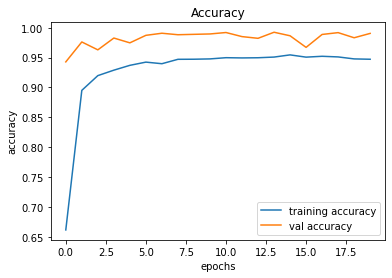

In [23]:
# accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

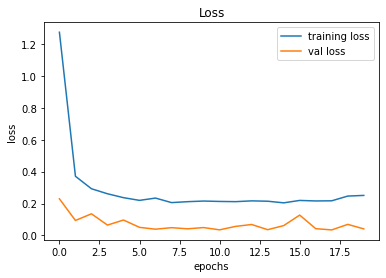

In [24]:
# Loss
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

## Testing results on test images:

In [25]:
def testing(testcsv):
    y_test = pd.read_csv(testcsv)
    label = y_test["ClassId"].values
    imgs = y_test["Path"].values
    data=[]
    for img in imgs:
        image = Image.open(img)
        image = image.resize((30,30))
        data.append(np.array(image))
    X_test=np.array(data)
    return X_test,label

In [27]:
X_test, label = testing('Test.csv')

In [34]:
predict_x=model.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)

classes_x

395/395 [==============================] - 10s 26ms/step


array([16,  1, 38, ...,  5,  7, 10], dtype=int64)

In [36]:
from sklearn.metrics import accuracy_score
print(accuracy_score(label, classes_x))

0.9570071258907363


In [37]:
model.save("./TSR.h5")

In [38]:
from keras.models import load_model
model = load_model('./TSR.h5')

In [39]:
# Classes of traffic signs
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [43]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def test_on_img(img):
    data=[]
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    X_test=np.array(data)
    predict_x=model.predict(X_test) 
    classes_x=np.argmax(predict_x,axis=1)
    return image,classes_x

1/1 [==============================] - 7s 7s/step
Predicted traffic sign is:  Turn right ahead


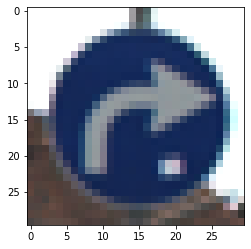

In [49]:
plot,prediction = test_on_img(r'00174.png')
s = [str(i) for i in prediction] 
a = int("".join(s)) 
print("Predicted traffic sign is: ", classes[a])
plt.imshow(plot)
plt.show()